# Credit EDA Assignment - Case Study                                                                    
                                                                                                         by :- Hemlata Sah


To address the problem of risk analytics in banking and financial services, we need to analyze the three provided datasets: Application Data, Previous Data, and Columns Description. The objective is to understand the factors that influence loan approval and predict the risk of default.

First, we need to explore the datasets to comprehend their structure and the information they contain.

Application Data: Contains all necessary details about new clients applying for loans

Previous Data: Contains information about past customers who have previously taken loans from the company.

Columns Description: Provides definitions for each column in the Application Data and Previous Data datasets.


#### Importing Important/required Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)

#### Reading Current application data 

In [2]:
application_data=pd.read_csv("application_data.csv")

In [3]:
print("Application Data : ",application_data.shape[0],"Rows and",application_data.shape[1],"Columns")

Application Data :  307511 Rows and 122 Columns


In [4]:
print(application_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [5]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

#### Checking null value ratio in every column of application data

In [4]:
null_application_data=application_data.isna().sum().sort_values(ascending=False)/application_data.shape[0]*100

In [5]:
null_application_data.head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

#### Creating a list of columns having >=40% null values in application data, and droping these columns

In [6]:
null40_application_data=(null_application_data[null_application_data>=40]).index.tolist()


In [7]:
new_application_data=application_data
new_application_data.drop(columns=null40_application_data,inplace=True)

In [8]:
 new_application_data.shape

(307511, 73)

##### Lets see the columns list and read its meanings from the columns_description.csv to find the columns of no use.

In [9]:
new_application_data.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_

###### Now dropping no use columns
['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','FLAG_EMAIL']

In [10]:
col_no_use=['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','FLAG_EMAIL']
new_application_data.drop(columns=col_no_use,inplace=True)

In [11]:
 new_application_data.shape

(307511, 42)

###### Columns having null values after removing high null value columns.

In [12]:
null_percent = (new_application_data.isnull().sum()*100/len(new_application_data)).sort_values(ascending=False)
col_null_values = null_percent[null_percent>0].sort_values(ascending=False)
col_null_values=col_null_values.index.tolist()
col_null_values

['OCCUPATION_TYPE',
 'EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'NAME_TYPE_SUITE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE']

###### Fill null values (numerical category columns with Median and Cateogory columns with mode)

In [13]:
for i in col_null_values:
    if new_application_data[i].dtype=="object":
        new_application_data[i]=new_application_data[i].fillna(new_application_data[i].mode()[0])
    else:
        new_application_data[i]=new_application_data[i].fillna(new_application_data[i].median())

###### -Now check again null values

In [15]:
new_application_data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
REG_CITY_NOT_LIVE_CITY        0
REG_CITY_NOT_WORK_CITY        0
LIVE_CITY_NOT_WORK_CITY       0
ORGANIZATION_TYPE             0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
OBS_30_C

In [16]:
new_application_data.shape

(307511, 42)

In [17]:
new_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -2120        Laborers              1.0   
1             -291      Core staff              2.0   
2            -2531        Laborers              1.0   
3            -2437        Laborers              2.0   
4            -3458      Core staff              1.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_CITY_NOT_LIVE_CITY  \
0                  WEDNESDAY                       10                       0   
1                     MONDAY                       11                       0   
2                     MONDAY                        9                       0   
3                  WEDNESDAY                       17                       0   
4                   THURSDAY                       11                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246      0.535276                       1.0   
2      0.555912      0.729567                       0.0   
3      0.650442      0.535276                       2.0   
4      0.322738      0.535276                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0          

In [18]:
new_application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307511.000000     3.075110e+05   
mean   5.990260e+05   27108.487841     5.383163e+05   
std    4.024908e+05   14493.461065     3.692890e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count      307511.000000    307511.000000    307511.000000   
mean        -4986.120328     -2994.202373         2.152664   
std          3522.886321      1509.450419         0.910679   
min        -24672.000000     -7197.000000         1.000000   
25%         -7479.500000     -4299.000000         2.000000   
50%         -4504.000000     -3254.000000         2.000000   
75%         -2010.000000     -1720.000000         3.000000   
max             0.000000         0.000000        20.000000   

       HOUR_APPR_PROCESS_START  REG_CITY_NOT_LIVE_CITY  \
count            307511.000000           307511.000000   
mean                 12.063419                0.078173   
std                   3.265832                0.268444   
min                   0.000000                0.000000   
25%                  10.000000                0.000000   
50%                  12.000000                0.000000   
75%                  14.000000                0.000000   
max                  23.000000                1.000000   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
count           307511.000000            307511.000000  3.075110e+05   
mean                 0.230454                 0.179555  5.145034e-01   
std                  0.421124                 0.383817  1.908699e-01   
min                  0.000000                 0.000000  8.173617e-08   
25%                  0.000000                 0.000000  3.929737e-01   
50%                  0.000000                 0.000000  5.659614e-01   
75%                  0.000000                 0.000000  6.634218e-01   
max                  1.000000                 1.000000  8.549997e-01   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count  307511.000000             307511.000000             307511.000000   
mean        0.515695                  1.417523                  0.142944   
std         0.174736                  2.398395                  0.446033   
min         0.000527                  0.000000                  0.000000   
25%         0.417100                  0.000000                  0.000000   
50%         0.535276                  0.000000                  0.000000  

###### Cheack the unique values


In [19]:
new_application_data.nunique().sort_values(ascending=False)

SK_ID_CURR                    307511
EXT_SOURCE_2                  119831
DAYS_BIRTH                     17460
DAYS_REGISTRATION              15688
AMT_ANNUITY                    13672
DAYS_EMPLOYED                  12574
DAYS_ID_PUBLISH                 6168
AMT_CREDIT                      5603
DAYS_LAST_PHONE_CHANGE          3773
AMT_INCOME_TOTAL                2548
AMT_GOODS_PRICE                 1002
EXT_SOURCE_3                     814
REGION_POPULATION_RELATIVE        81
ORGANIZATION_TYPE                 58
OBS_60_CNT_SOCIAL_CIRCLE          33
OBS_30_CNT_SOCIAL_CIRCLE          33
AMT_REQ_CREDIT_BUREAU_YEAR        25
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
OCCUPATION_TYPE                   18
CNT_FAM_MEMBERS                   17
CNT_CHILDREN                      15
AMT_REQ_CREDIT_BUREAU_QRT         11
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_DAY          9
DEF_60_CNT_SOCIAL_CIRCLE           9
N

In [20]:
new_application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307511 non-null  float64
 10  AMT_GOODS_PRICE             307511 non-null  float64
 11  NAME_TYPE_SUITE             307511 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

##### Check data type and convert these in suitable data type


In [21]:
col_types_nunique=new_application_data.nunique().sort_values(ascending=False)
col_types_nunique=col_types_nunique.reset_index()
col_types_nunique=col_types_nunique.rename(columns={"index":"Col_name",0:"unique_val_count"})
col_types_nunique["dtype"]=col_types_nunique["Col_name"].apply(lambda x: new_application_data[x].dtype)

In [22]:
col_types_nunique

Col_name  unique_val_count    dtype
0                   SK_ID_CURR            307511    int64
1                 EXT_SOURCE_2            119831  float64
2                   DAYS_BIRTH             17460    int64
3            DAYS_REGISTRATION             15688  float64
4                  AMT_ANNUITY             13672  float64
5                DAYS_EMPLOYED             12574    int64
6              DAYS_ID_PUBLISH              6168    int64
7                   AMT_CREDIT              5603  float64
8       DAYS_LAST_PHONE_CHANGE              3773  float64
9             AMT_INCOME_TOTAL              2548  float64
10             AMT_GOODS_PRICE              1002  float64
11                EXT_SOURCE_3               814  float64
12  REGION_POPULATION_RELATIVE                81  float64
13           ORGANIZATION_TYPE                58   object
14    OBS_60_CNT_SOCIAL_CIRCLE                33  float64
15    OBS_30_CNT_SOCIAL_CIRCLE                33  float64
16  AMT_REQ_CREDIT_BUREAU_YEAR                25  float64
17   AMT_REQ_CREDIT_BUREAU_MON                24  float64
18     HOUR_APPR_PROCESS_START                24    int64
19             OCCUPATION_TYPE                18   object
20             CNT_FAM_MEMBERS                17  float64
21                CNT_CHILDREN                15    int64
22   AMT_REQ_CREDIT_BUREAU_QRT                11  float64
23    DEF_30_CNT_SOCIAL_CIRCLE                10  float64
24  AMT_REQ_CREDIT_BUREAU_WEEK                 9  float64
25   AMT_REQ_CREDIT_BUREAU_DAY                 9  float64
26    DEF_60_CNT_SOCIAL_CIRCLE                 9  float64
27            NAME_INCOME_TYPE                 8   object
28  WEEKDAY_APPR_PROCESS_START                 7   object
29             NAME_TYPE_SUITE                 7   object
30           NAME_HOUSING_TYPE                 6   object
31          NAME_FAMILY_STATUS                 6   object
32  AMT_REQ_CREDIT_BUREAU_HOUR                 5  float64
33         NAME_EDUCATION_TYPE                 5   object
34                 CODE_GENDER                 3   object
35                FLAG_OWN_CAR                 2   object
36             FLAG_OWN_REALTY                 2   object
37          NAME_CONTRACT_TYPE                 2   object
38     LIVE_CITY_NOT_WORK_CITY                 2    int64
39      REG_CITY_NOT_WORK_CITY                 2    int64
40      REG_CITY_NOT_LIVE_CITY                 2    int64
41                      TARGET                 2    int64

###### Some columns have less unique values


In [23]:
Obj_col_types=['ORGANIZATION_TYPE','OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_YEAR',
               'AMT_REQ_CREDIT_BUREAU_MON','HOUR_APPR_PROCESS_START','OCCUPATION_TYPE','CNT_FAM_MEMBERS','CNT_CHILDREN',
               'AMT_REQ_CREDIT_BUREAU_QRT','DEF_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_WEEK',
               'AMT_REQ_CREDIT_BUREAU_DAY','DEF_60_CNT_SOCIAL_CIRCLE','NAME_INCOME_TYPE','WEEKDAY_APPR_PROCESS_START',
               'NAME_TYPE_SUITE','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','AMT_REQ_CREDIT_BUREAU_HOUR','NAME_EDUCATION_TYPE',
               'CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_CONTRACT_TYPE','LIVE_CITY_NOT_WORK_CITY',
               'REG_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY','TARGET']

###### Changing column types to object type

In [24]:
for i in Obj_col_types:
    new_application_data[i]=new_application_data[i].astype("object")

In [25]:
new_application_data.dtypes

SK_ID_CURR                      int64
TARGET                         object
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                   object
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS                object
WEEKDAY_APPR_PROCESS_START     object
HOUR_APPR_PROCESS_START        object
REG_CITY_NOT_LIVE_CITY         object
REG_CITY_NOT

In [26]:
new_application_data.describe()

SK_ID_CURR  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307511.000000   
mean   278180.518577      1.687979e+05  5.990260e+05   27108.487841   
std    102790.175348      2.371231e+05  4.024908e+05   14493.461065   
min    100002.000000      2.565000e+04  4.500000e+04    1615.500000   
25%    189145.500000      1.125000e+05  2.700000e+05   16524.000000   
50%    278202.000000      1.471500e+05  5.135310e+05   24903.000000   
75%    367142.500000      2.025000e+05  8.086500e+05   34596.000000   
max    456255.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     3.075110e+05               307511.000000  307511.000000   
mean      5.383163e+05                    0.020868  -16036.995067   
std       3.692890e+05                    0.013831    4363.988632   
min       4.050000e+04                    0.000290  -25229.000000   
25%       2.385000e+05                    0.010006  -19682.000000   
50%       4.500000e+05                    0.018850  -15750.000000   
75%       6.795000e+05                    0.028663  -12413.000000   
max       4.050000e+06                    0.072508   -7489.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  EXT_SOURCE_2  \
count  307511.000000      307511.000000    307511.000000  3.075110e+05   
mean    63815.045904       -4986.120328     -2994.202373  5.145034e-01   
std    141275.766519        3522.886321      1509.450419  1.908699e-01   
min    -17912.000000      -24672.000000     -7197.000000  8.173617e-08   
25%     -2760.000000       -7479.500000     -4299.000000  3.929737e-01   
50%     -1213.000000       -4504.000000     -3254.000000  5.659614e-01   
75%      -289.000000       -2010.000000     -1720.000000  6.634218e-01   
max    365243.000000           0.000000         0.000000  8.549997e-01   

        EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  
count  307511.000000           307511.000000  
mean        0.515695             -962.858119  
std         0.174736              826.807226  
min         0.000527            -4292.000000  
25%         0.417100            -1570.000000  
50%         0.535276             -757.000000  
75%         0.636376             -274.000000  
max         0.896010                0.000000


### these columns having negative values, these columns are of type like ageing which can not be negative, seems end date is substracted from the start dates, so these columns can be converted to absolute values.

"DAYS_BIRTH", "DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"
 
converting ageing related columns negative values to absolute and lets convert to years too by dividing it by 365

In [27]:
new_application_data[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]=new_application_data[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]].abs()/365

In [28]:
new_application_data.describe()

SK_ID_CURR  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307511.000000   
mean   278180.518577      1.687979e+05  5.990260e+05   27108.487841   
std    102790.175348      2.371231e+05  4.024908e+05   14493.461065   
min    100002.000000      2.565000e+04  4.500000e+04    1615.500000   
25%    189145.500000      1.125000e+05  2.700000e+05   16524.000000   
50%    278202.000000      1.471500e+05  5.135310e+05   24903.000000   
75%    367142.500000      2.025000e+05  8.086500e+05   34596.000000   
max    456255.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     3.075110e+05               307511.000000  307511.000000   
mean      5.383163e+05                    0.020868      43.936973   
std       3.692890e+05                    0.013831      11.956133   
min       4.050000e+04                    0.000290      20.517808   
25%       2.385000e+05                    0.010006      34.008219   
50%       4.500000e+05                    0.018850      43.150685   
75%       6.795000e+05                    0.028663      53.923288   
max       4.050000e+06                    0.072508      69.120548   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  EXT_SOURCE_2  \
count  307511.000000      307511.000000    307511.000000  3.075110e+05   
mean      185.547239          13.660604         8.203294  5.145034e-01   
std       382.037676           9.651743         4.135481  1.908699e-01   
min         0.000000           0.000000         0.000000  8.173617e-08   
25%         2.556164           5.506849         4.712329  3.929737e-01   
50%         6.079452          12.339726         8.915068  5.659614e-01   
75%        15.635616          20.491781        11.778082  6.634218e-01   
max      1000.665753          67.594521        19.717808  8.549997e-01   

        EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  
count  307511.000000           307511.000000  
mean        0.515695                2.637967  
std         0.174736                2.265225  
min         0.000527                0.000000  
25%         0.417100                0.750685  
50%         0.535276                2.073973  
75%         0.636376                4.301370  
max         0.896010               11.758904

In [29]:
new_application_data.DAYS_BIRTH.describe()

mybins=[20,30,40,50,60,100]

slabs=['20 to 30','30 to 40','40 to 50','50 to 60','>60']
new_application_data['AGE_GROUP'] = pd.cut(new_application_data['DAYS_BIRTH'],mybins,labels=slabs)


In [30]:
new_application_data['AGE_GROUP'].value_counts()

AGE_GROUP
30 to 40    82308
40 to 50    76541
50 to 60    68062
20 to 30    45021
>60         35579
Name: count, dtype: int64

###### lets create 2 seperate lists of int/float and object columns

In [31]:
Cat_col_types=new_application_data.select_dtypes(["object","category"]).columns.to_list()
Int_col_types=new_application_data.select_dtypes(["float","int"]).columns.to_list()

###### SK_ID_CURR will be used as primary key as it unique, so we can use this as primary key, and remove it from the Int_col_types columns list

In [32]:
Int_col_types.remove("SK_ID_CURR")

###### TARGET column is having target variable having payment difficulty information i.e. 0,1. So this can also be removed from the categorical column list.

In [33]:
Cat_col_types.remove("TARGET")

###### Shape of category and int/float columns

In [34]:
print("Categorical columns count : ",len(Cat_col_types))
print("Int/Float columns count : ",len(Int_col_types))

Categorical columns count :  29
Int/Float columns count :  12


In [35]:
new_application_data.shape

(307511, 43)

###### Lets see how the values are given in every categorical column

In [36]:
for i in Cat_col_types:
    print(new_application_data[i].value_counts())
    print("---------------------------------------------------------------")

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
---------------------------------------------------------------
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
---------------------------------------------------------------
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
---------------------------------------------------------------
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
---------------------------------------------------------------
CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64
---------------------------------------------------------------
NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B             

##  Creating Bins/Categories to narrow the unique values in columns.
CODE_GENDER has 4 XNA values, can be replaced with F Value (mode) <br> 
CNT_CHILDREN have value 19, and few are more than 10 too, let create bins on this columns 0, 1, 2, 3 and "more than 3" <br> 
NAME_TYPE_SUITE has multiple categories/bins which can be further narrow down, like family,Unaccompanied,Others <br>
NAME_INCOME_TYPE can be categorized as Income/No-Income <br>
NAME_FAMILY_STATUS can be categorized to Married/Unmarried (unknown can be replaced with Married (mode)) <br>
OCCUPATION_TYPE can be categorized as Skilled/Non-Skilled <br>
CNT_FAM_MEMBERS can have 3-4 bins (i.e. 1,2,3,4,>=5) <br>
ORGANIZATION_TYPE can be categorized in fewer buckets like industy types can have one type, Transport types can have one so on. <br>

###### CODE_GENDER

In [38]:
new_application_data["CODE_GENDER"]=new_application_data["CODE_GENDER"].apply(lambda x: x.replace("XNA","F"))
new_application_data["CODE_GENDER"].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

###### CNT_CHILDREN

In [37]:
bins=[-1,0,1,2,3,20]
ranges=['0','1','2','3','more than 3']
new_application_data["CNT_CHILDREN"]= pd.cut(new_application_data["CNT_CHILDREN"],bins,labels=ranges)
new_application_data["CNT_CHILDREN"].value_counts()

CNT_CHILDREN
0              215371
1               61119
2               26749
3                3717
more than 3       555
Name: count, dtype: int64

###### NAME_TYPE_SUITE

In [40]:
new_application_data["NAME_TYPE_SUITE"]=new_application_data["NAME_TYPE_SUITE"].replace(["Family","Spouse, partner","Children"],"Family").replace(["Other_B","Other_A","Group of people"],"Other").replace("Unaccompanied","Alone")
new_application_data["NAME_TYPE_SUITE"].value_counts()

Alone     249818
Family     54786
Other       2907
Name: NAME_TYPE_SUITE, dtype: int64

###### NAME_INCOME_TYPE

In [38]:
new_application_data["NAME_INCOME_TYPE"]=new_application_data["NAME_INCOME_TYPE"].replace(["Working","Commercial associate","State servant","Pensioner","Businessman","Maternity leave"],"Income").replace(["Student","Unemployed"],"No Income")
new_application_data["NAME_INCOME_TYPE"].value_counts()

NAME_INCOME_TYPE
Income       307471
No Income        40
Name: count, dtype: int64

##### NAME_FAMILY_STATUS

In [39]:
new_application_data["NAME_FAMILY_STATUS"]=new_application_data["NAME_FAMILY_STATUS"].replace(["Single / not married","Separated","Widow"],"Un-married").replace(["Civil marriage","Unknown"],"Married")
new_application_data["NAME_FAMILY_STATUS"].value_counts()

NAME_FAMILY_STATUS
Married       226209
Un-married     81302
Name: count, dtype: int64

##### OCCUPATION_TYPE

In [40]:
new_application_data["OCCUPATION_TYPE"]=new_application_data["OCCUPATION_TYPE"].replace(["IT staff","HR staff","Secretaries","Private service staff","Medicine staff","Accountants","High skill tech staff","Managers","Core staff","Sales staff"],"Skilled").replace(["Realty agents","Low-skill Laborers","Security staff","Drivers","Cleaning staff","Cooking staff","Driver","Laborers","Waiters/barmen staff"],"Un-skilled")
new_application_data["OCCUPATION_TYPE"].value_counts()

OCCUPATION_TYPE
Un-skilled    191692
Skilled       115819
Name: count, dtype: int64

##### CNT_FAM_MEMBERS

In [41]:
bins=[-1,0,1,2,3,5,100]
ranges=['0','1','2','3','3-4','more than 5']
new_application_data["CNT_FAM_MEMBERS"] = pd.cut(new_application_data["CNT_FAM_MEMBERS"],bins,labels=ranges)
new_application_data["CNT_FAM_MEMBERS"].value_counts()

CNT_FAM_MEMBERS
2              158359
1               67847
3               52601
3-4             28175
more than 5       529
0                   0
Name: count, dtype: int64

##### ORGANIZATION_TYPE

In [42]:
new_application_data["ORGANIZATION_TYPE"]=new_application_data["ORGANIZATION_TYPE"].str.split("Type").str[0].str.split("type").str[0]
new_application_data["ORGANIZATION_TYPE"]=new_application_data["ORGANIZATION_TYPE"].str.replace("XNA","Other").replace("Cleaning","Services").replace("Cleaning","Services")
new_application_data["ORGANIZATION_TYPE"]=new_application_data["ORGANIZATION_TYPE"].replace(["Military","Police","Postal","Security Ministries","Electricity"],"Government").replace(["Bank","Security","Insurance","Legal Services"],"BFSI").replace(["Kindergarten","University","School"],"Education").replace(["Construction","Housing"],"Realtor")
new_application_data["ORGANIZATION_TYPE"]=new_application_data["ORGANIZATION_TYPE"].replace(["Military","Police","Postal","Security Ministries","Electricity"],"Government").replace(["Bank","Security","Services","Insurance","Legal Services"],"BFSI").replace(["Medicine","Emergency"],"Healthcare").replace(["Restaurant","Hotel"],"Hospitality")
new_application_data["ORGANIZATION_TYPE"].value_counts()

ORGANIZATION_TYPE
Business Entity     84529
Other               72057
Self-employed       38412
Government          20460
Education           17100
Trade:              14315
Industry:           14311
Healthcare          11753
Realtor             10075
Transport:           8990
BFSI                 8491
Hospitality          2777
Agriculture          2454
Telecom               577
Advertising           429
Culture               379
Mobile                317
Religion               85
Name: count, dtype: int64

###  These columns are having no of observations which can be converted to Zero/Non-Zero

OBS_30_CNT_SOCIAL_CIRCLE : Can have Zero,Non-Zero <br>
DEF_30_CNT_SOCIAL_CIRCLE : Can have Zero,Non-Zero <br>
OBS_60_CNT_SOCIAL_CIRCLE : Can have Zero,Non-Zero <br>
DEF_60_CNT_SOCIAL_CIRCLE : Can have Zero,Non-Zero <br>

In [43]:
new_application_data["OBS_30_CNT_SOCIAL_CIRCLE"]=new_application_data["OBS_30_CNT_SOCIAL_CIRCLE"].apply(lambda x: "No" if x==0 else "Yes")
new_application_data["DEF_30_CNT_SOCIAL_CIRCLE"]=new_application_data["DEF_30_CNT_SOCIAL_CIRCLE"].apply(lambda x: "No" if x==0 else "Yes")
new_application_data["OBS_60_CNT_SOCIAL_CIRCLE"]=new_application_data["OBS_60_CNT_SOCIAL_CIRCLE"].apply(lambda x: "No" if x==0 else "Yes")
new_application_data["DEF_60_CNT_SOCIAL_CIRCLE"]=new_application_data["DEF_60_CNT_SOCIAL_CIRCLE"].apply(lambda x: "No" if x==0 else "Yes")

###### OBS_30_CNT_SOCIAL_CIRCLE count value

In [47]:
new_application_data["OBS_30_CNT_SOCIAL_CIRCLE"].value_counts()

No     164931
Yes    142580
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

###### DEF_30_CNT_SOCIAL_CIRCLE count value

In [44]:
new_application_data["DEF_30_CNT_SOCIAL_CIRCLE"].value_counts()

DEF_30_CNT_SOCIAL_CIRCLE
No     272345
Yes     35166
Name: count, dtype: int64

###### OBS_60_CNT_SOCIAL_CIRCLE count value

In [45]:
new_application_data["OBS_60_CNT_SOCIAL_CIRCLE"].value_counts()

OBS_60_CNT_SOCIAL_CIRCLE
No     165687
Yes    141824
Name: count, dtype: int64

######  DEF_60_CNT_SOCIAL_CIRCLE  count value

In [46]:
new_application_data["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts()

DEF_60_CNT_SOCIAL_CIRCLE
No     281742
Yes     25769
Name: count, dtype: int64

### These columns are about number of enquiries to credit bureau about client, these columns can be categorized as enquiries made or not to yes/No
AMT_REQ_CREDIT_BUREAU_HOUR <br>
AMT_REQ_CREDIT_BUREAU_DAY <br>
AMT_REQ_CREDIT_BUREAU_WEEK <br>
AMT_REQ_CREDIT_BUREAU_MON <br>
AMT_REQ_CREDIT_BUREAU_QRT <br>
AMT_REQ_CREDIT_BUREAU_YEAR <br>

In [47]:
new_application_data["AMT_REQ_CREDIT_BUREAU_HOUR"]=new_application_data["AMT_REQ_CREDIT_BUREAU_HOUR"].apply(lambda x: "N" if x==0 else "Y")
new_application_data["AMT_REQ_CREDIT_BUREAU_DAY"]=new_application_data["AMT_REQ_CREDIT_BUREAU_DAY"].apply(lambda x: "N" if x==0 else "Y")
new_application_data["AMT_REQ_CREDIT_BUREAU_WEEK"]=new_application_data["AMT_REQ_CREDIT_BUREAU_WEEK"].apply(lambda x: "N" if x==0 else "Y")
new_application_data["AMT_REQ_CREDIT_BUREAU_MON"]=new_application_data["AMT_REQ_CREDIT_BUREAU_MON"].apply(lambda x: "N" if x==0 else "Y")
new_application_data["AMT_REQ_CREDIT_BUREAU_QRT"]=new_application_data["AMT_REQ_CREDIT_BUREAU_QRT"].apply(lambda x: "N" if x==0 else "Y")
new_application_data["AMT_REQ_CREDIT_BUREAU_YEAR"]=new_application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].apply(lambda x: "N" if x==0 else "Y")

In [48]:
print("Categorical columns count : ",len(Cat_col_types))
print("Int/Float columns count : ",len(Int_col_types))

Categorical columns count :  29
Int/Float columns count :  12



#### Lets see how the values are given in every categorical column

In [49]:
for i in Int_col_types:
    print(new_application_data[i].describe())
    print("---------------------------------------------------------------")

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
---------------------------------------------------------------
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64
---------------------------------------------------------------
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
---------------------------------------------------------------
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.0

In [50]:
Int_col_types

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE']

###### Lets create a list of all amount related columns to see the correlation between all these. 

In [51]:
cols_of_interest=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

<p style="color:green"> <font color="green">  insights we get from above boxplots.

    1. From that box plot we can observe that customer without payment difficulties having year in between 34-54 years , And 
        coustomer with payment difficulties having in between 31-50 years.

    2. It shows that value lies between 5-12 for target 0 & 3-11 for target 1.

    3. It's almost same for both target values

    4.  From that we can note that customer without payment difficulties having AMT_ANNUITY in between 20000-30000, And 
        coustomer with payment difficulties having AMT_ANNUITY in between 20000-30000 years.

    5. We have a lot of outliers in income column. </font></p>

###### Creating pair plot on all amount related columns.

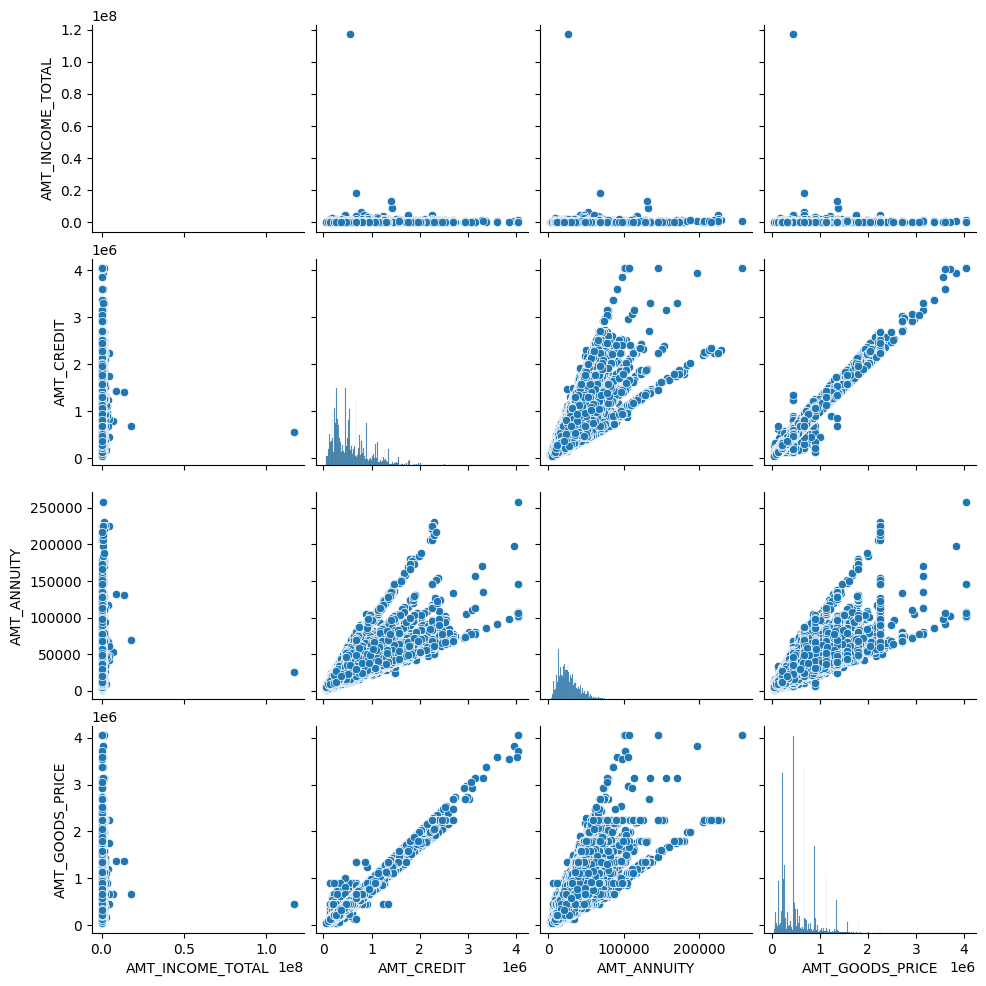

In [53]:
sns.pairplot(new_application_data[cols_of_interest])
plt.show()

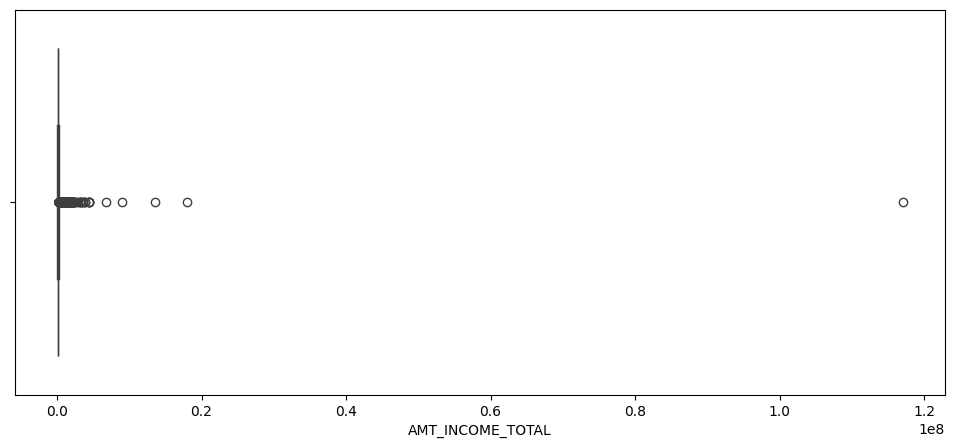

In [54]:
plt.figure(figsize=(12,5))
sns.boxplot(x=new_application_data["AMT_INCOME_TOTAL"]);

* Total income amount has outliers, replace outliers with the upper_limit or lower_limit values.

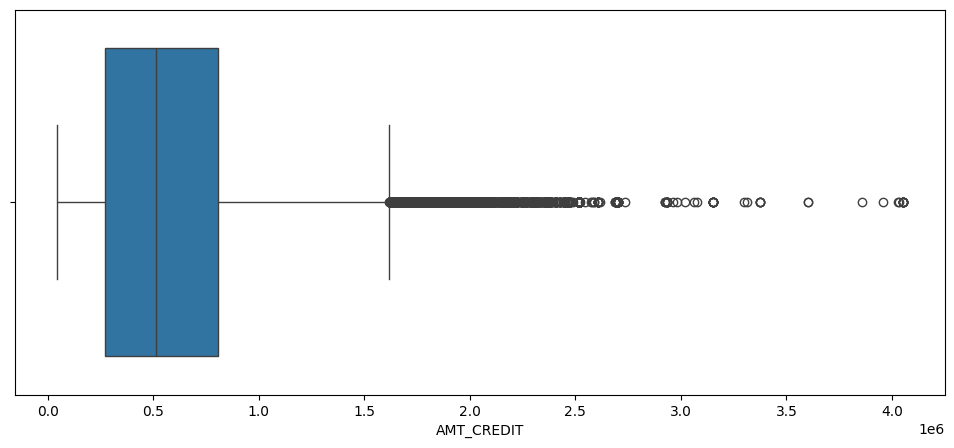

In [56]:
plt.figure(figsize=(12,5))
sns.boxplot(x=new_application_data["AMT_CREDIT"]);


#### Lets create the bins to see the distibution on these fields.

In [57]:
mybins=[0,100000,250000,500000,750000,1000000,1500000,2000000,3000000,4000000,5000000,150000000]

slabs=['0-100K','100K-250K','250k to 500K','500K to 750K','750k to 1Mil', '1 to 1.5 Mil',
       '1.5 to 2 Mil','2 to 3 Mil','3 to 4 Mil','4 to 5 Mil','5 Mil and above']
new_application_data['AMT_INC_RANGE'] = pd.cut(new_application_data['AMT_INCOME_TOTAL'],mybins,labels=slabs)
new_application_data['AMT_CDT_RANGE'] = pd.cut(new_application_data['AMT_CREDIT'],mybins,labels=slabs)

###### let's see the distribution of client basis income range across Gender

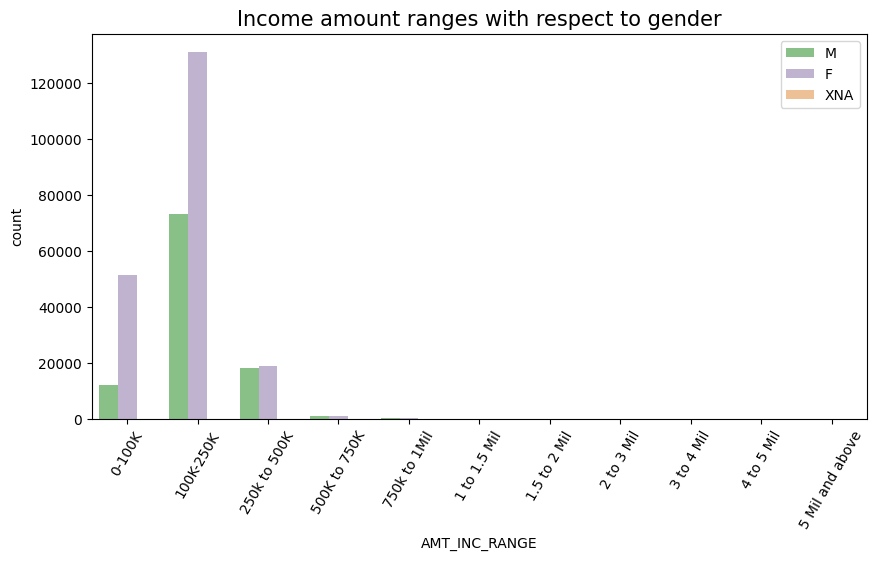

In [58]:
plt.figure(figsize=[10,5])
sns.countplot(data=new_application_data,x='AMT_INC_RANGE',hue='CODE_GENDER',palette='Accent')
plt.title('Income amount ranges with respect to gender',size=15)
plt.xticks(rotation=60)
plt.legend(loc= 'upper right')
plt.show()

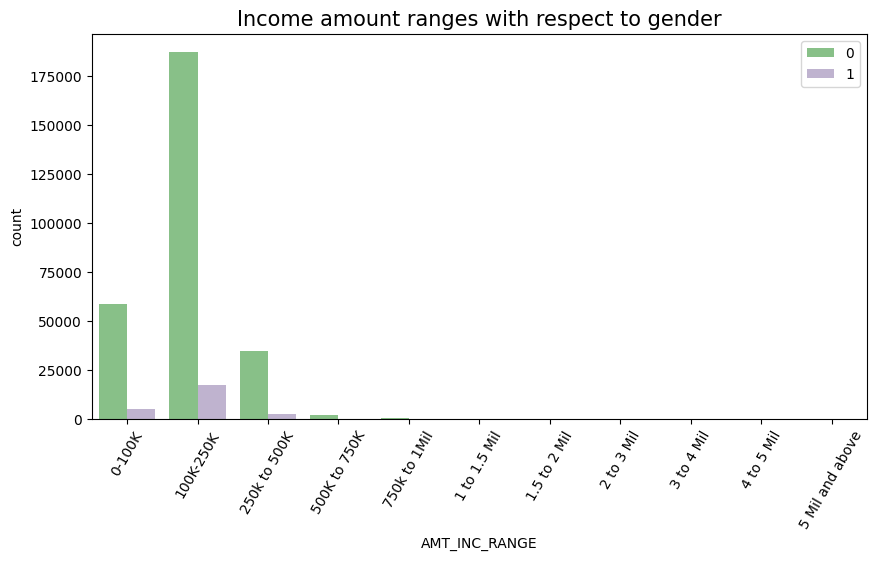

In [59]:
plt.figure(figsize=[10,5])
sns.countplot(data=new_application_data,x='AMT_INC_RANGE',hue='TARGET',palette='Accent')
plt.title('Income amount ranges with respect to gender',size=15)
plt.xticks(rotation=60)
plt.legend(loc= 'upper right')
plt.show()

###### Correlation matrix of customer with no payment difficulties (TARGET =0)

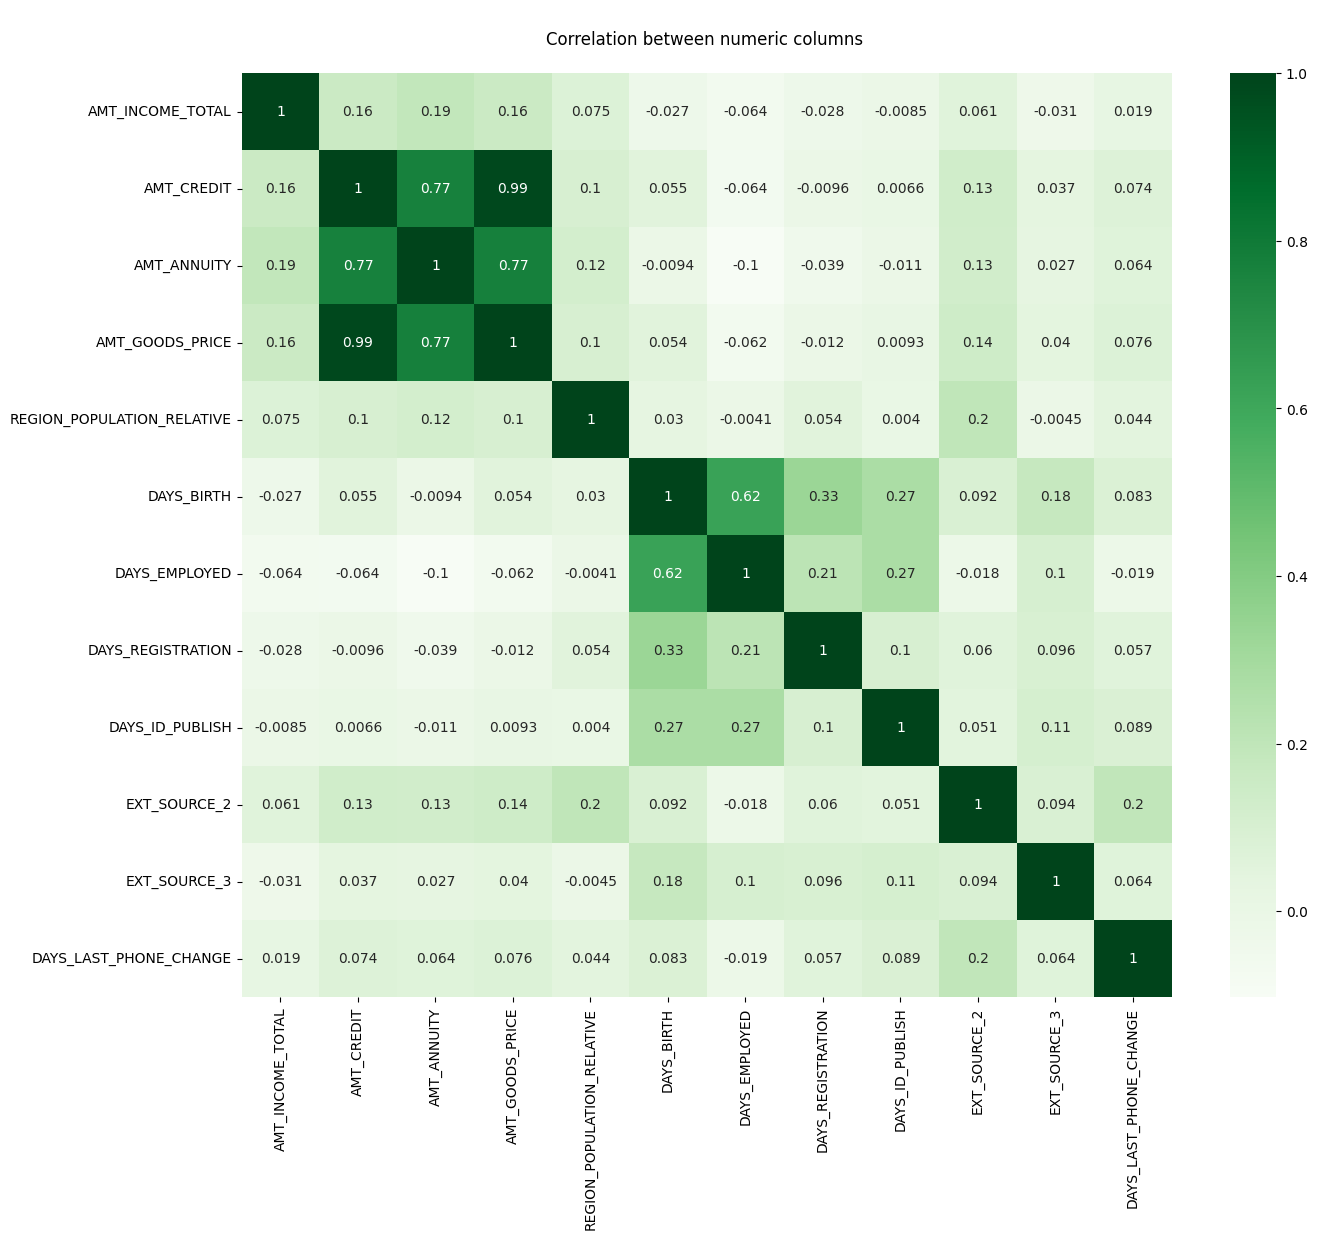

In [67]:
plt.figure(figsize=(15,12))
sns.heatmap(data=new_application_data[Int_col_types].corr(),cmap="Greens",annot=True)
plt.title("\nCorrelation between numeric columns \n")
plt.show()


## Lets anlayse the TARGET column
"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"

In [68]:
print(new_application_data.TARGET.value_counts())
print(new_application_data.TARGET.value_counts(normalize=True)*100)
print(">"*60)
print(new_application_data.CODE_GENDER.value_counts())
print(new_application_data.CODE_GENDER.value_counts(normalize=True)*100)

TARGET
0    282686
1     24825
Name: count, dtype: int64
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
CODE_GENDER
F      65.834393
M      34.164306
XNA     0.001301
Name: proportion, dtype: float64


#### Target 1 customer with payment difficulties and 0 customer having no payment difficulties.

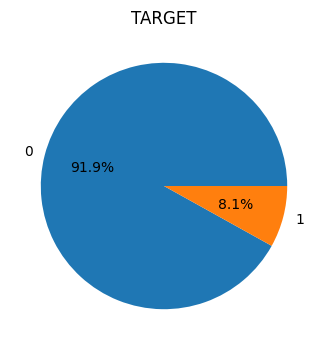

In [69]:
plt.figure(figsize=(4,4))
plt.pie(new_application_data["TARGET"].value_counts(),labels=new_application_data["TARGET"].value_counts().index.to_list(),autopct='%1.1f%%')
plt.title("TARGET")
plt.show()

#### Gender wise split of loan application

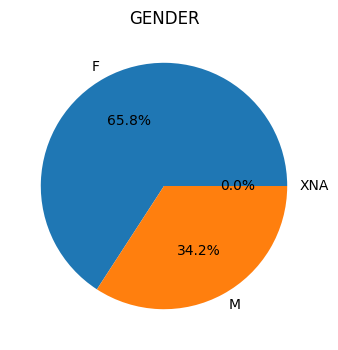

In [70]:
plt.figure(figsize=(4,4))
plt.pie(new_application_data["CODE_GENDER"].value_counts(),labels=new_application_data["CODE_GENDER"].value_counts().index.to_list(),autopct='%1.1f%%')
plt.title("GENDER")
plt.show()

#### Correlation matrix of customer with payment difficulties

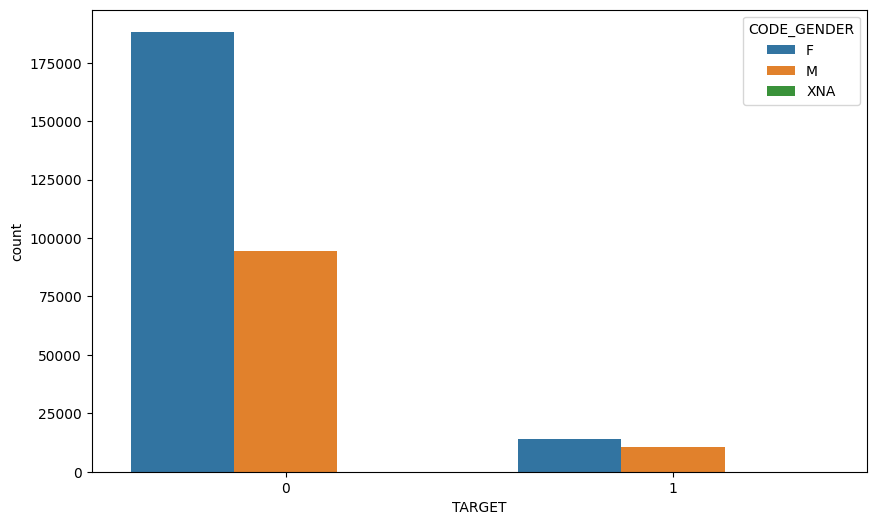

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(data=new_application_data,x="TARGET",hue='CODE_GENDER')
plt.show()

### Lets analyse customers separately with payment difficulties and no payment difficulties.

#### Creating two different datasets for payment difficulties and no payment difficulty

In [72]:
new_application_data0=new_application_data[new_application_data.TARGET==0]
new_application_data1=new_application_data[new_application_data.TARGET==1]

#### Size of datasets

In [68]:

print("New Application data with no payment difficulties shape = ",new_application_data0.shape)
print("New Application data with payment difficulties shape = ",new_application_data1.shape)

New Application data with no payment difficulties shape =  (282686, 45)
New Application data with payment difficulties shape =  (24825, 45)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3931488245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=new_application_data0[i],palette="Greens")
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3931488245.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=new_application_data1[i],palette="Blues")


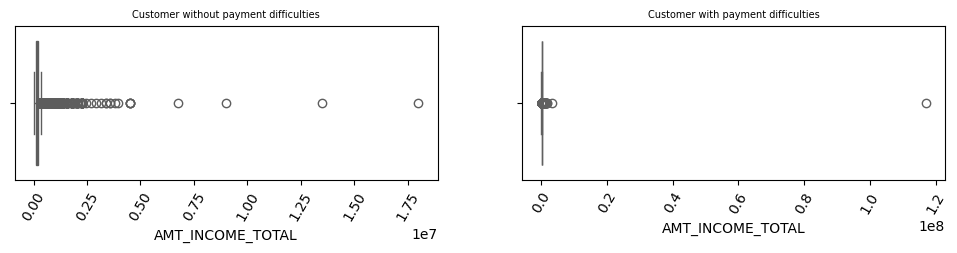

C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3931488245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=new_application_data0[i],palette="Greens")
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3931488245.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=new_application_data1[i],palette="Blues")


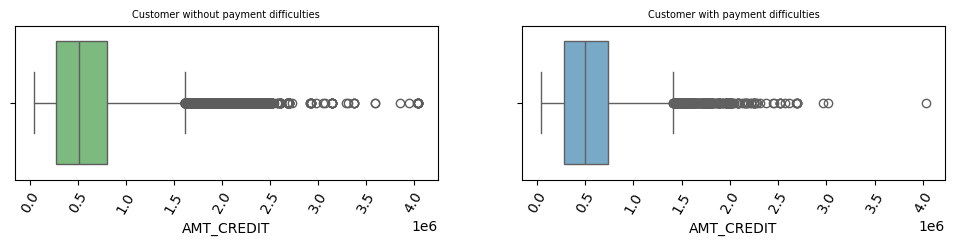

C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3931488245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=new_application_data0[i],palette="Greens")
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3931488245.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=new_application_data1[i],palette="Blues")


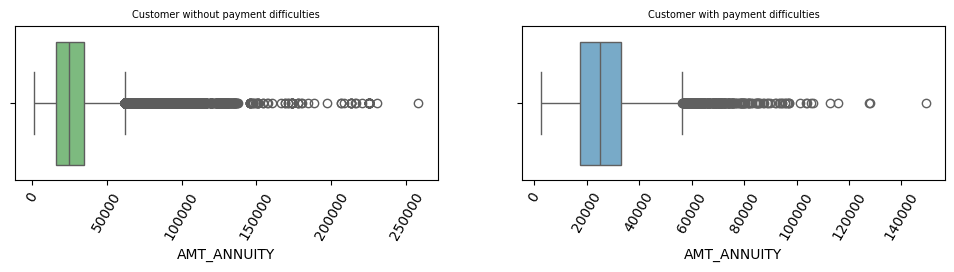

C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3931488245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=new_application_data0[i],palette="Greens")
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3931488245.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=new_application_data1[i],palette="Blues")


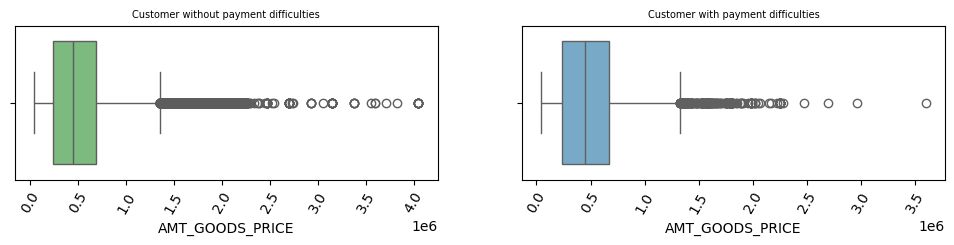

In [74]:
for i in cols_of_interest:
    plt.figure(figsize=(12,2))
    plt.subplot(1,2,1)
    sns.boxplot(x=new_application_data0[i],palette="Greens")
    plt.title('Customer without payment difficulties',size=7)
    plt.xticks(rotation=60)
    plt.subplot(1,2,2)
    sns.boxplot(x=new_application_data1[i],palette="Blues")
    plt.title('Customer with payment difficulties',size=7)
    plt.xticks(rotation=60)
    plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\1493807525.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_application_data0[i],palette = "Set2")
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\1493807525.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_application_data1[i],palette = "Set2")


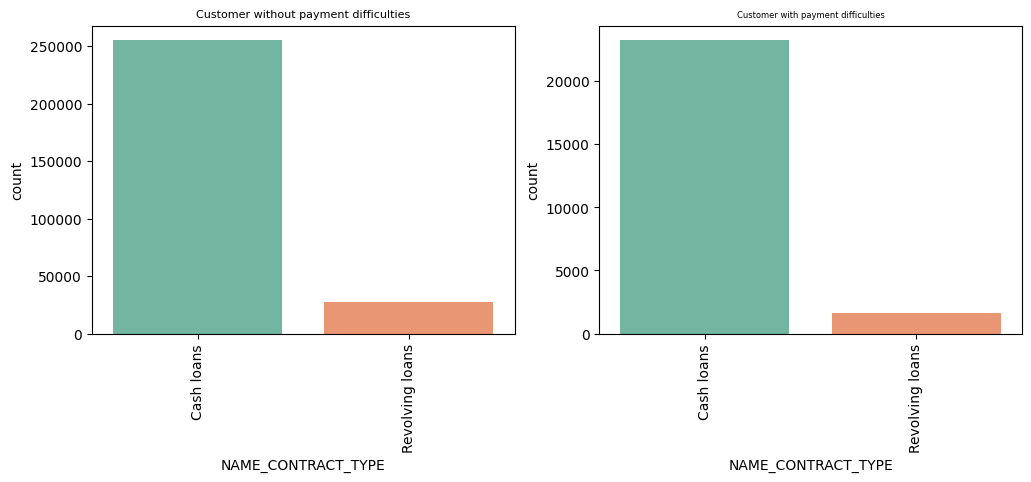

C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\1493807525.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_application_data0[i],palette = "Set2")
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\1493807525.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_application_data1[i],palette = "Set2")


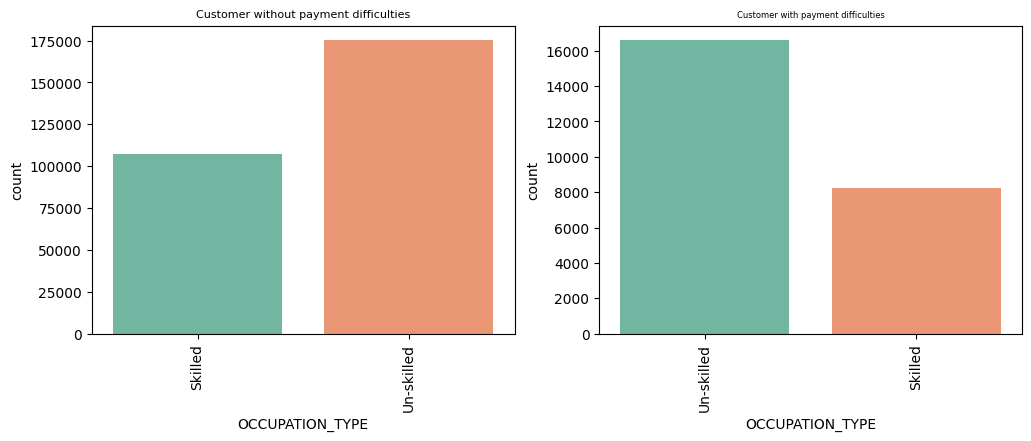

C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\1493807525.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_application_data0[i],palette = "Set2")
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\1493807525.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_application_data1[i],palette = "Set2")


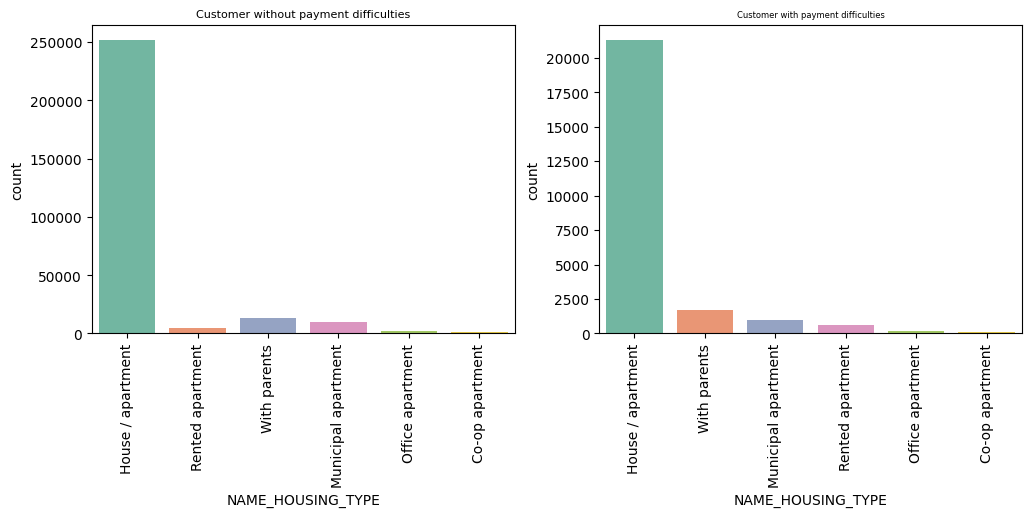

C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\1493807525.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_application_data0[i],palette = "Set2")
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\1493807525.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_application_data1[i],palette = "Set2")


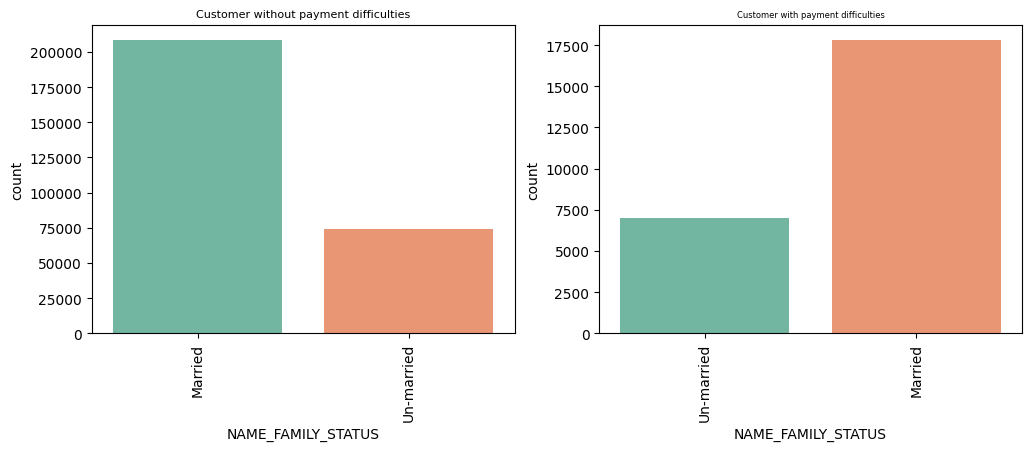

C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\1493807525.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_application_data0[i],palette = "Set2")
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\1493807525.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_application_data1[i],palette = "Set2")


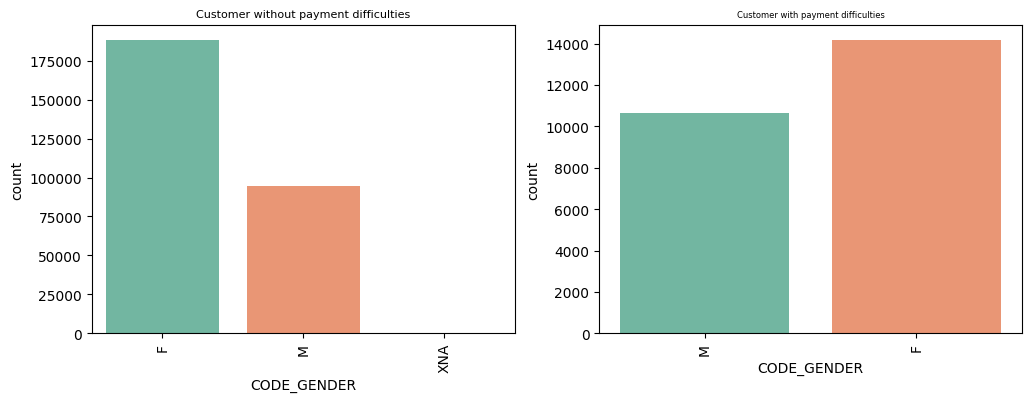

C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\1493807525.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_application_data0[i],palette = "Set2")
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\1493807525.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_application_data1[i],palette = "Set2")


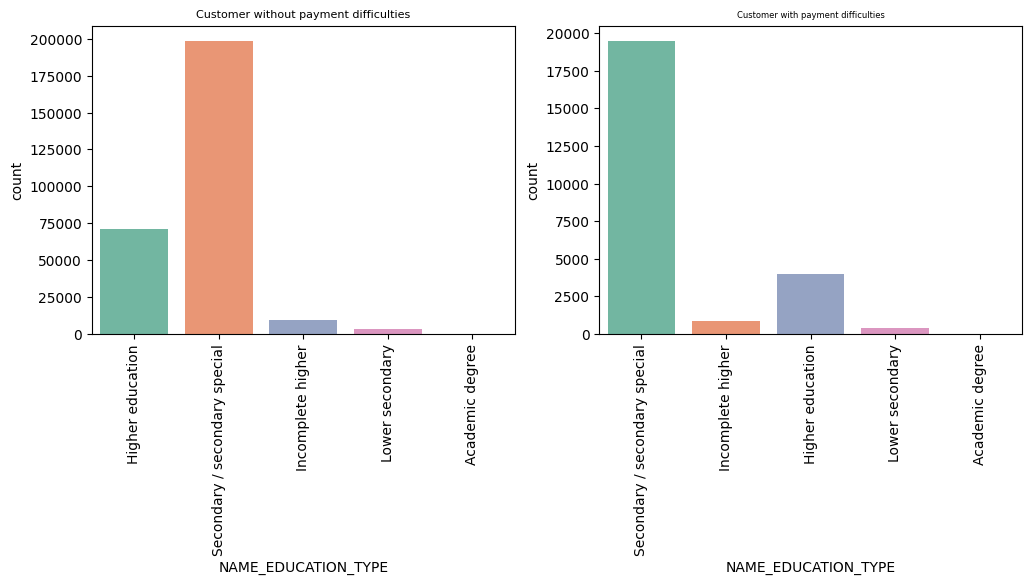

C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\1493807525.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_application_data0[i],palette = "Set2")
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\1493807525.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_application_data1[i],palette = "Set2")


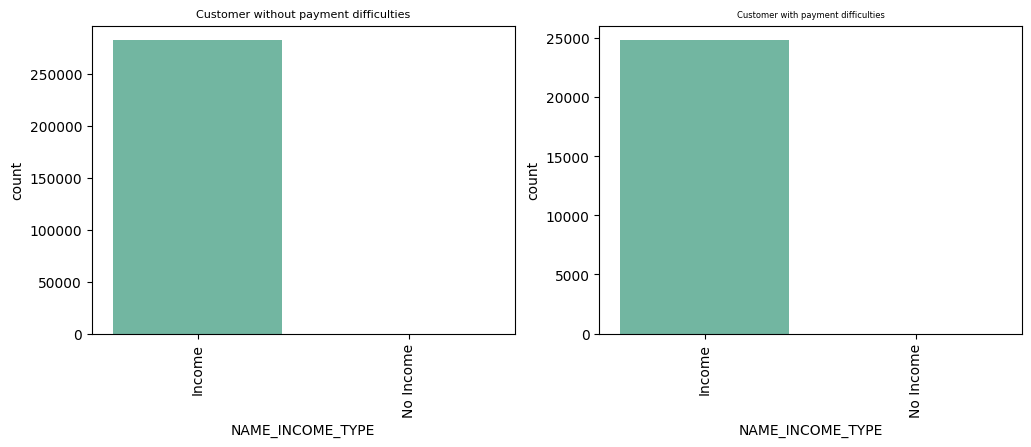

In [75]:
cols=['NAME_CONTRACT_TYPE','OCCUPATION_TYPE','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE']

for i in cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.countplot(x=new_application_data0[i],palette = "Set2")
    plt.title('Customer without payment difficulties',size=8)
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.countplot(x=new_application_data1[i],palette = "Set2")
    plt.title('Customer with payment difficulties',size=6)
    plt.xticks(rotation=90)
    plt.show()

-----> insights we get from above counter plots.

1.We can see that customer without payment difficulties and customer with payment difficulties are taking cash loans

2.Here we can observe that labourers are taking more loan in both datasets

3.Here, we can observe that House/Apartment category are more in number in both cases

4.Here wecan say that people who are married taking more loan in both cases.

5.Here we can observe that people who are in secondary class taking more loan in both cases

6.Here we can conclude that male candidates have facing more payment difficulties as compare to female candidates

7.People who ar working taking more loan in both datsets

#### Comparing payment difficulties or no payment difficulties with other Categorical columns.

1)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


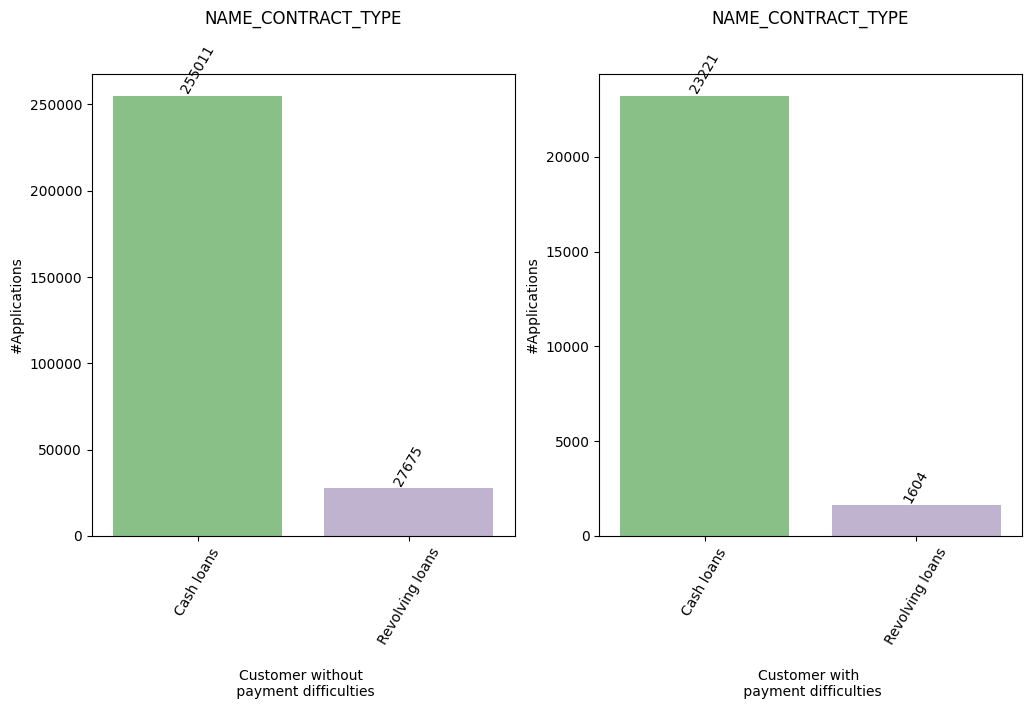

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
2)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


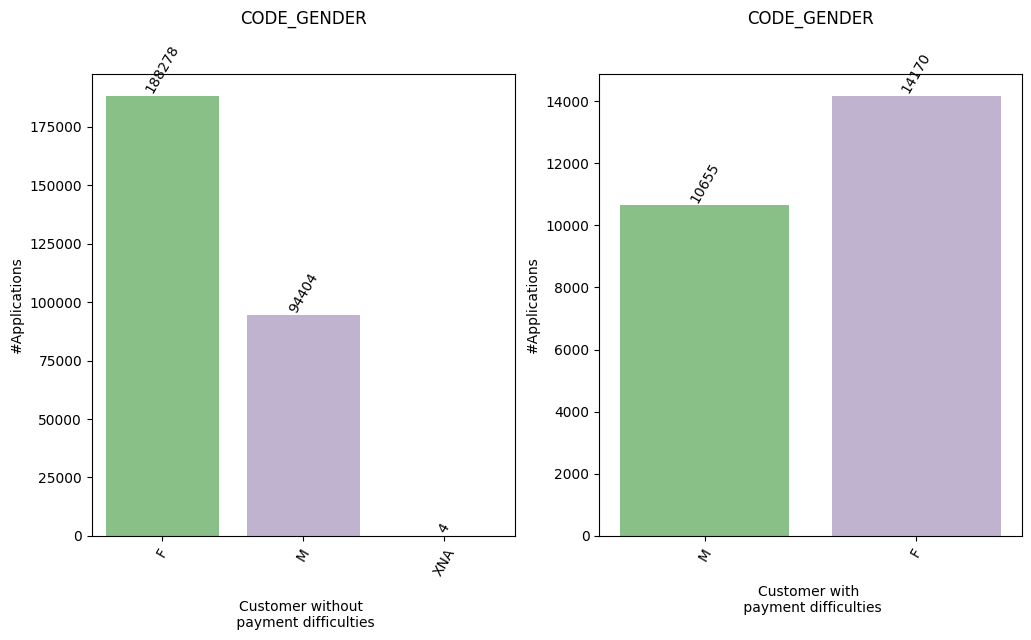

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
3)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


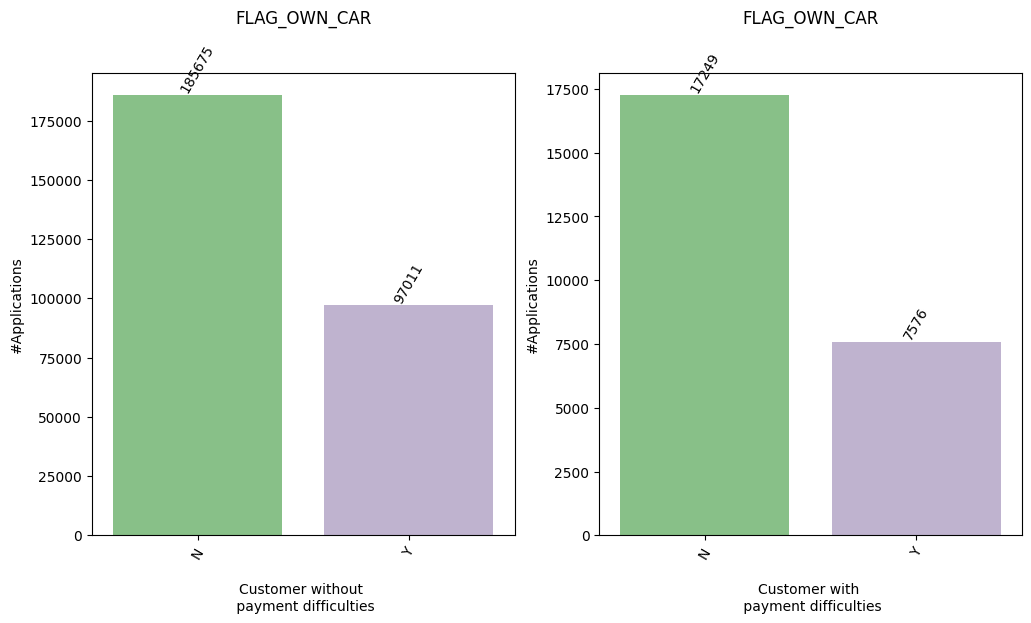

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
4)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


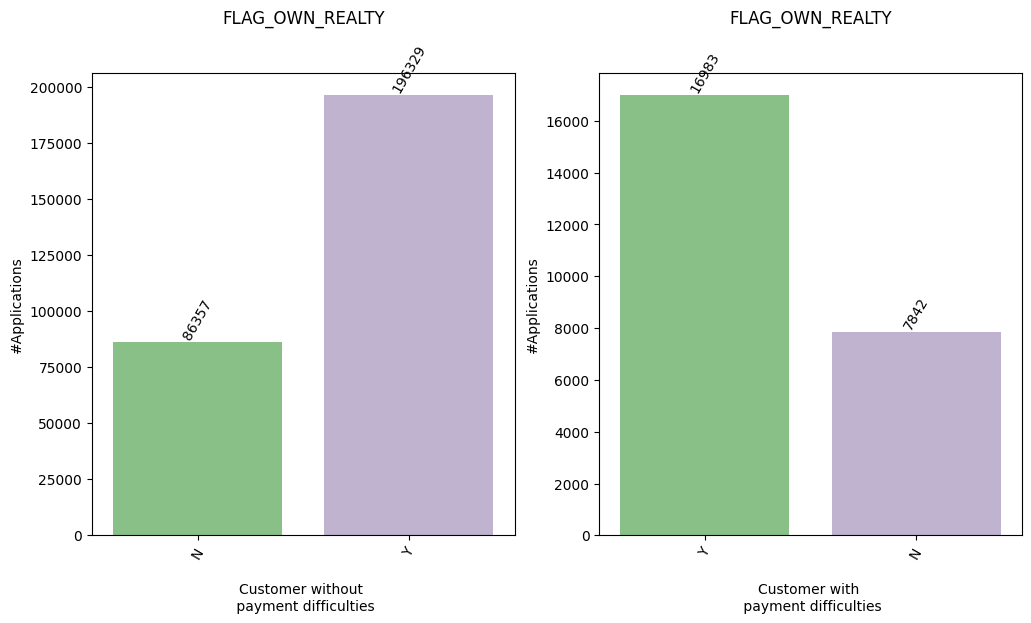

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
5)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


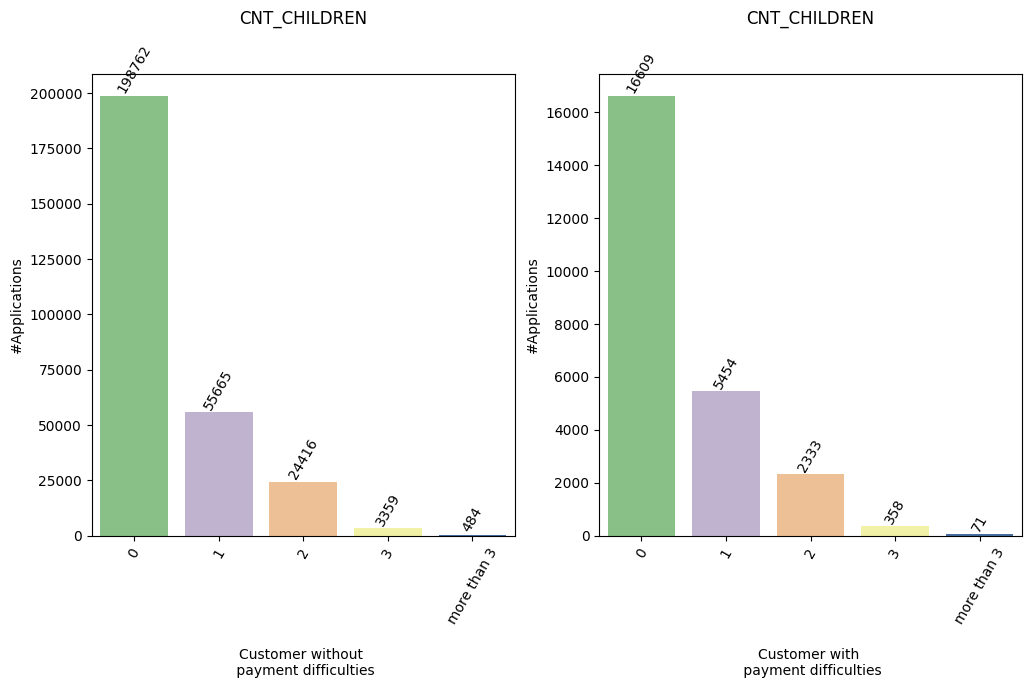

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
6)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


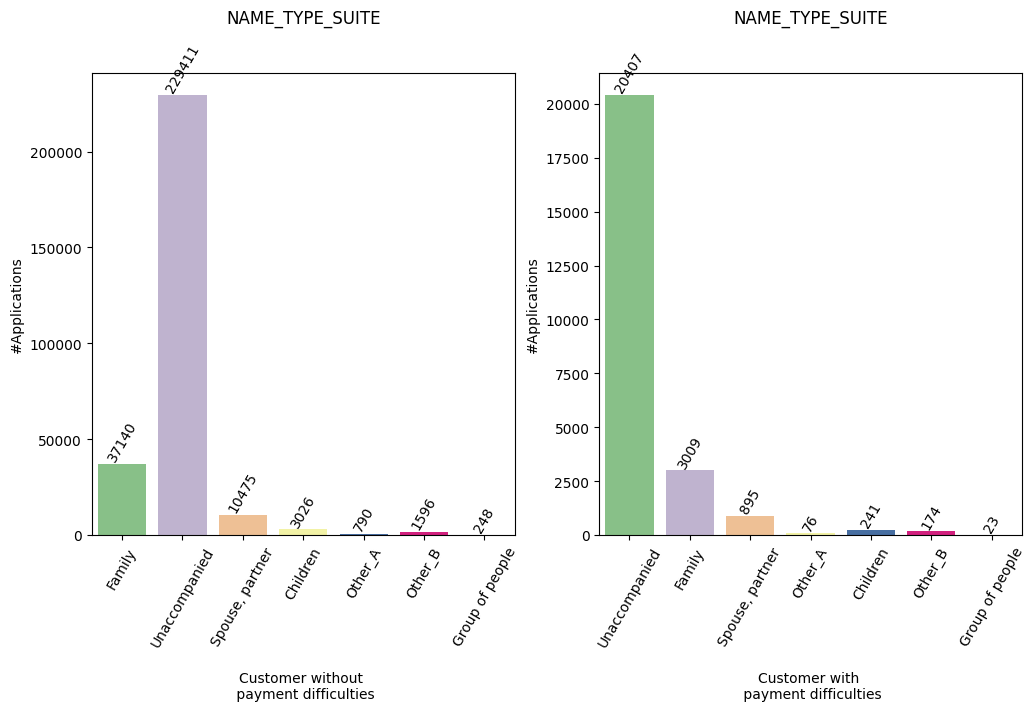

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
7)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


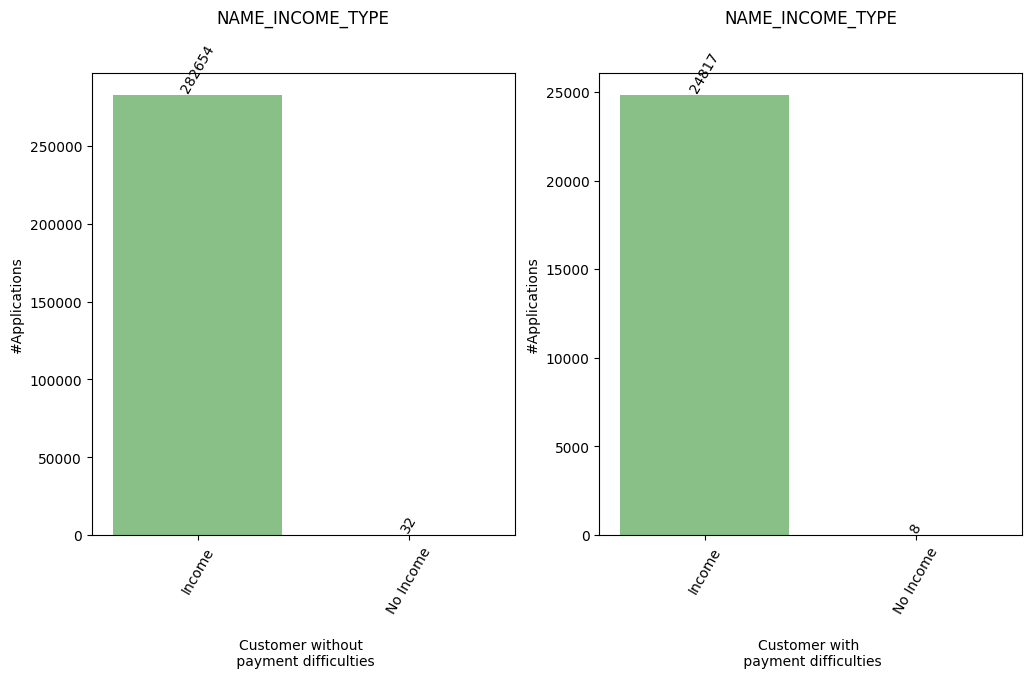

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
8)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


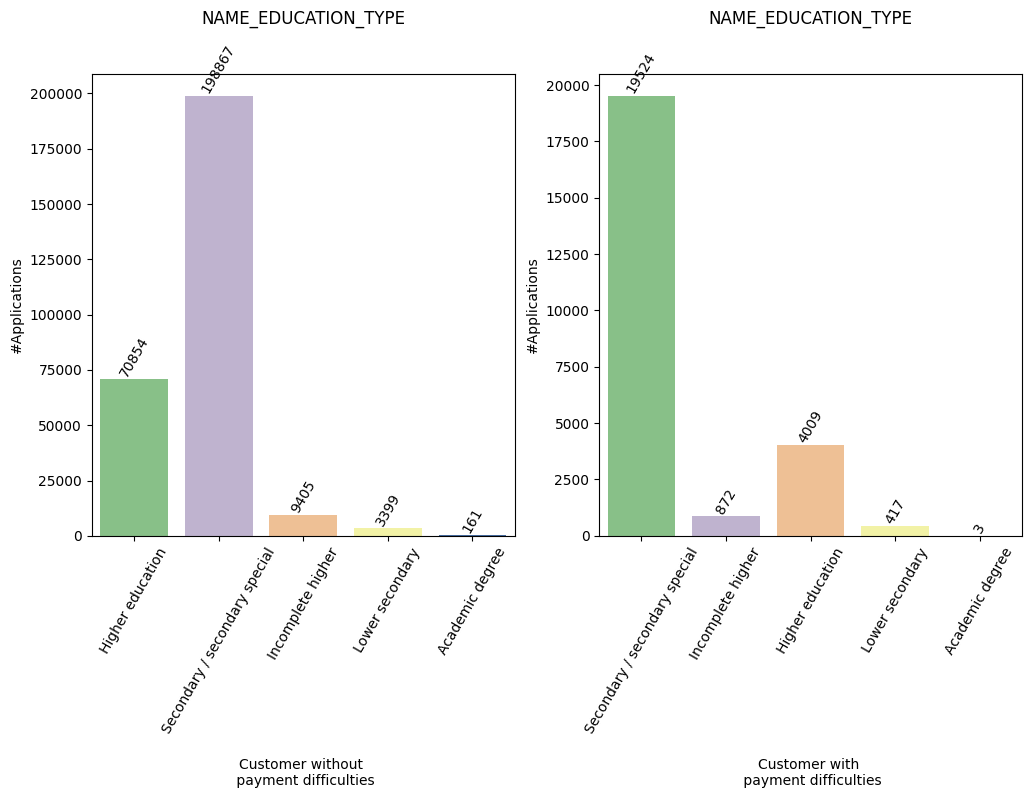

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
9)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


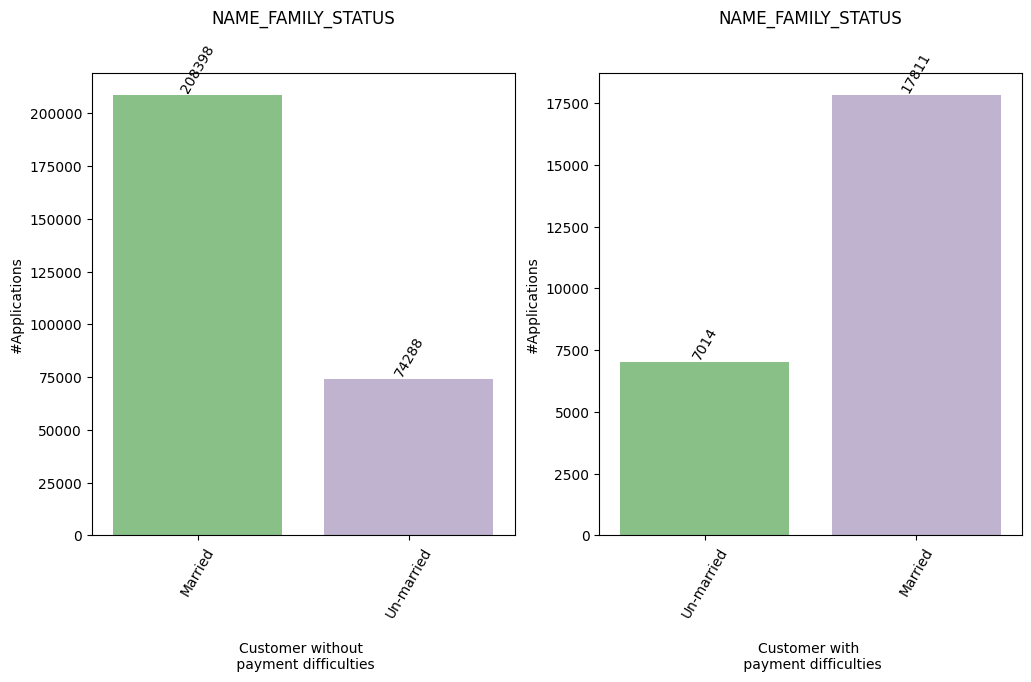

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
10)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


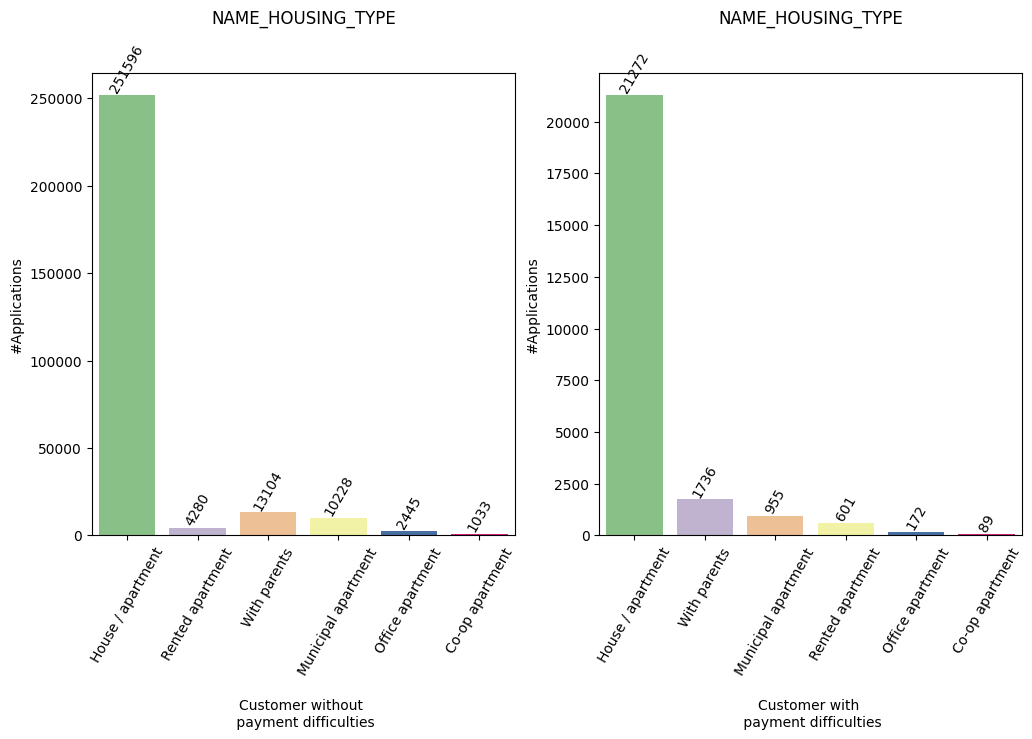

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
11)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


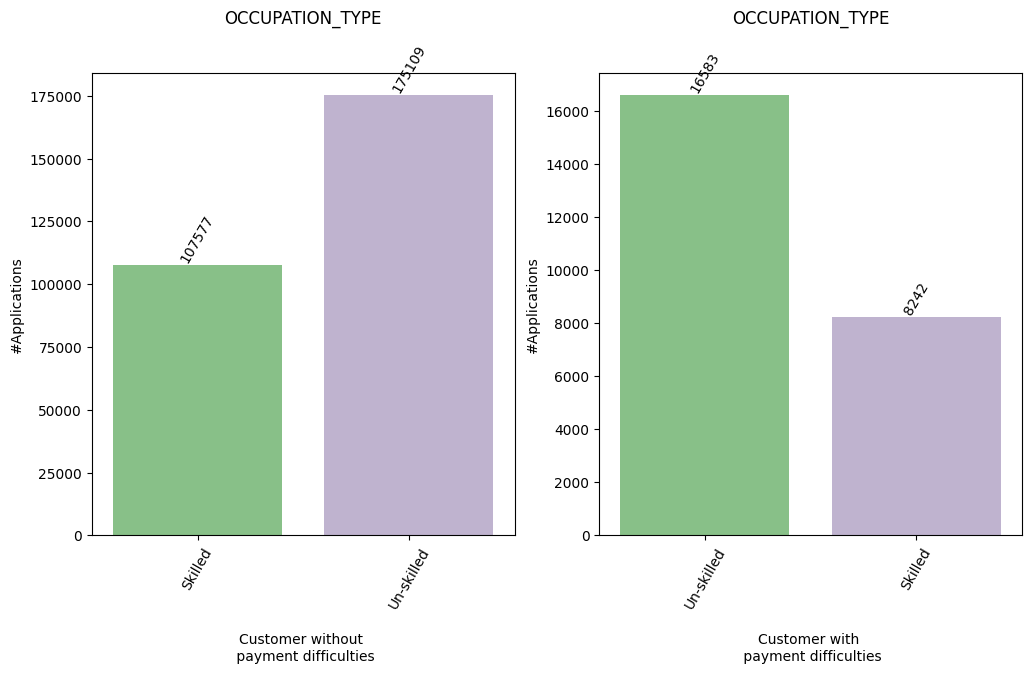

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
12)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


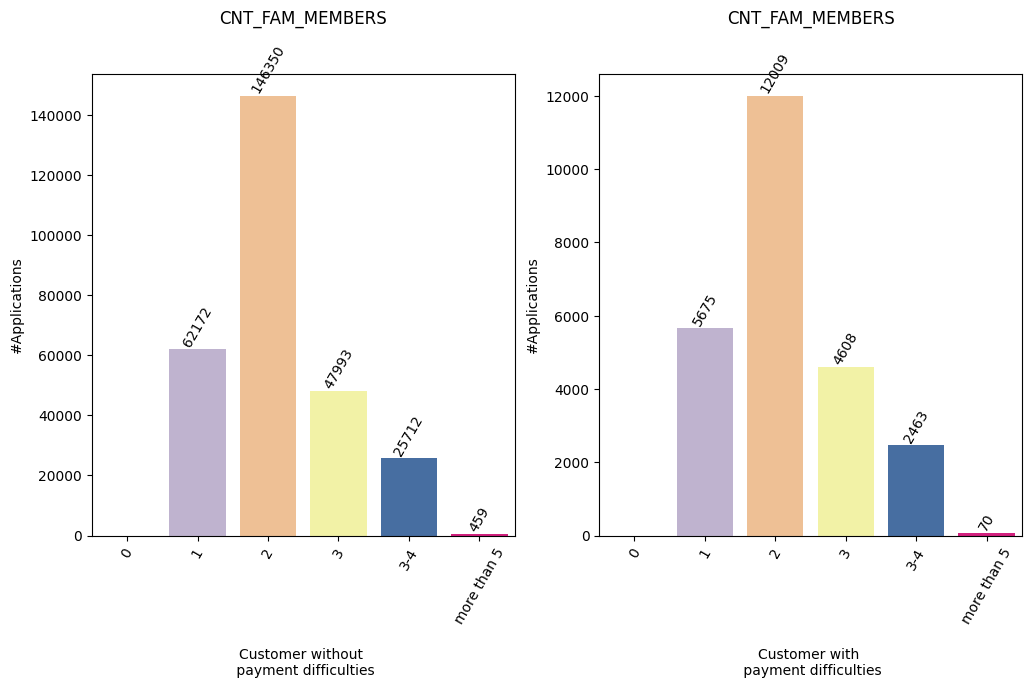

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
13)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


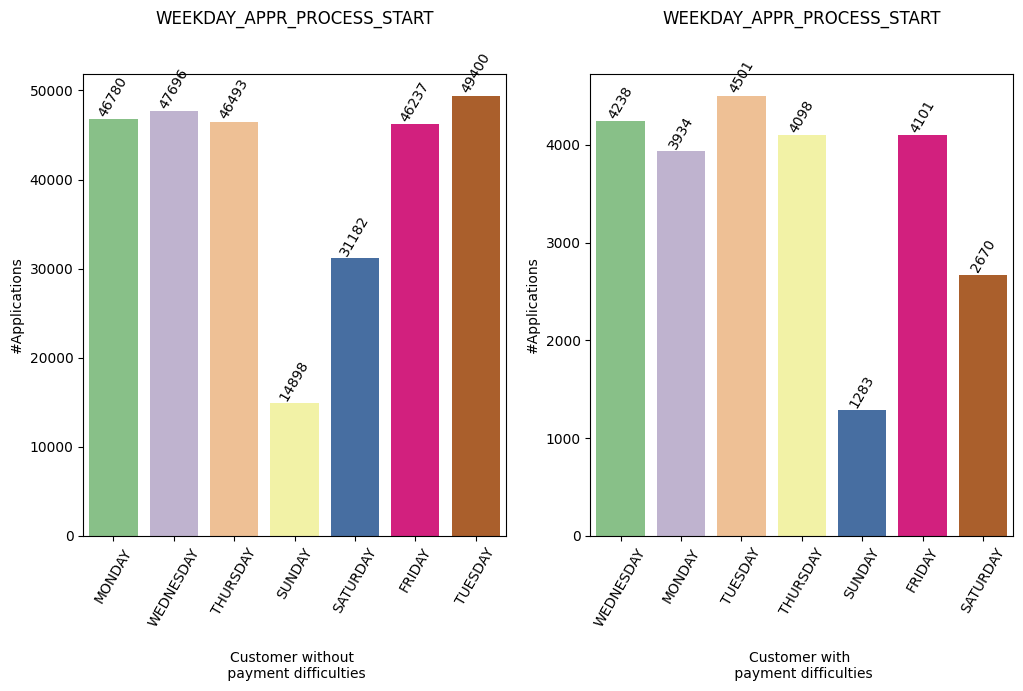

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
14)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


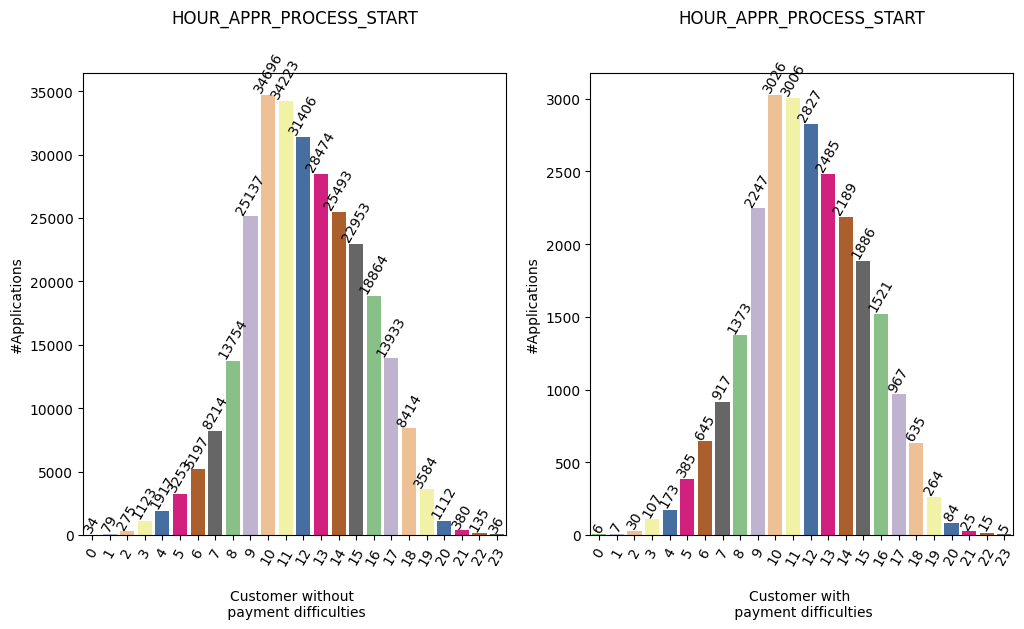

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
15)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


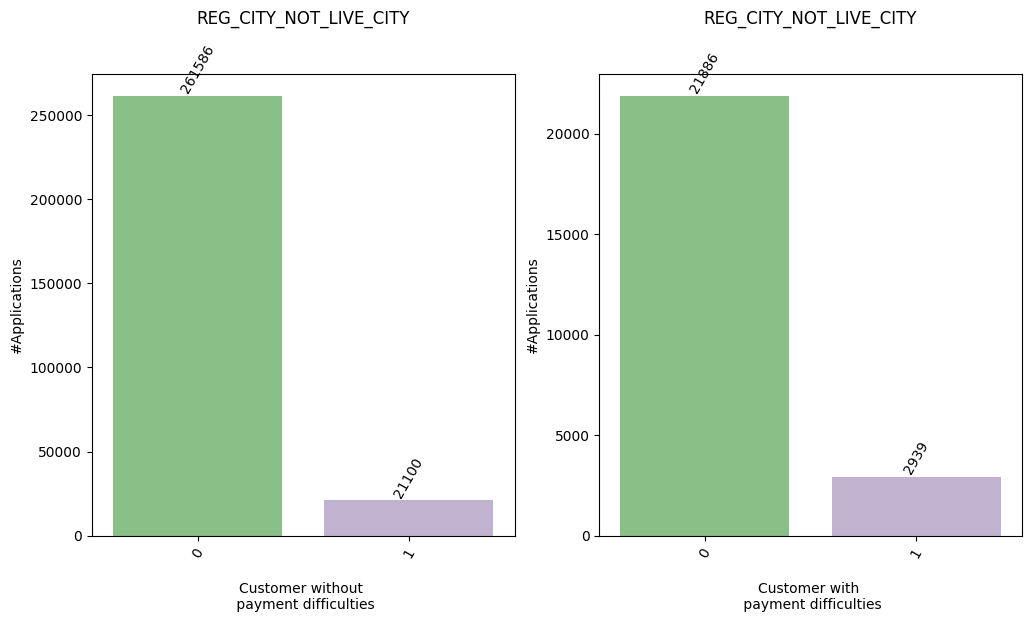

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
16)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


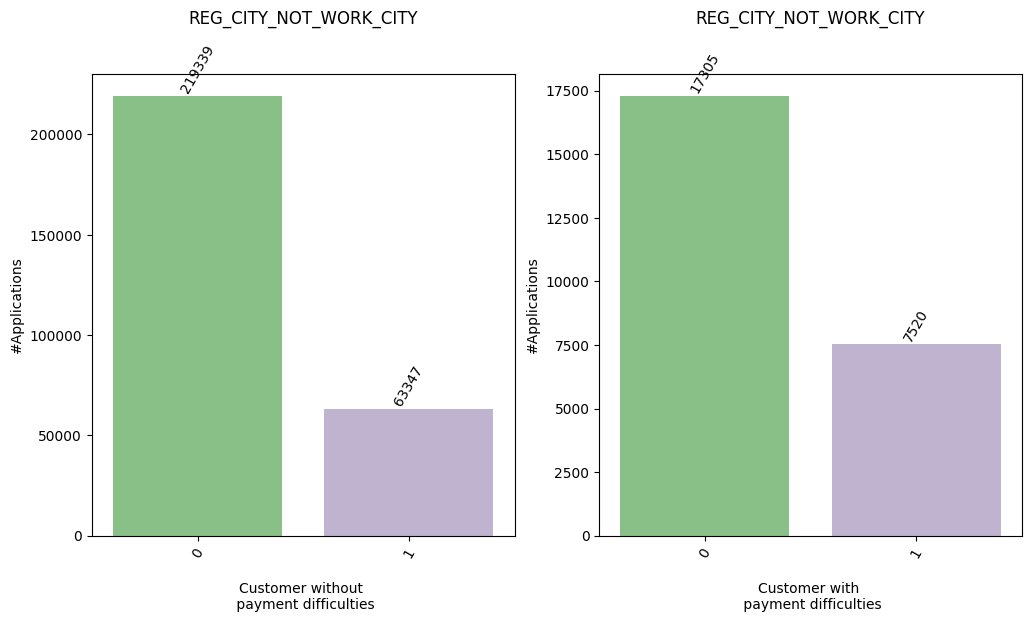

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
17)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


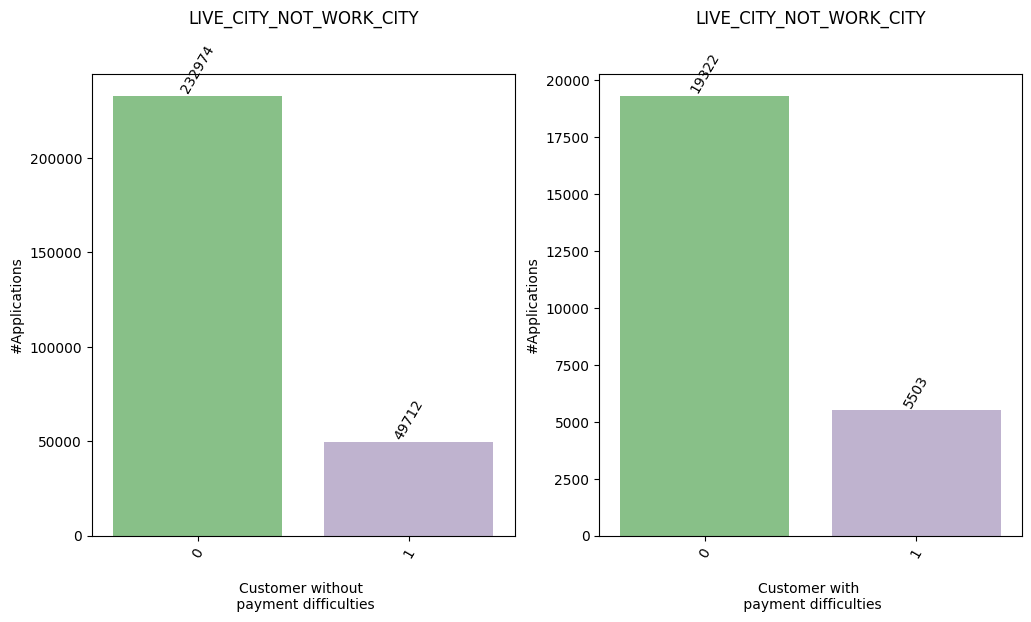

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
18)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


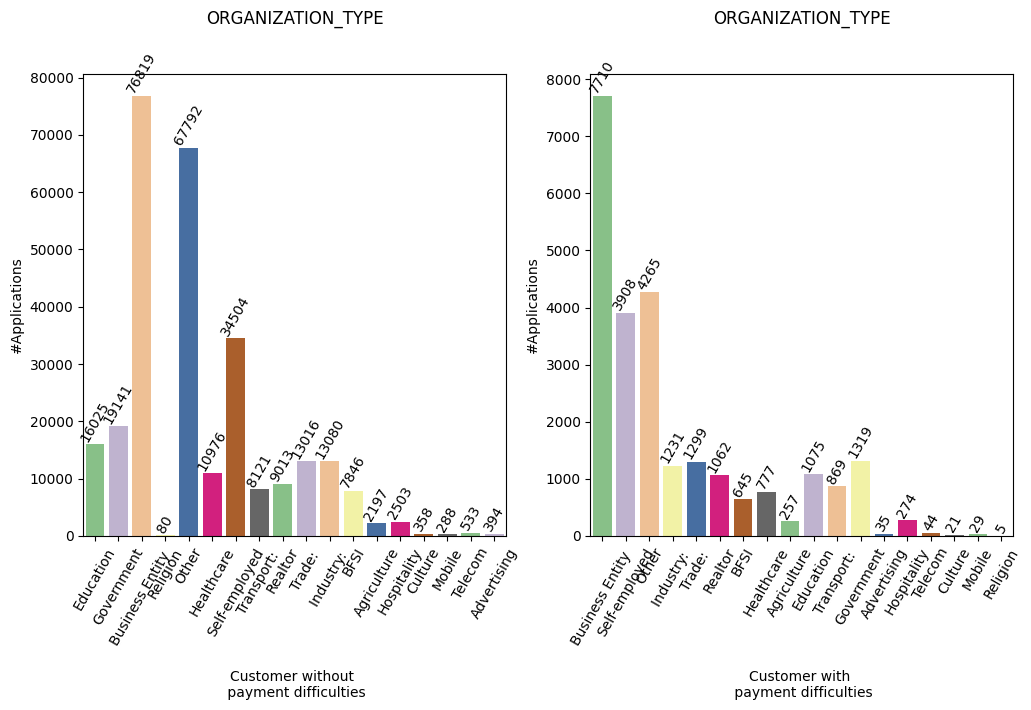

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
19)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


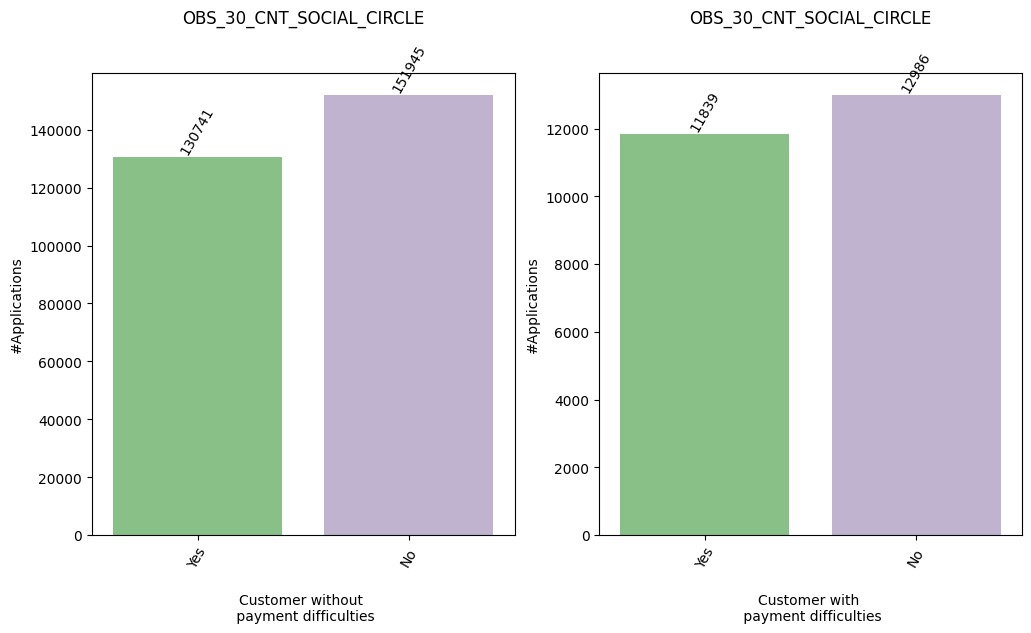

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
20)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


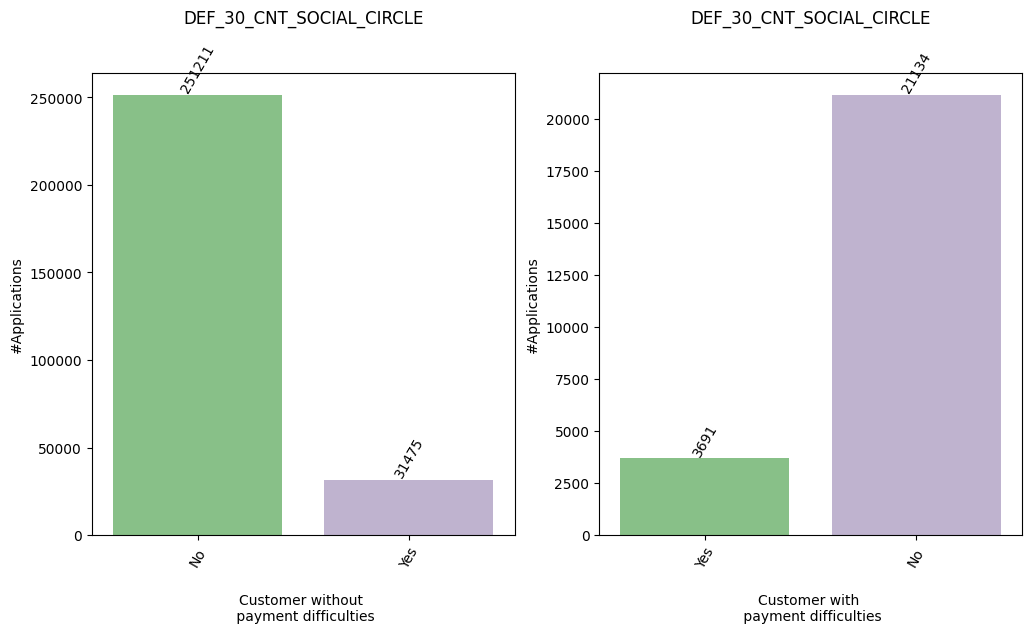

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
21)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


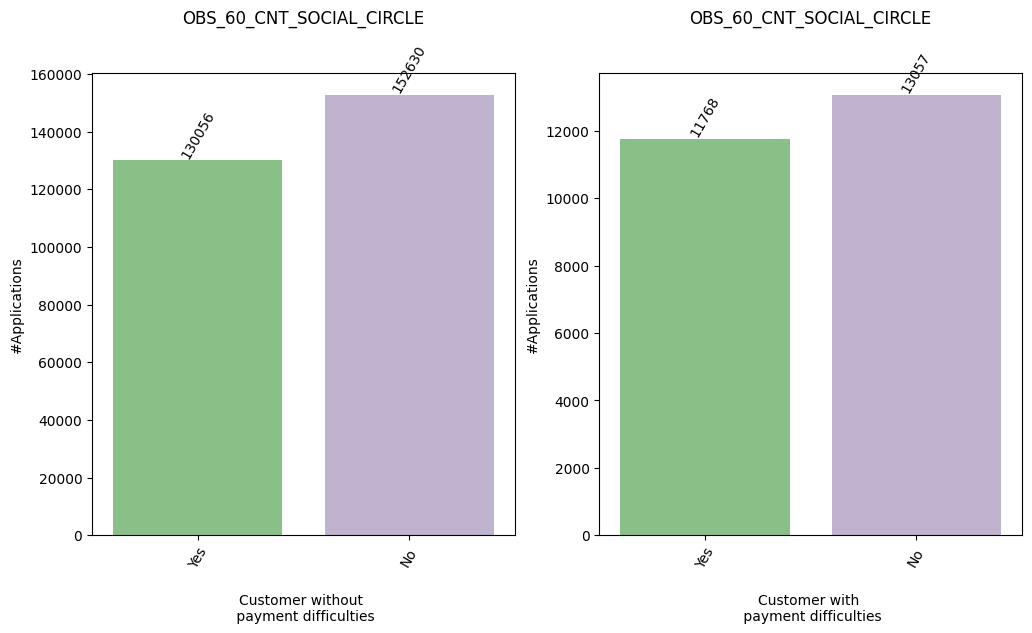

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
22)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


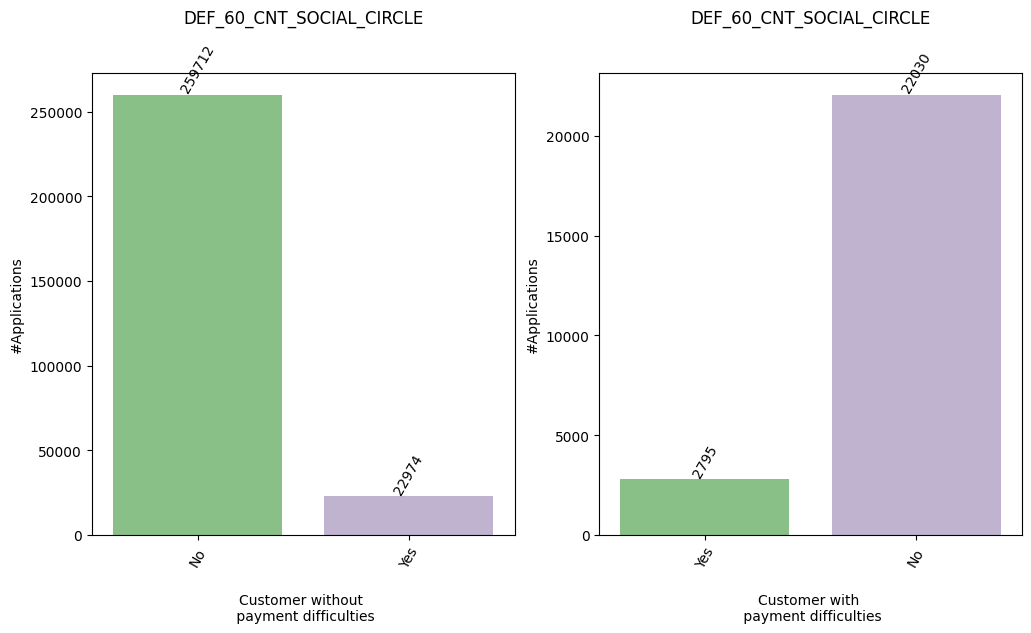

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
23)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


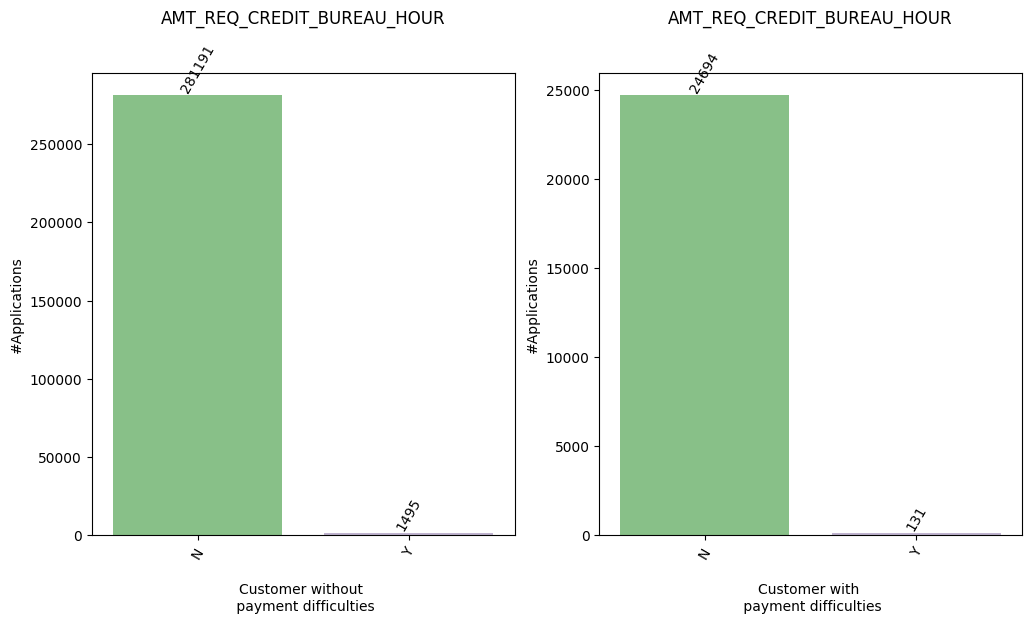

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
24)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


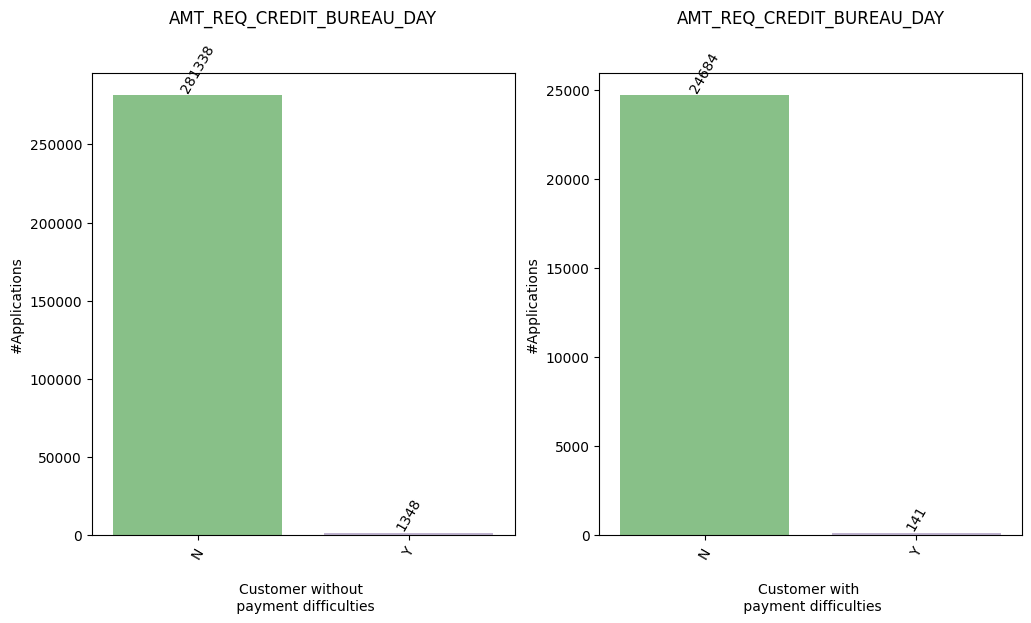

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
25)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


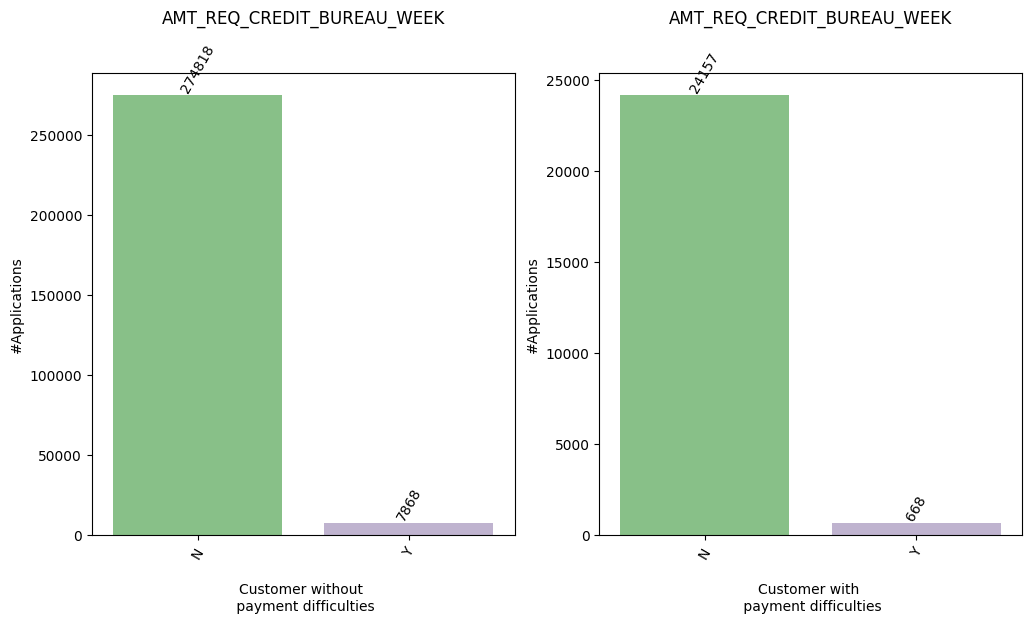

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
26)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


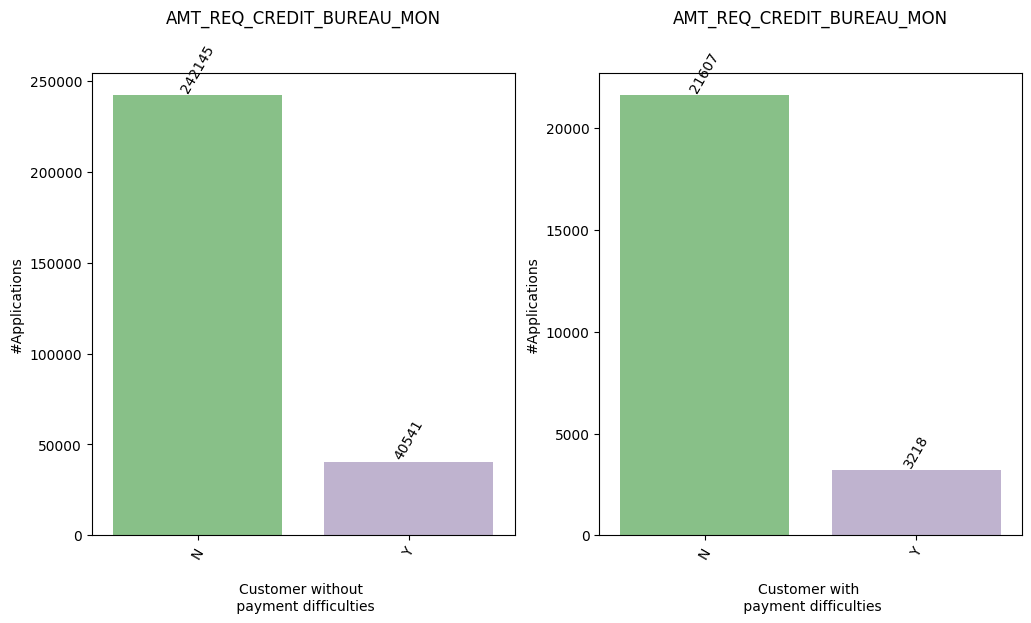

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
27)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


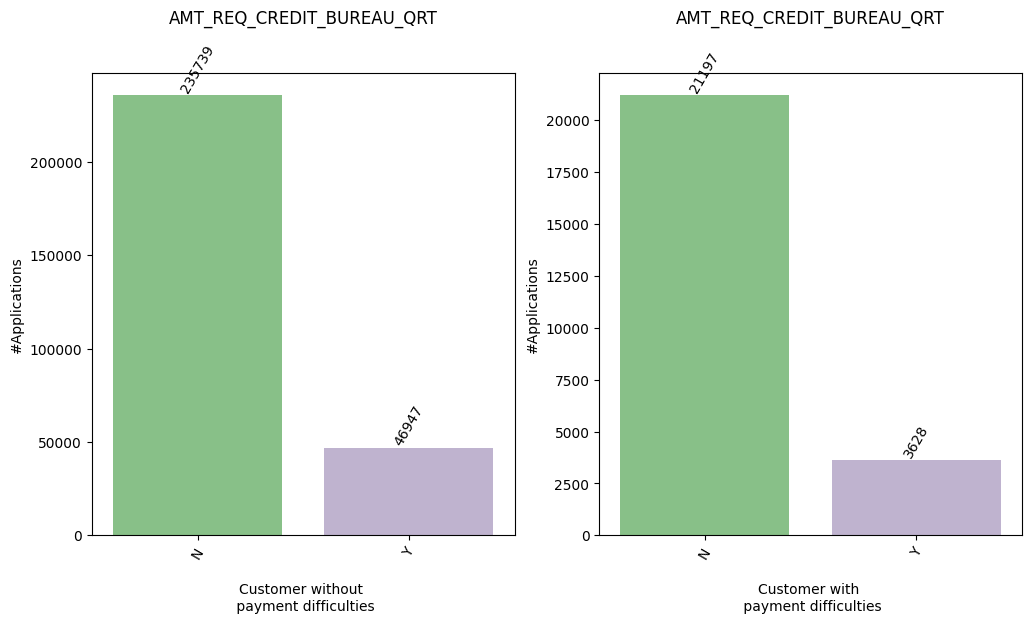

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
28)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


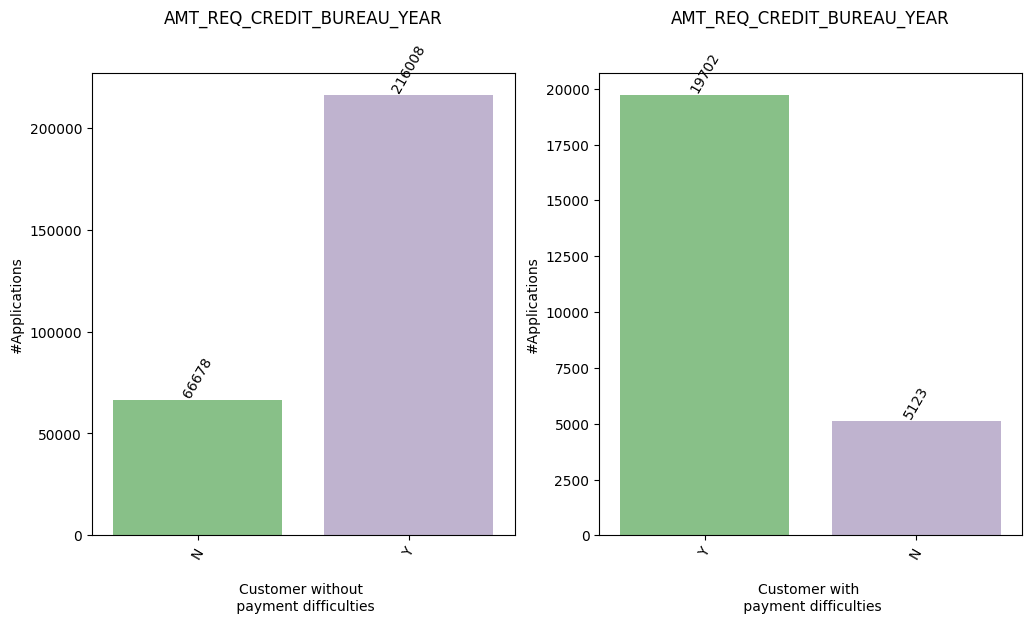

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
29)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
C:\Users\Acer\AppData\Local\Temp\ipykernel_6232\3953593336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')


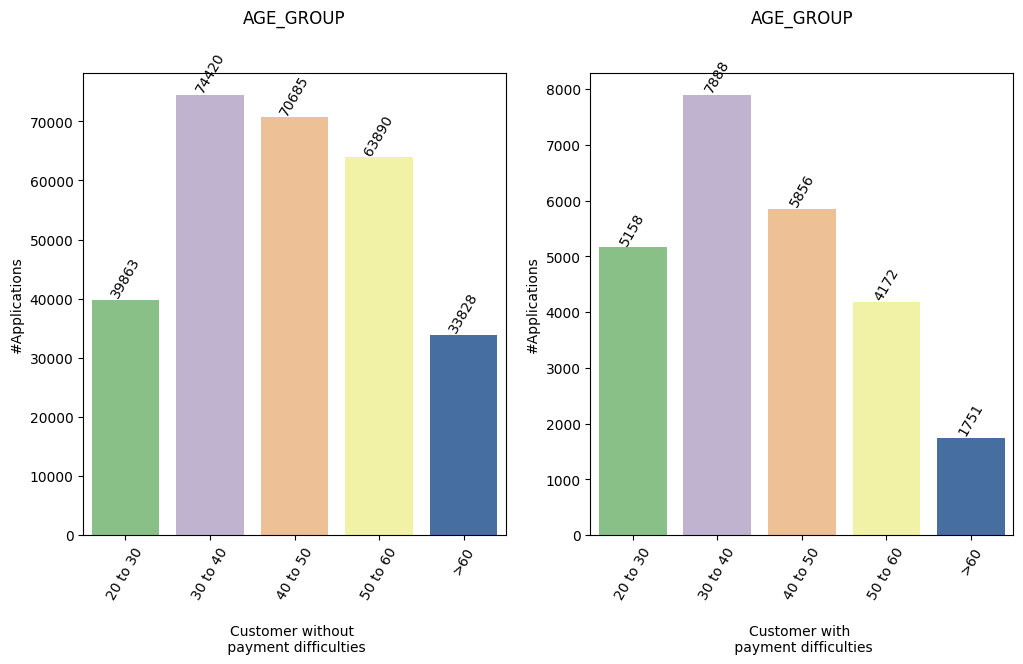

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [76]:
c=1
for i in Cat_col_types:
    print(str(c)+")")
    c+=1
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    ax=sns.countplot(data=new_application_data0,x=i,palette='Accent')
    plt.xlabel("\nCustomer without \n payment difficulties")
    for x in ax.containers:
        ax.bar_label(x,rotation=60)
    plt.xticks(rotation=60)
    plt.title(i+"\n\n")
    plt.ylabel("#Applications")
    plt.subplot(1,2,2)
    ax=sns.countplot(data=new_application_data1,x=i,palette='Accent')
    plt.xlabel("\nCustomer with \n payment difficulties")
    for x in ax.containers:
        ax.bar_label(x,rotation=60)
    plt.xticks(rotation=60)
    plt.title(i+"\n\n")
    plt.ylabel("#Applications")
    plt.show()
    print("X"*120)

#### Correlation matrix of customer with no payment difficulties (TARGET =0)

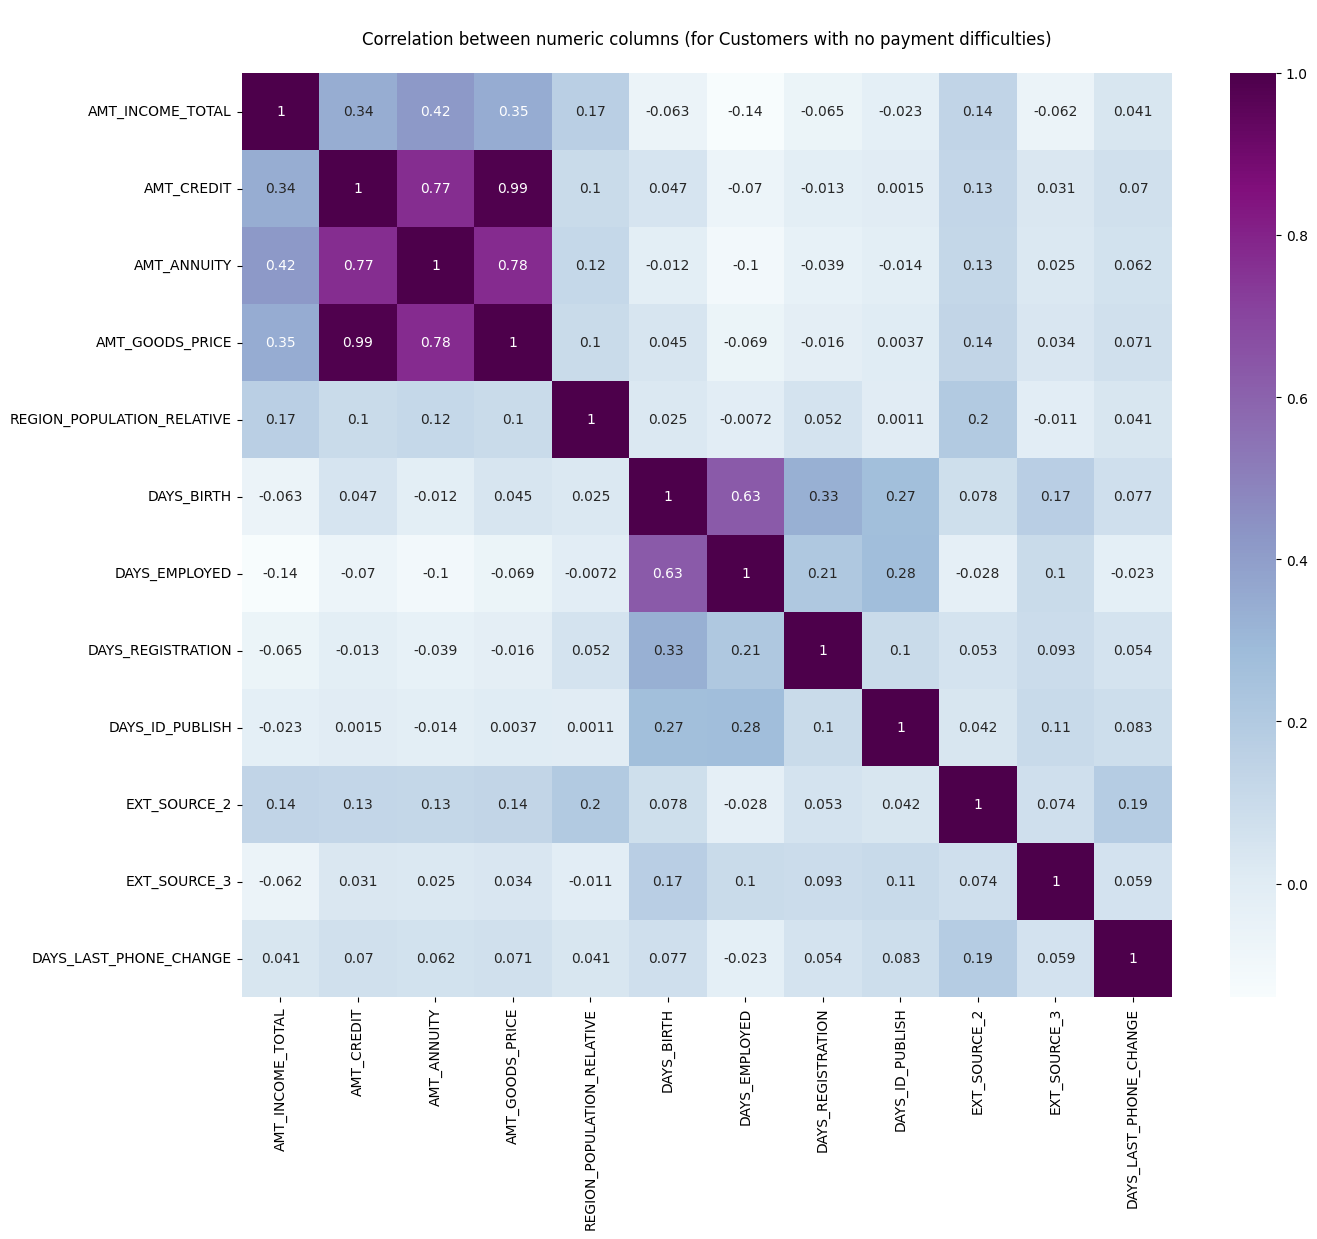

In [77]:
plt.figure(figsize=(15,12))
sns.heatmap(data=new_application_data0[Int_col_types].corr(),cmap="BuPu",annot=True)
plt.title("\nCorrelation between numeric columns (for Customers with no payment difficulties)\n")
plt.show()

####  Correlation matrix of customer with payment difficulties(TARGET = 1 )

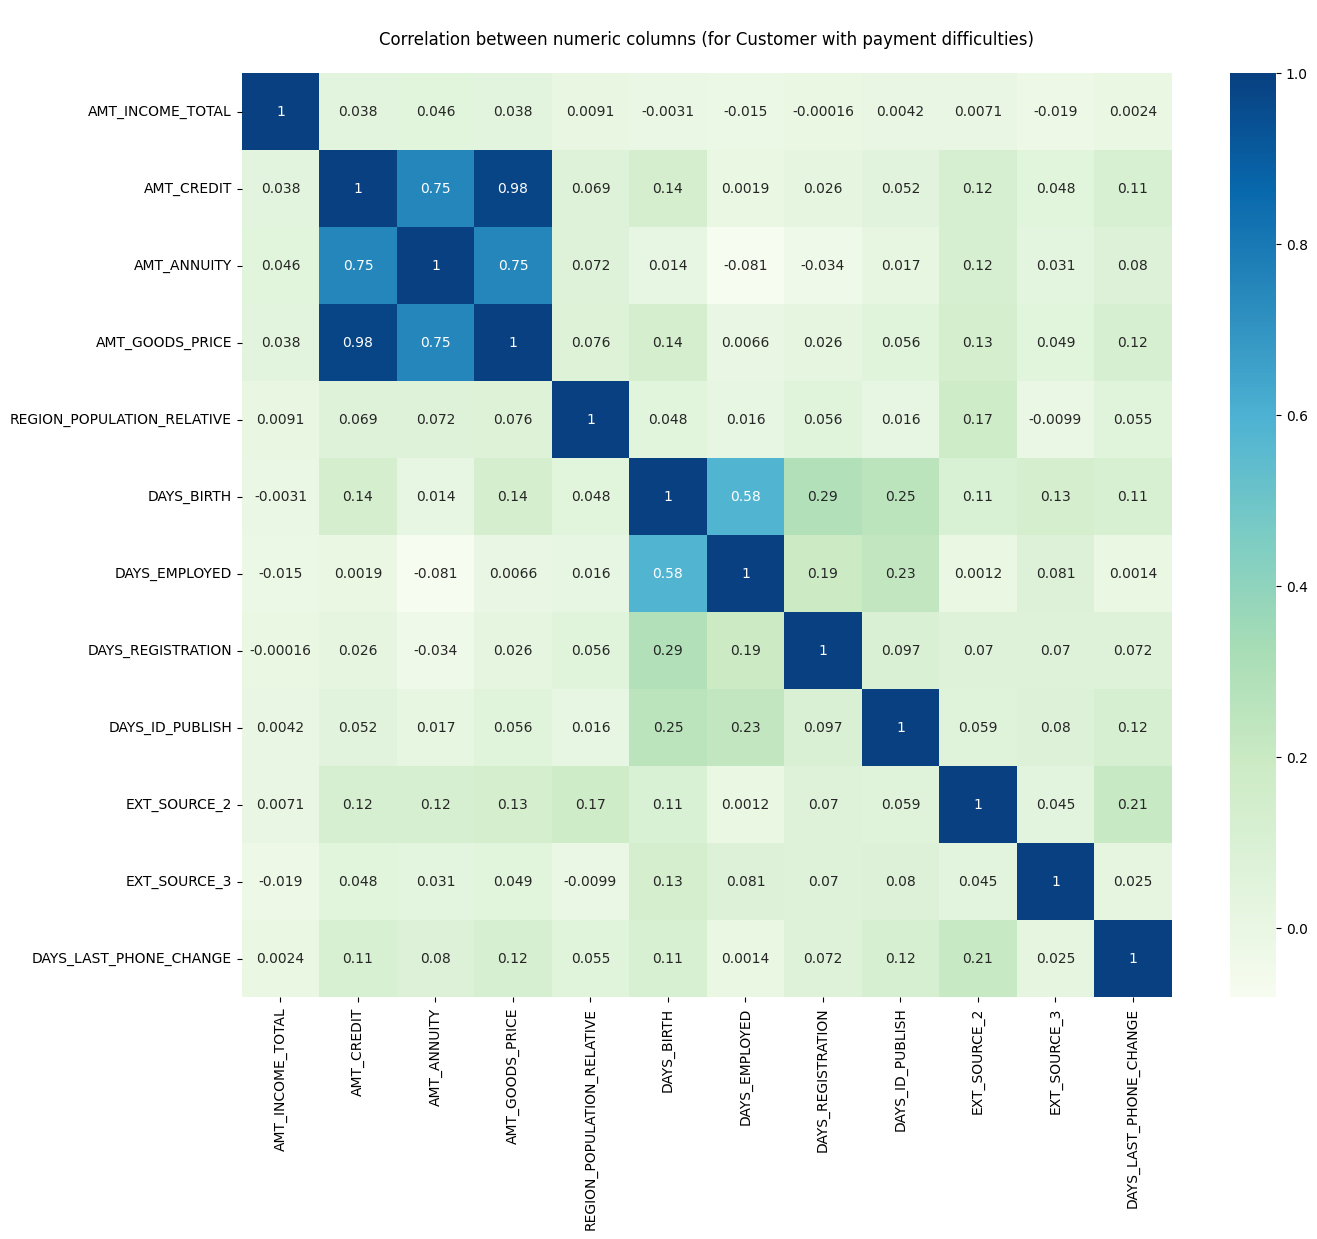

In [78]:

plt.figure(figsize=(15,12))
sns.heatmap(data=new_application_data1[Int_col_types].corr(),cmap="GnBu",annot=True)
plt.title("\nCorrelation between numeric columns (for Customer with payment difficulties)\n")
plt.show()

#### creating boxplots on numeric columns to find outliers

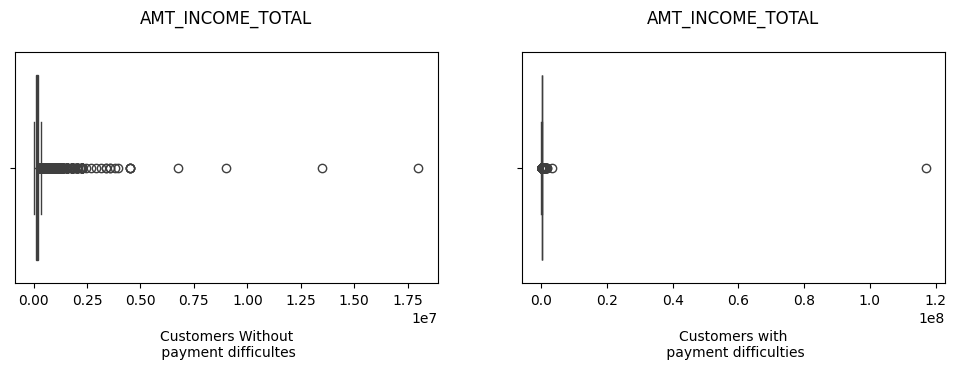

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


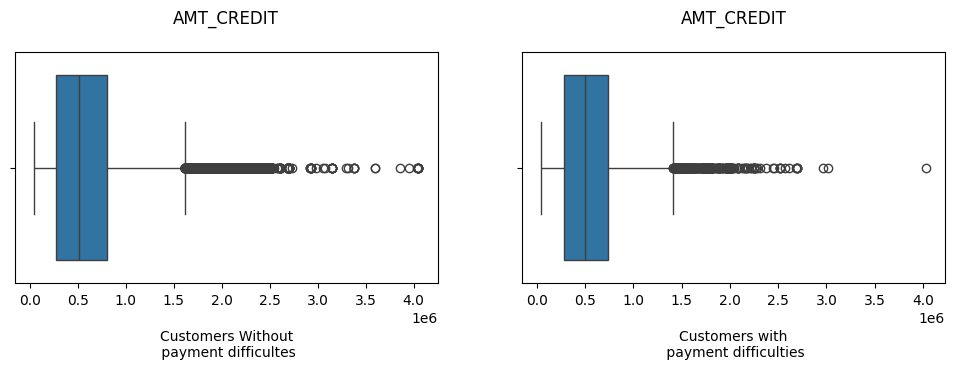

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


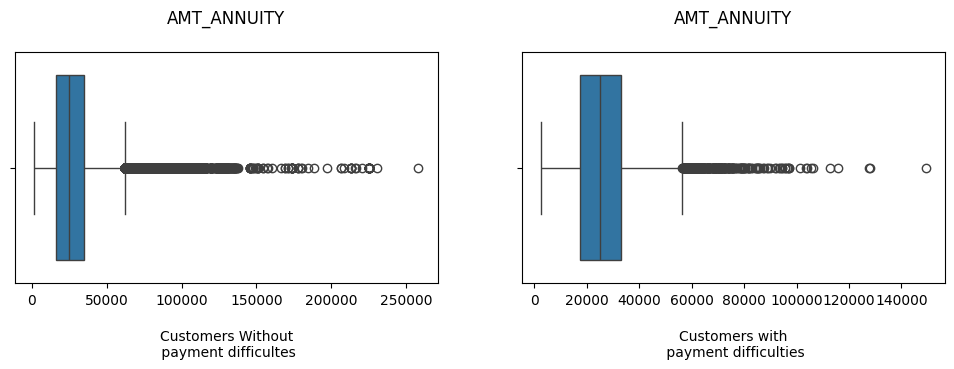

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


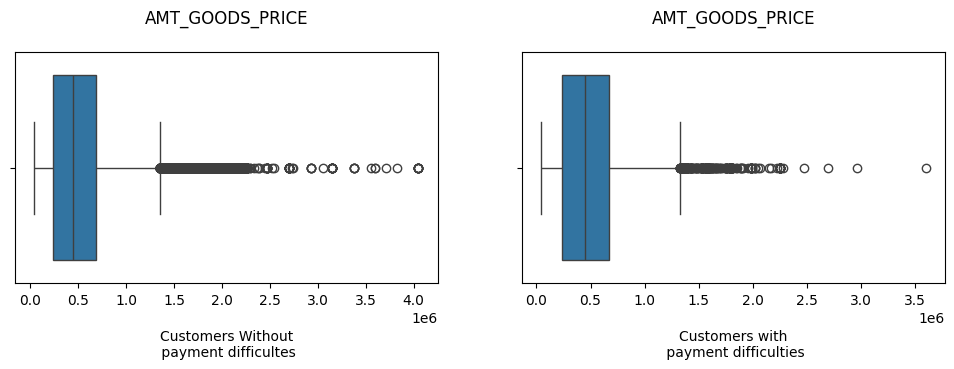

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


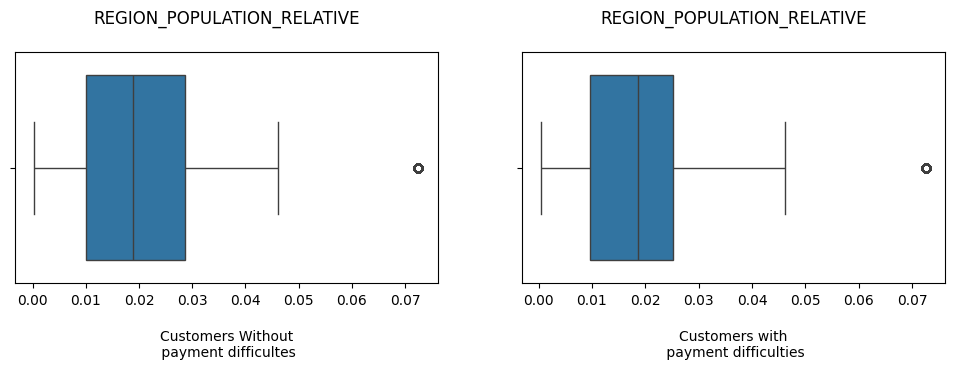

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


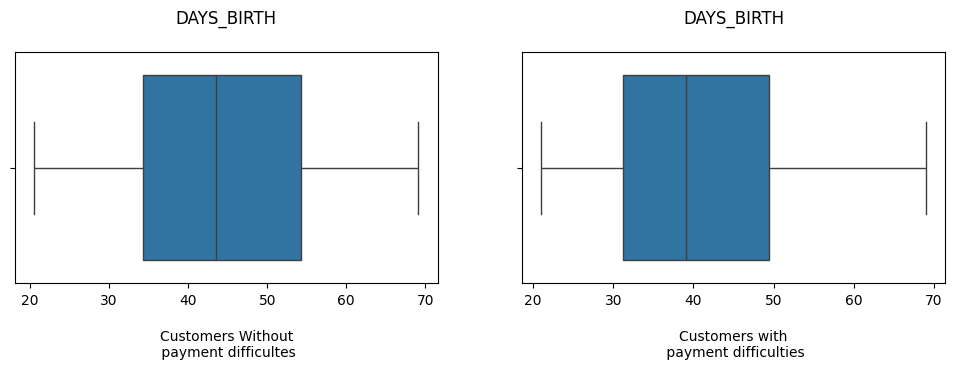

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


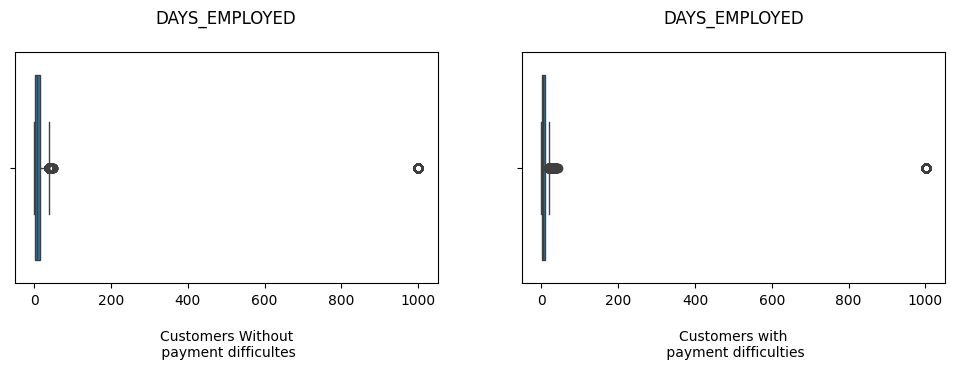

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


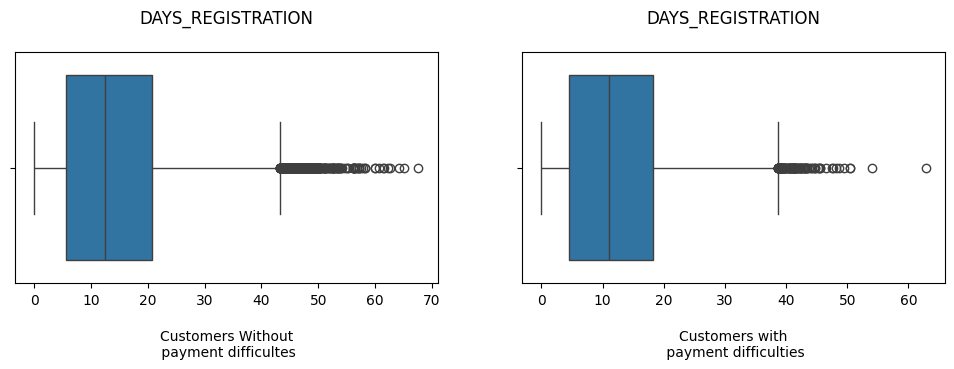

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


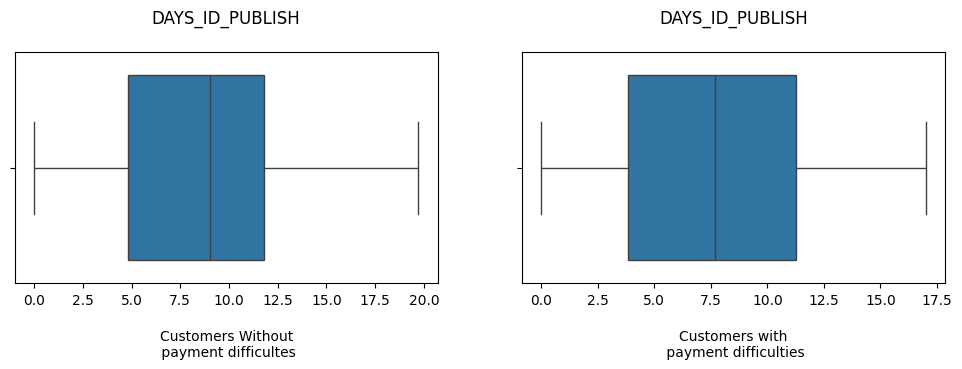

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


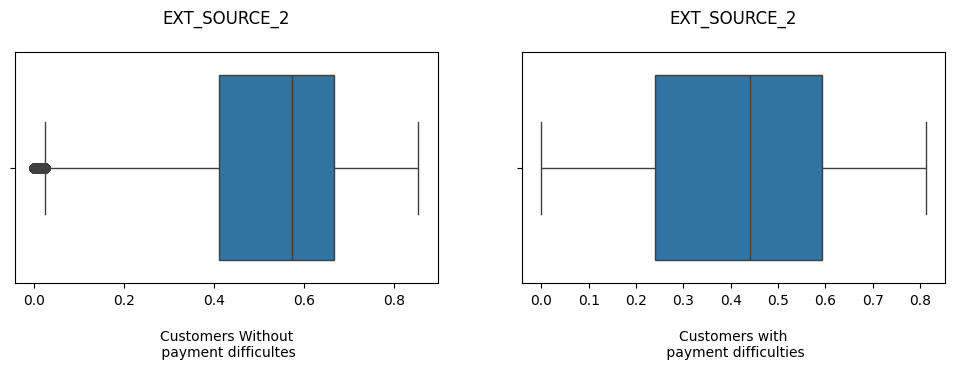

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


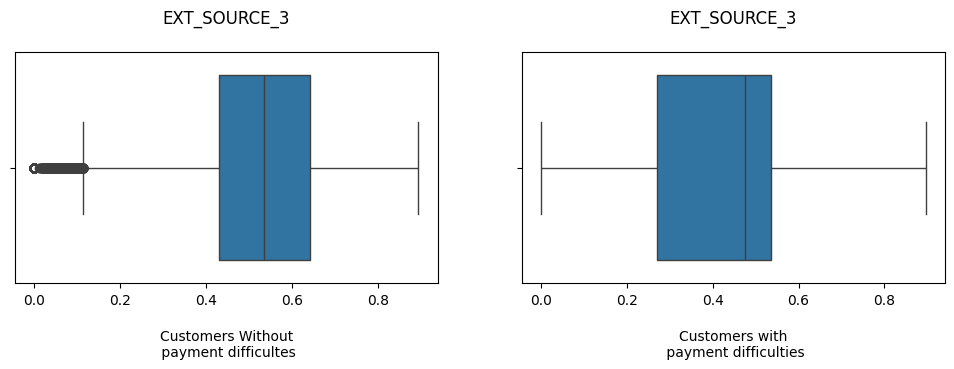

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


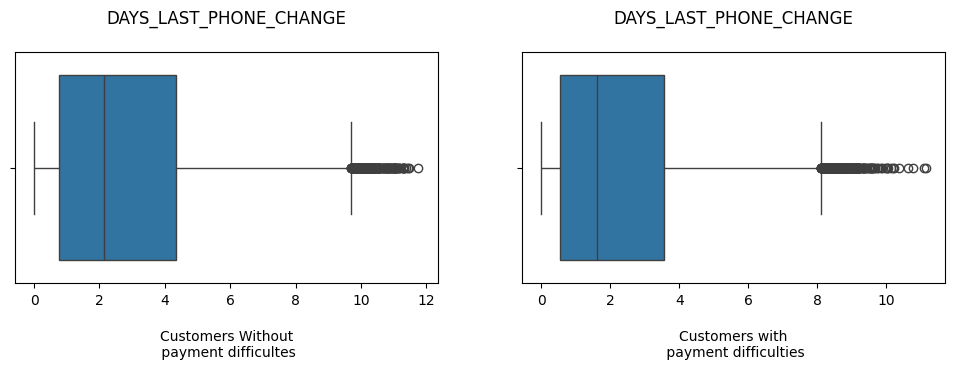

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [79]:
for i in Int_col_types:
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    sns.boxplot(x=new_application_data0[i])
    plt.title(i+"\n")
    plt.xlabel("\nCustomers Without\n payment difficultes")    
    plt.subplot(1,2,2)
    sns.boxplot(x=new_application_data1[i])
    plt.title(i+"\n")
    plt.xlabel("\nCustomers with\n payment difficulties")    
    plt.show()
    print("X"*120)


# Previous Application Data working

In [122]:
# Reading Previous application data
previous_application=pd.read_csv("previous_application.csv")

In [123]:
previous_application.shape

(16973, 37)

In [124]:
previous_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY         float64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                  float64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [85]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16973 entries, 0 to 16972
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   16973 non-null  int64  
 1   SK_ID_CURR                   16973 non-null  int64  
 2   NAME_CONTRACT_TYPE           16973 non-null  object 
 3   AMT_ANNUITY                  13488 non-null  float64
 4   AMT_APPLICATION              16973 non-null  float64
 5   AMT_CREDIT                   16973 non-null  float64
 6   AMT_DOWN_PAYMENT             8702 non-null   float64
 7   AMT_GOODS_PRICE              13461 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   16973 non-null  object 
 9   HOUR_APPR_PROCESS_START      16973 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  16972 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       16972 non-null  float64
 12  RATE_DOWN_PAYMENT            8702 non-null   float64
 13  RATE_INTEREST_PR

In [87]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                     1.0                0.0               0.182832   
1                     1.0                NaN                    NaN   
2                     1.0                NaN                    NaN   
3                     1.0                NaN                    NaN   
4                     1.0                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0          -73.0  Cash through the bank                XAP              NaN   
1         -164.0                    XNA                XAP    Unaccompanied   
2         -301.0  Cash through the bank                XAP  Spouse, partner   
3         -512.0  Cash through the bank                XAP              NaN   
4         -781.0  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide              35.0         Connectivity   
1           Contact center              -1.0                  XNA   
2  Credit and cash offices              -1.0                  XNA   
3  Credit and cash offices              -1.0                  XNA   
4  Credit and cash offices              -1.0                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

#### Checking null value ratio in every column of previous application data

In [88]:
null_previous_application=previous_application.isna().sum().sort_values(ascending=False)/previous_application.shape[0]*100

In [89]:
null_previous_application.head(10)

RATE_INTEREST_PRIVILEGED     99.634714
RATE_INTEREST_PRIMARY        99.634714
RATE_DOWN_PAYMENT            48.730336
AMT_DOWN_PAYMENT             48.730336
NAME_TYPE_SUITE              48.211866
NFLAG_INSURED_ON_APPROVAL    37.683379
DAYS_FIRST_DRAWING           37.683379
DAYS_FIRST_DUE               37.683379
DAYS_LAST_DUE_1ST_VERSION    37.683379
DAYS_LAST_DUE                37.683379
dtype: float64

#### creating a list of columns having >40% null values in previous application data and drop these columns

In [126]:
null40_previous_application=(null_previous_application[null_previous_application>=40]).index.tolist()


In [127]:
new_previous_application=previous_application
new_previous_application.drop(columns=null40_previous_application,inplace=True)

In [128]:
new_previous_application.shape

(16973, 32)

In [129]:
new_previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16973 entries, 0 to 16972
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   16973 non-null  int64  
 1   SK_ID_CURR                   16973 non-null  int64  
 2   NAME_CONTRACT_TYPE           16973 non-null  object 
 3   AMT_ANNUITY                  13488 non-null  float64
 4   AMT_APPLICATION              16973 non-null  float64
 5   AMT_CREDIT                   16973 non-null  float64
 6   AMT_GOODS_PRICE              13461 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   16973 non-null  object 
 8   HOUR_APPR_PROCESS_START      16973 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  16972 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       16972 non-null  float64
 11  NAME_CASH_LOAN_PURPOSE       16972 non-null  object 
 12  NAME_CONTRACT_STATUS         16972 non-null  object 
 13  DAYS_DECISION   

#### lets see the proportion of previous applications approved status (Approved/Rejected/Refused/UnusedOffer)

NAME_CONTRACT_STATUS
Approved        10912
Refused          2958
Canceled         2808
Unused offer      294
Name: count, dtype: int64
NAME_CONTRACT_STATUS
Approved        64.294132
Refused         17.428706
Canceled        16.544897
Unused offer     1.732265
Name: proportion, dtype: float64


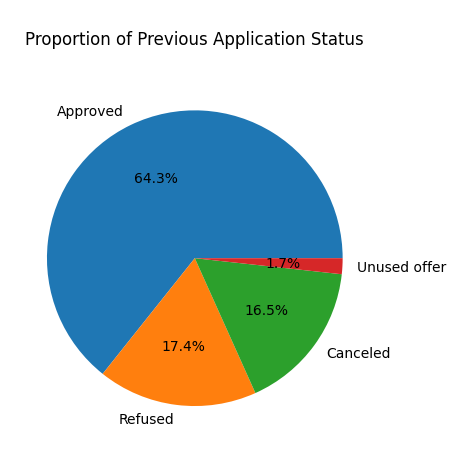

In [130]:
print(new_previous_application['NAME_CONTRACT_STATUS'].value_counts())
Approved_Status_Ratio=new_previous_application['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100
print(Approved_Status_Ratio)
plt.pie(Approved_Status_Ratio,labels=new_previous_application["NAME_CONTRACT_STATUS"].value_counts().index.to_list(),autopct='%1.1f%%')
plt.title("\nProportion of Previous Application Status\n")
plt.show()

####  only approved applications from previous application data.

In [97]:
new_previous_application=new_previous_application[new_previous_application.NAME_CONTRACT_STATUS=="Approved"]

In [98]:
new_previous_application.shape

(10912, 32)

#### lets find the common columns in both datasets

In [99]:
commoncolumns=list(set(new_application_data.columns.tolist()).intersection(set(new_previous_application.columns.tolist())))
commoncolumns.remove("SK_ID_CURR")

#### Removing duplicate columns from previous application data

In [100]:
new_previous_application=new_previous_application.drop(columns=commoncolumns)


## Joining Application data and previous applcation data
Creating new merged data after merging columns from previous application data

In [101]:
new_merged_data=pd.merge(left=new_application_data,right=new_previous_application,how="inner",on="SK_ID_CURR")

#### Merged dataset shape

In [102]:
print("New Merged dataset has : ",new_merged_data.shape[0],"Rows and",new_merged_data.shape[1],"Columns")

New Merged dataset has :  9340 Rows and 70 Columns


In [103]:
new_merged_data.describe()

SK_ID_CURR  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count    9340.000000      9.340000e+03  9.340000e+03    9340.000000   
mean   280347.325803      1.687115e+05  5.920438e+05   26856.288116   
std    103087.133286      8.899440e+04  3.910104e+05   13844.944068   
min    100007.000000      2.790000e+04  4.500000e+04    2317.500000   
25%    191574.750000      1.125000e+05  2.700000e+05   16534.125000   
50%    279653.000000      1.575000e+05  5.130202e+05   24939.000000   
75%    371738.750000      2.025000e+05  8.086500e+05   34587.000000   
max    456254.000000      1.575000e+06  2.517300e+06  133155.000000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE   DAYS_BIRTH  \
count     9.340000e+03                 9340.000000  9340.000000   
mean      5.327197e+05                    0.021039    44.607806   
std       3.593853e+05                    0.013577    11.907874   
min       4.050000e+04                    0.000533    21.068493   
25%       2.340000e+05                    0.010032    34.897260   
50%       4.500000e+05                    0.019101    43.797260   
75%       6.840000e+05                    0.028663    54.658904   
max       2.250000e+06                    0.072508    68.917808   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  EXT_SOURCE_2  \
count    9340.000000        9340.000000      9340.000000   9340.000000   
mean      196.508814          13.773563         8.396253      0.514158   
std       390.668924           9.693638         4.114963      0.189045   
min         0.035616           0.000000         0.000000      0.000006   
25%         2.941781           5.560959         5.065068      0.397883   
50%         6.802740          12.349315         9.217808      0.564785   
75%        16.543151          20.594521        11.879452      0.661506   
max      1000.665753          60.583562        16.876712      0.855000   

       EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE    SK_ID_PREV  AMT_APPLICATION  \
count   9340.000000             9340.000000  9.340000e+03     9.340000e+03   
mean       0.515891                3.028743  1.905779e+06     1.678749e+05   
std        0.174970                2.236300  5.383963e+05     2.404579e+05   
min        0.000527                0.000000  1.000016e+06     0.000000e+00   
25%        0.413597                1.076712  1.434754e+06     4.500000e+04   
50%        0.535276                2.864384  1.896380e+06     8.995500e+04   
75%        0.641368                4.710274  2.374086e+06     1.800000e+05   
max        0.882530               11.378082  2.843490e+06     2.599650e+06   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  \
count             9340.000000    9340.000000      9.340000e+03  9340.000000   
mean                 0.999358   -1107.940364      8.757832e+02    13.732655   
std                  0.025339     806.574416      4.141615e+04    11.436203   
min                  0.000000   -2922.000000     -1.000000e+00     0.000000   
25%                  1.000000   -1674.000000     -1.000000e+00     6.000000   
50%                  1.000000    -847.500000      4.000000e+01    12.000000   
75%                  1.000000    -450.000000      2.000000e+02    18.000000   
max                  1.000000      -2.000000      4.000000e+06    60.000000   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count         9058.000000     9058.000000                9058.000000   
mean        345349.369728    14456.409693               30208.623758   
std          83012.968901    73915.778081              101766.517077   
min          -2889.000000    -2891.000000               -2800.000000   
25%         365243.000000    -1649.000000               -1291.000000   
50%         365243.000000     -815.000000                -379.000000   
75%         365243.000000     -404.250000                 100.000000   
max         365243.000000   365243.000000              365243.000000   

       DAYS_LAST_DUE  DAYS_TERMINAT

In [104]:
new_merged_data.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100007      0         Cash loans           M            N   
1      100009      0         Cash loans           F            Y   
2      100043      0         Cash loans           F            N   
3      100121      0         Cash loans           M            N   
4      100124      0         Cash loans           M            N   

  FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y            0          121500.0    513000.0      21865.5   
1               Y            1          171000.0   1560726.0      41301.0   
2               Y            2          198000.0    641173.5      23157.0   
3               Y            0          126000.0    787131.0      26145.0   
4               Y            0          225000.0    448272.0      28647.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         513000.0   Unaccompanied           Income   
1        1395000.0   Unaccompanied           Income   
2         553500.0   Unaccompanied           Income   
3         679500.0   Unaccompanied           Income   
4         396000.0   Unaccompanied           Income   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special         Un-married  House / apartment   
1               Higher education            Married  House / apartment   
2  Secondary / secondary special            Married  House / apartment   
3  Secondary / secondary special            Married       With parents   
4  Secondary / secondary special         Un-married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.028663   54.608219       8.323288          11.810959   
1                    0.035792   37.747945       8.575342           3.323288   
2                    0.018850   47.120548       2.104110           0.172603   
3                    0.018209   46.021918       1.832877          25.720548   
4                    0.072508   65.893151    1000.665753          19.287671   

   DAYS_ID_PUBLISH OCCUPATION_TYPE CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
0         9.473973         Skilled               1                   THURSDAY   
1         1.695890         Skilled               3                     SUNDAY   
2         2.013699         Skilled             3-4                   THURSDAY   
3         0.950685      Un-skilled               2                     FRIDAY   
4        11.104110      Un-skilled               1                  WEDNESDAY   

  HOUR_APPR_PROCESS_START REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY  \
0                      11                      0                      1   
1                      16                      0                      0   
2                      13                      0                      0   
3                       7                      0                      0   
4                      17                      0                      0   

  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0                       1          Religion      0.322738      0.535276   
1                       0  Business Entity       0.724000      0.492060   
2                       0             Other      0.681699      0.754406   
3                       0  Business Entity       0.586150      0.581484   
4                       0             Other      0.710318      0.554947   

  OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
0                       No                       No                       No   
1                      Yes                       No                      Yes   
2                       No                       No                       No   
3                      Yes                      Yes                      Yes   
4                       No                       No                       No   

  DEF_60_C

#### Getting all columns of merged dataset to a list.

In [105]:
new_merged_data.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AGE_GROUP',
 'AMT_INC_RANGE'

#### No of Categorical and numerical columns in Merged dataset

In [106]:
print("Merged dataset has " , len(new_merged_data.select_dtypes(["object","category"]).columns.to_list())," Categorical Columns")
print("Merged dataset has " , len(new_merged_data.select_dtypes(["int","float"]).columns.to_list())," Numerical Columns")

Merged dataset has  45  Categorical Columns
Merged dataset has  25  Numerical Columns


In [107]:
new_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9340 entries, 0 to 9339
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   9340 non-null   int64   
 1   TARGET                       9340 non-null   object  
 2   NAME_CONTRACT_TYPE           9340 non-null   object  
 3   CODE_GENDER                  9340 non-null   object  
 4   FLAG_OWN_CAR                 9340 non-null   object  
 5   FLAG_OWN_REALTY              9340 non-null   object  
 6   CNT_CHILDREN                 9340 non-null   category
 7   AMT_INCOME_TOTAL             9340 non-null   float64 
 8   AMT_CREDIT                   9340 non-null   float64 
 9   AMT_ANNUITY                  9340 non-null   float64 
 10  AMT_GOODS_PRICE              9340 non-null   float64 
 11  NAME_TYPE_SUITE              9340 non-null   object  
 12  NAME_INCOME_TYPE             9340 non-null   object  
 13  NAM

#### Comparing payment difficulties or no payment difficulties with other Categorical columns.

In [108]:
New_Cat_col_types=new_merged_data.select_dtypes(["category","object"]).columns.to_list()
New_Int_col_types=new_merged_data.select_dtypes(["int","float"]).columns.to_list()

1)


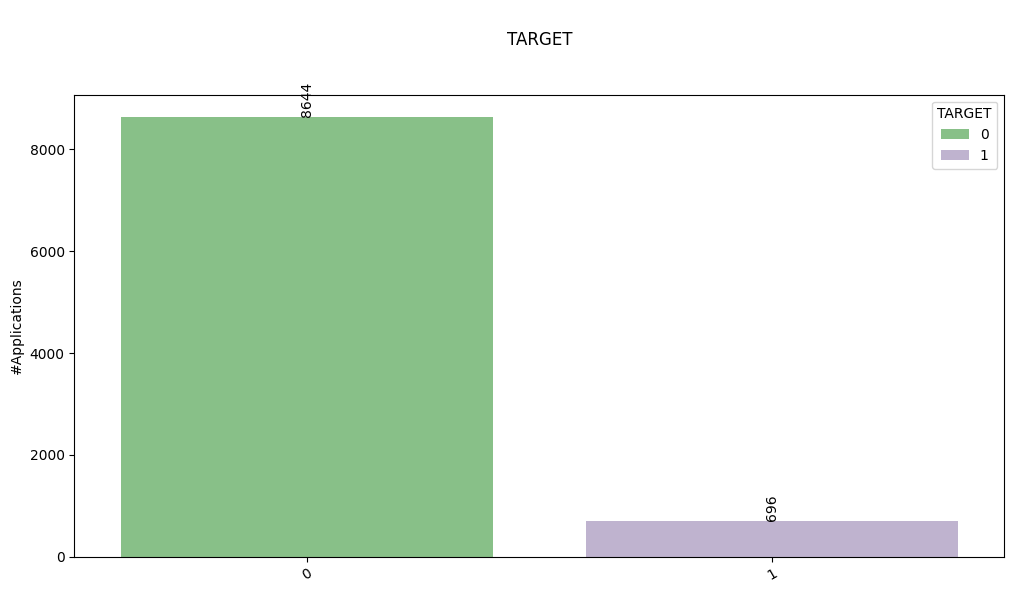

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
2)


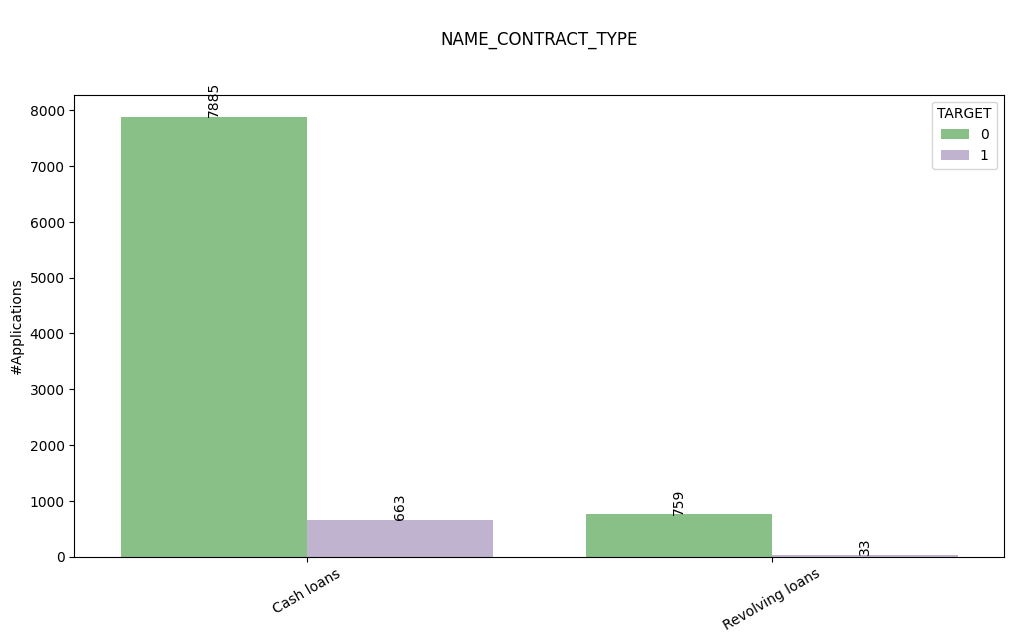

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
3)


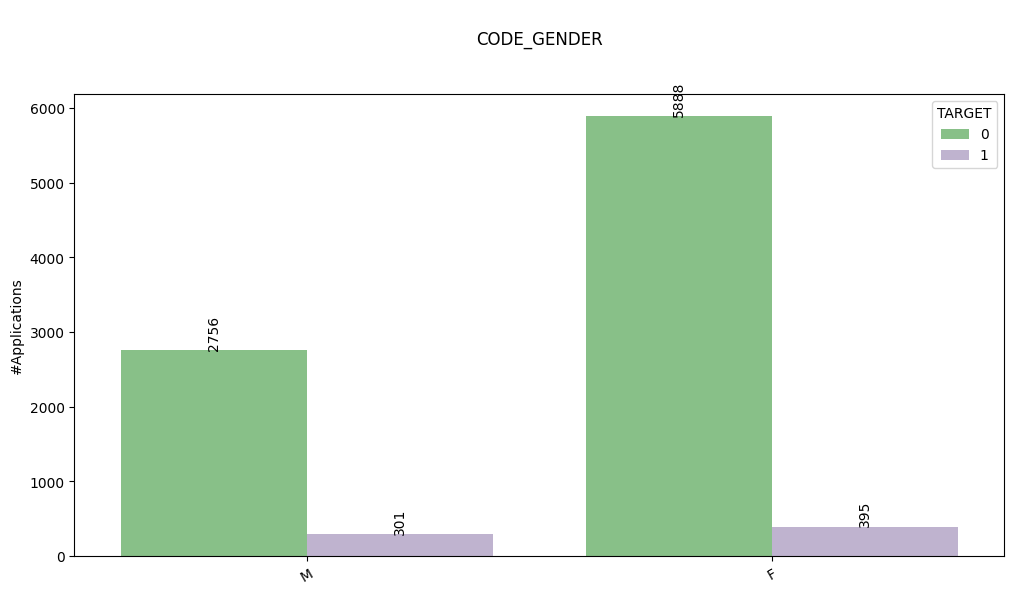

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
4)


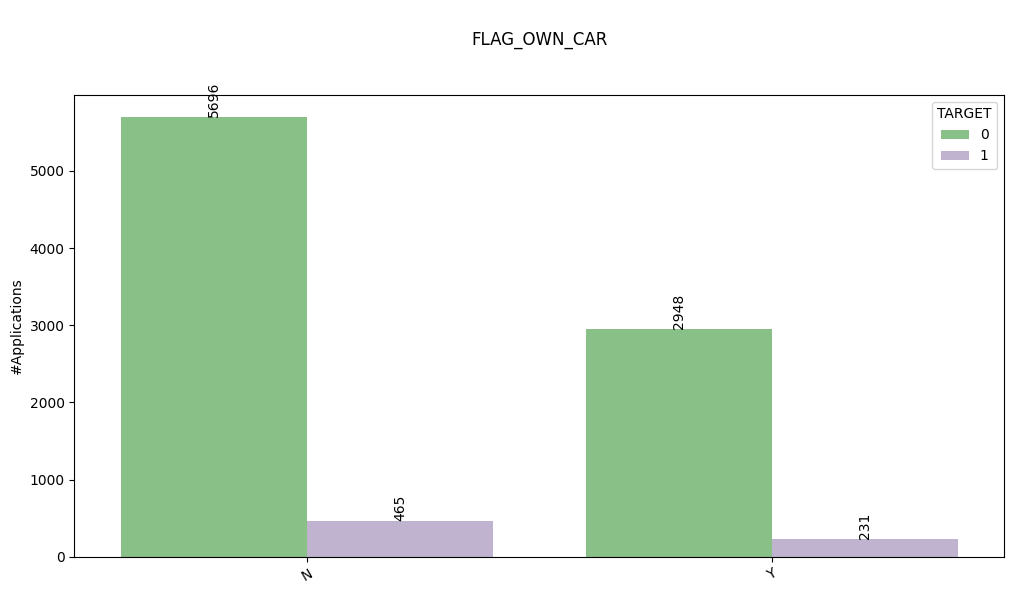

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
5)


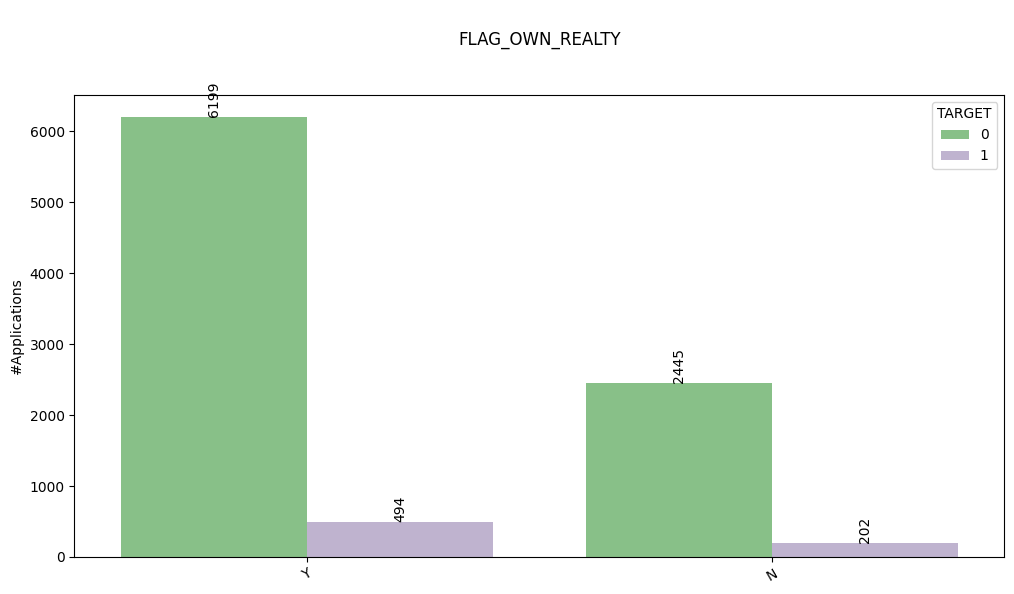

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
6)


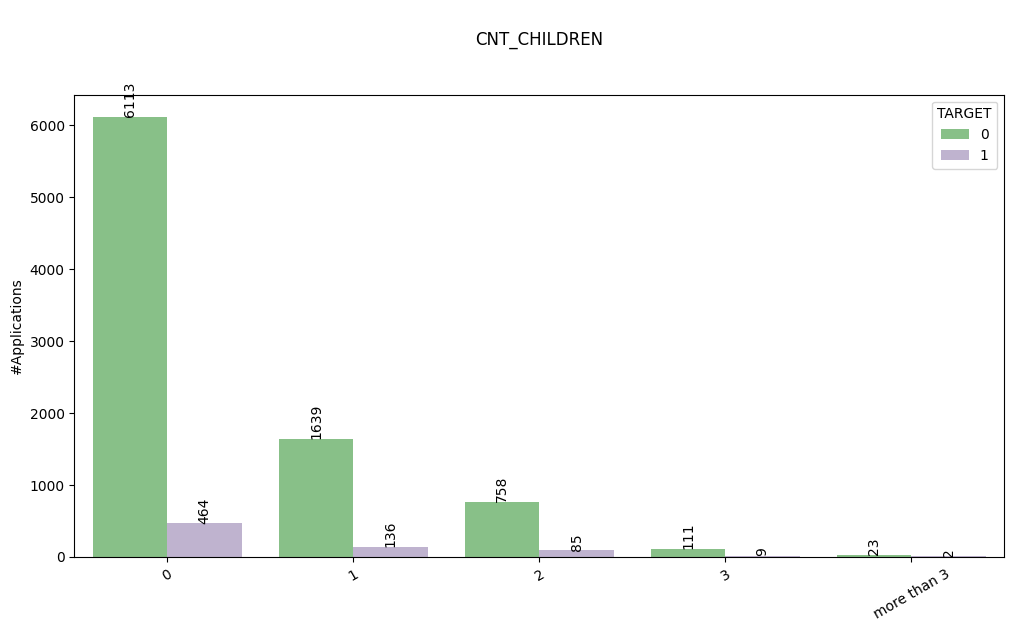

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
7)


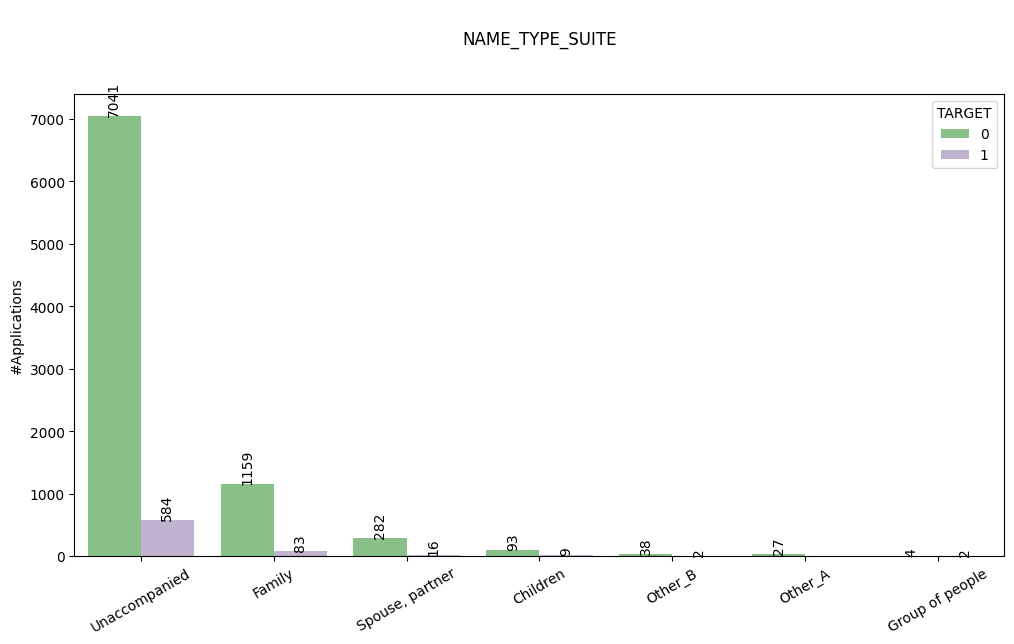

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
8)


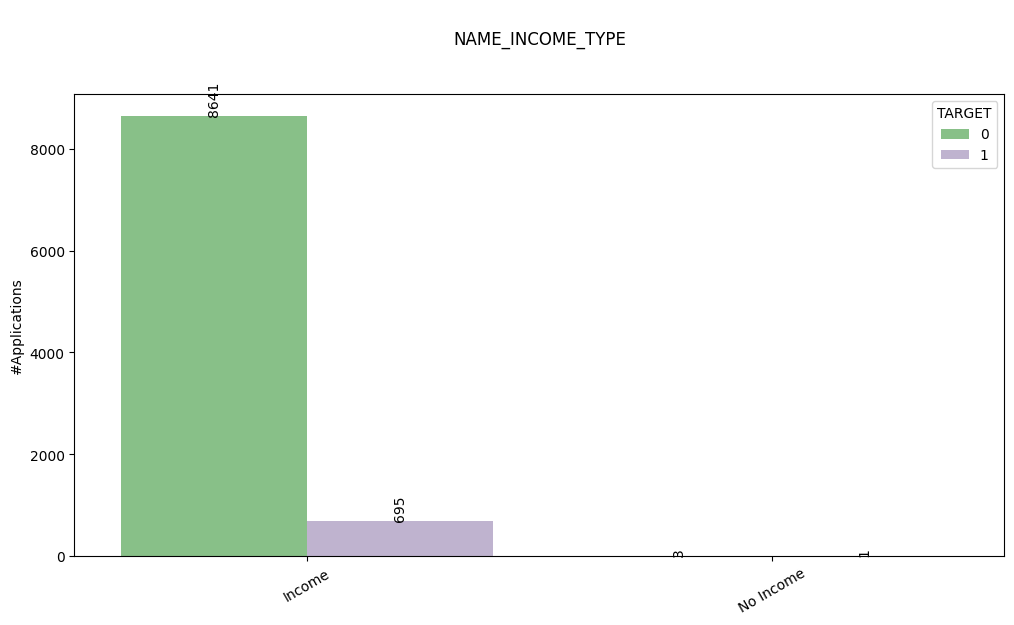

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
9)


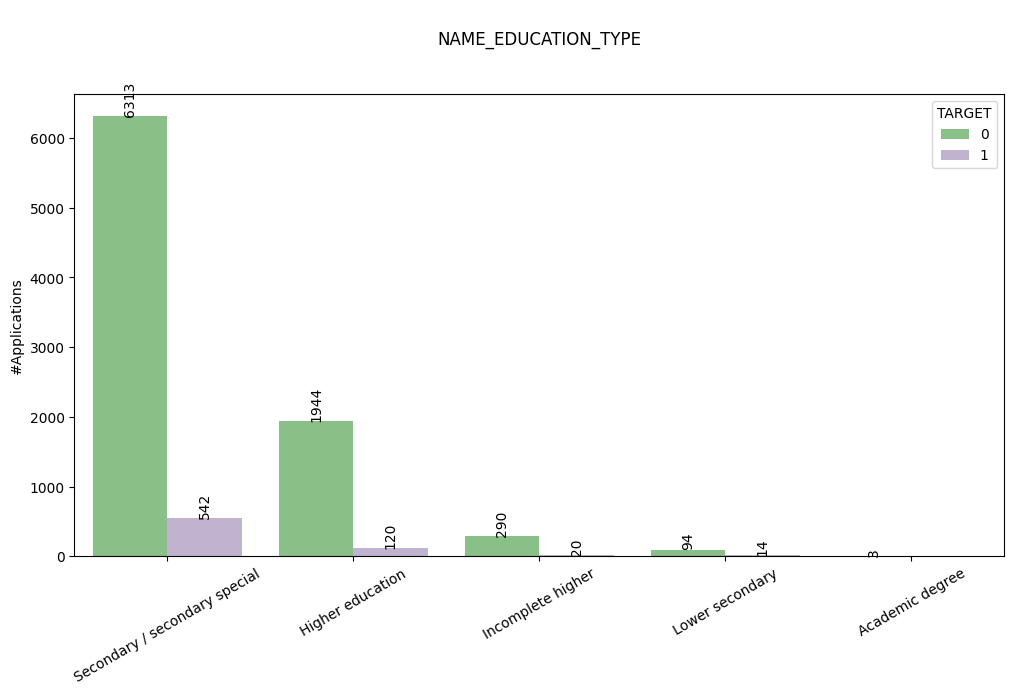

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
10)


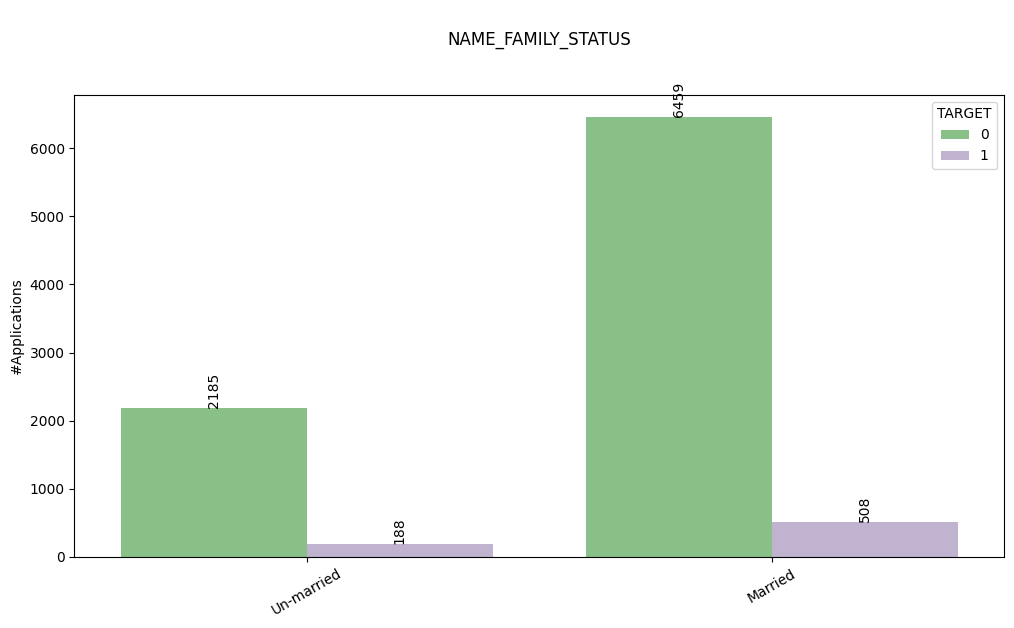

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
11)


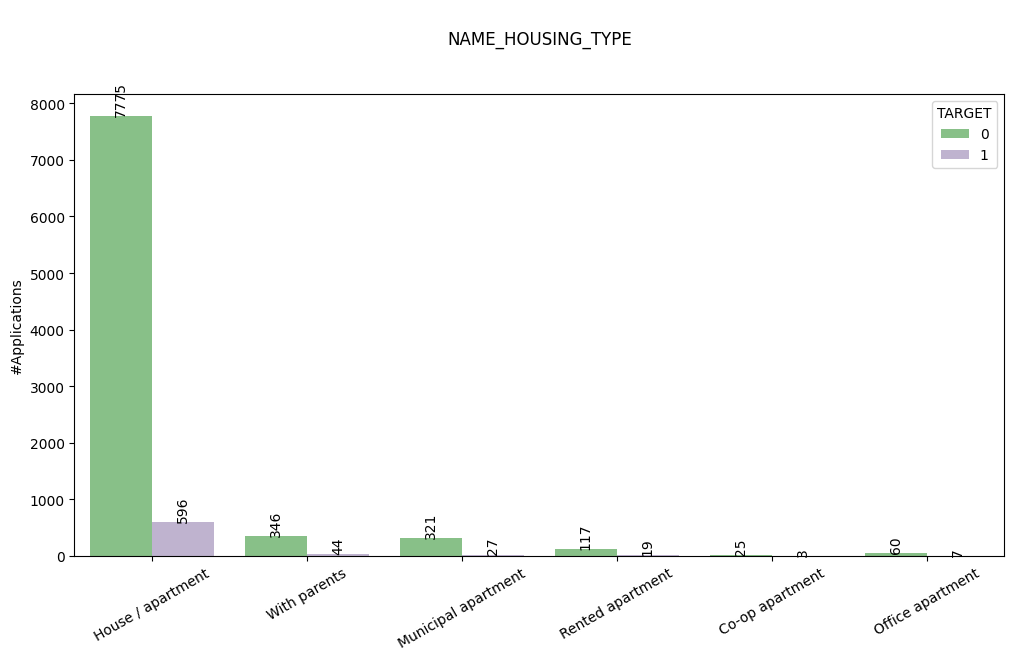

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
12)


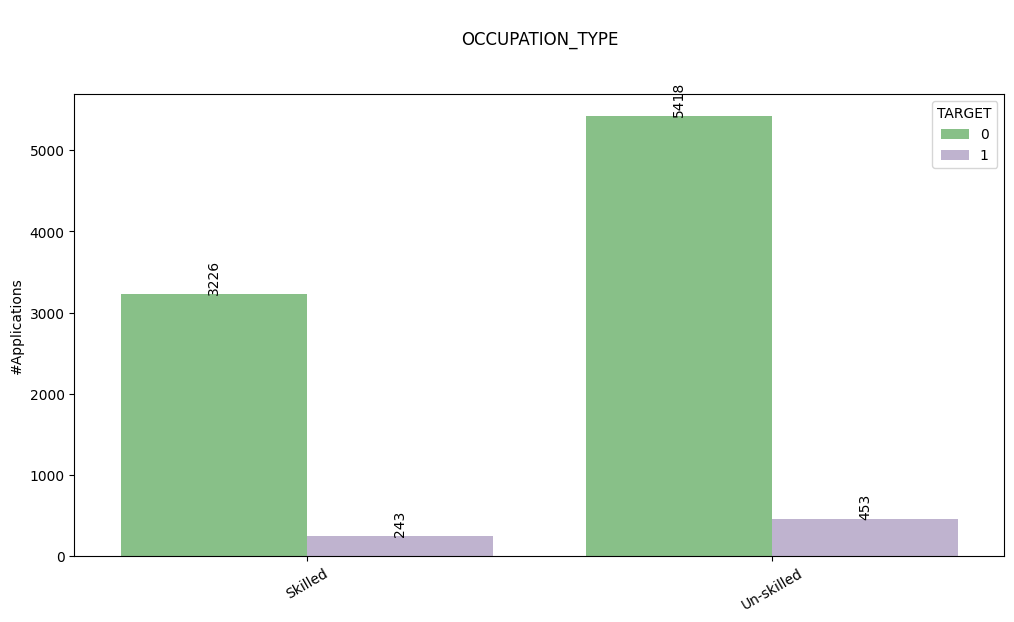

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
13)


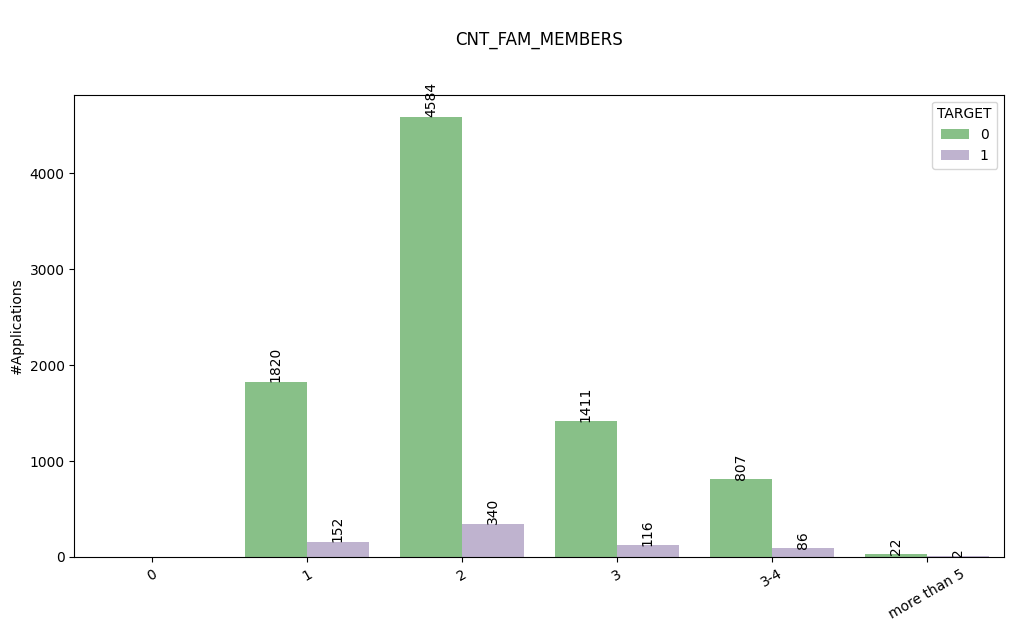

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
14)


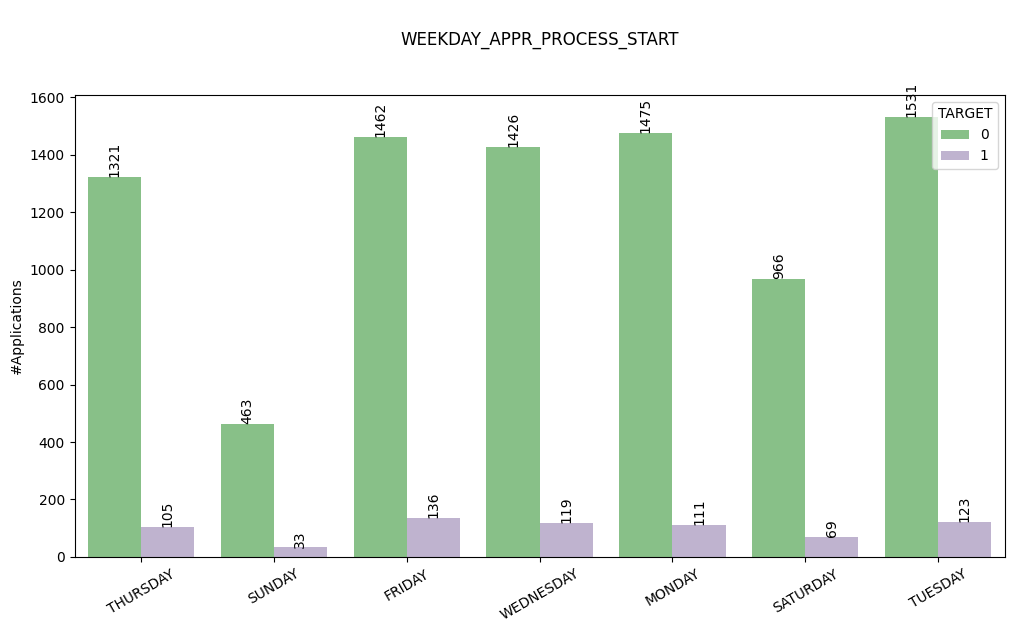

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
15)


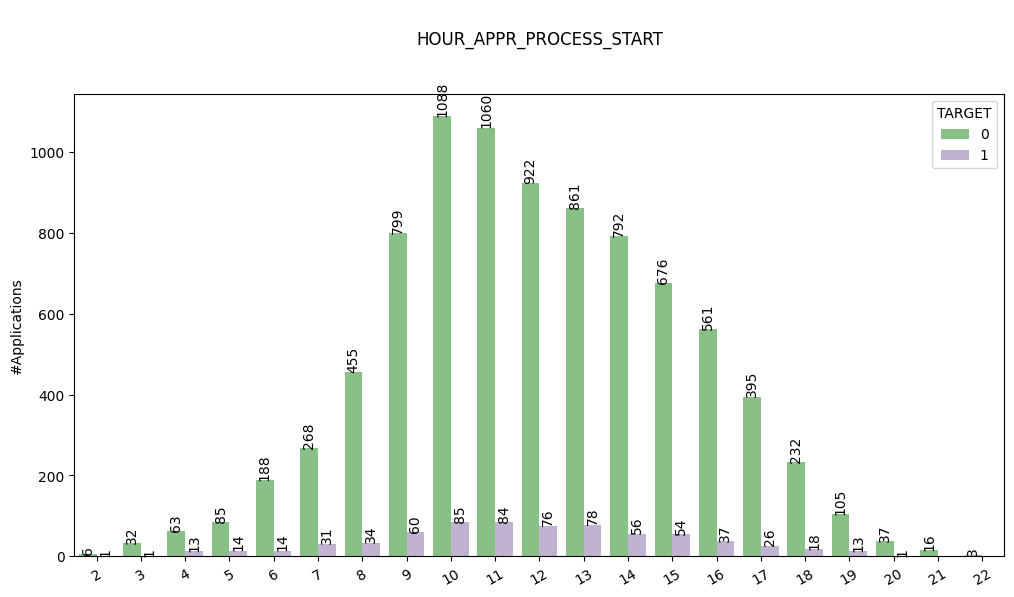

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
16)


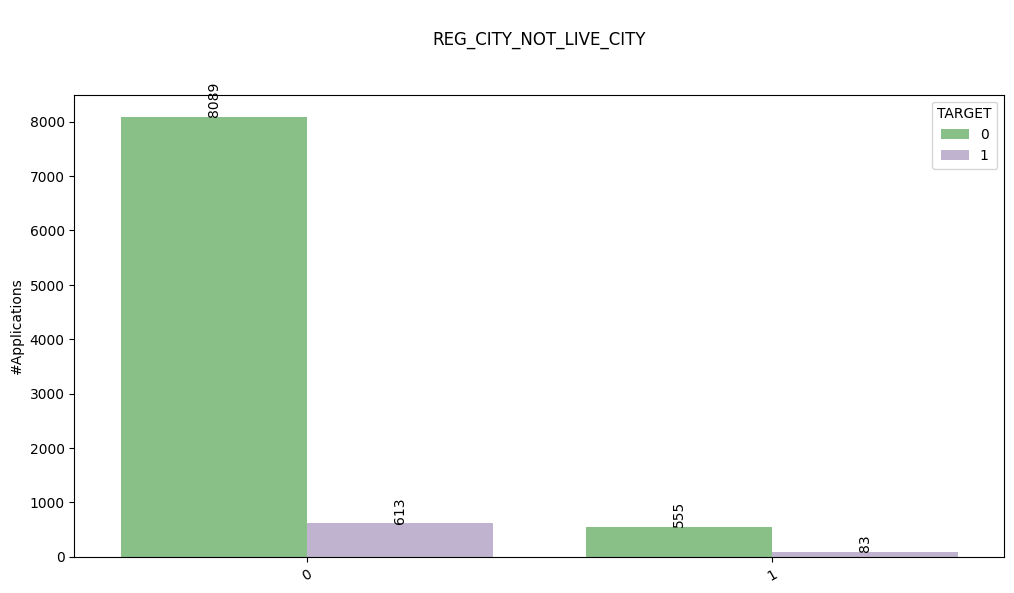

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
17)


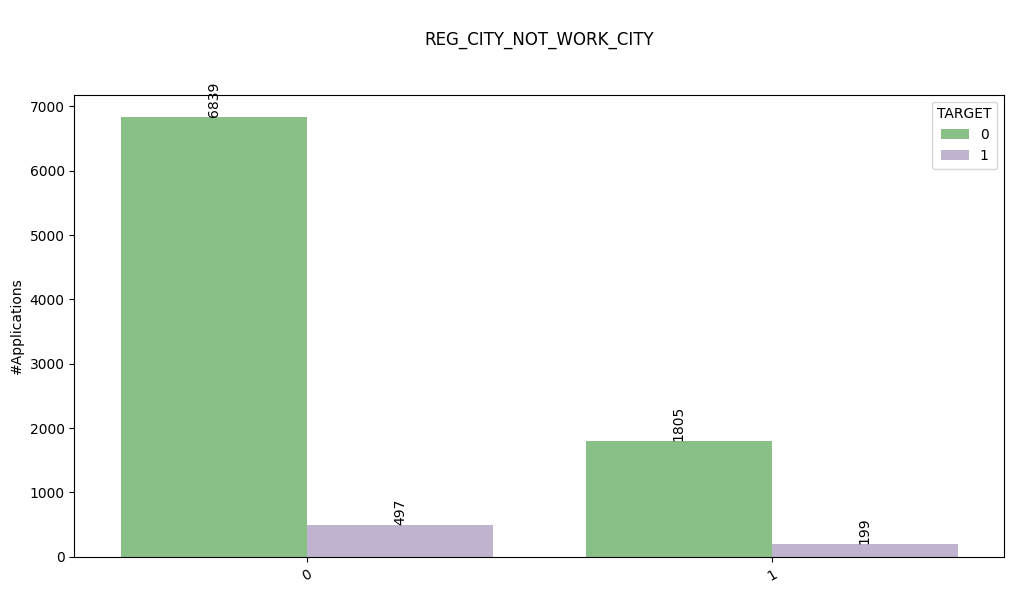

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
18)


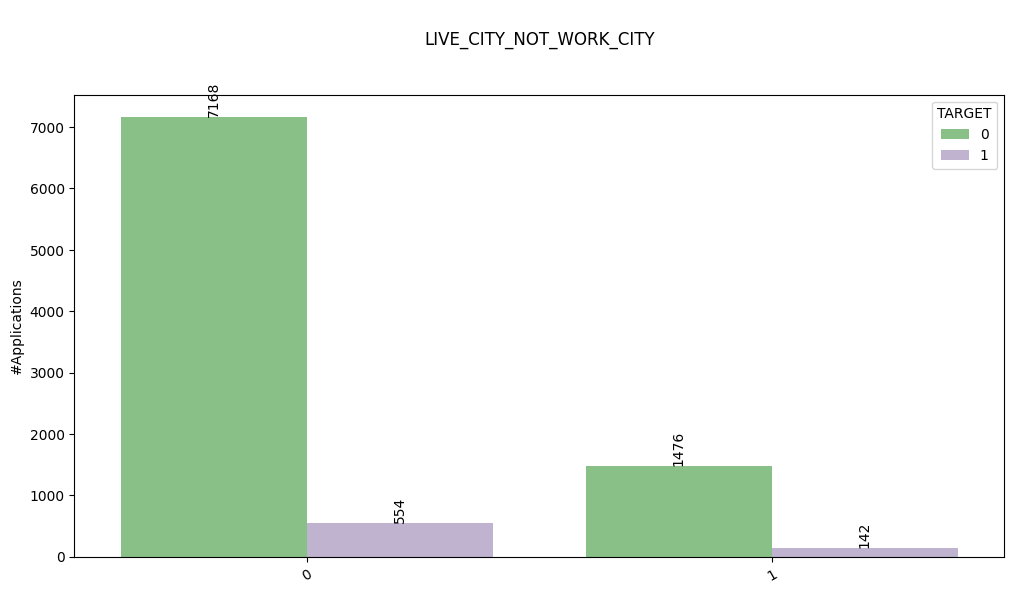

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
19)


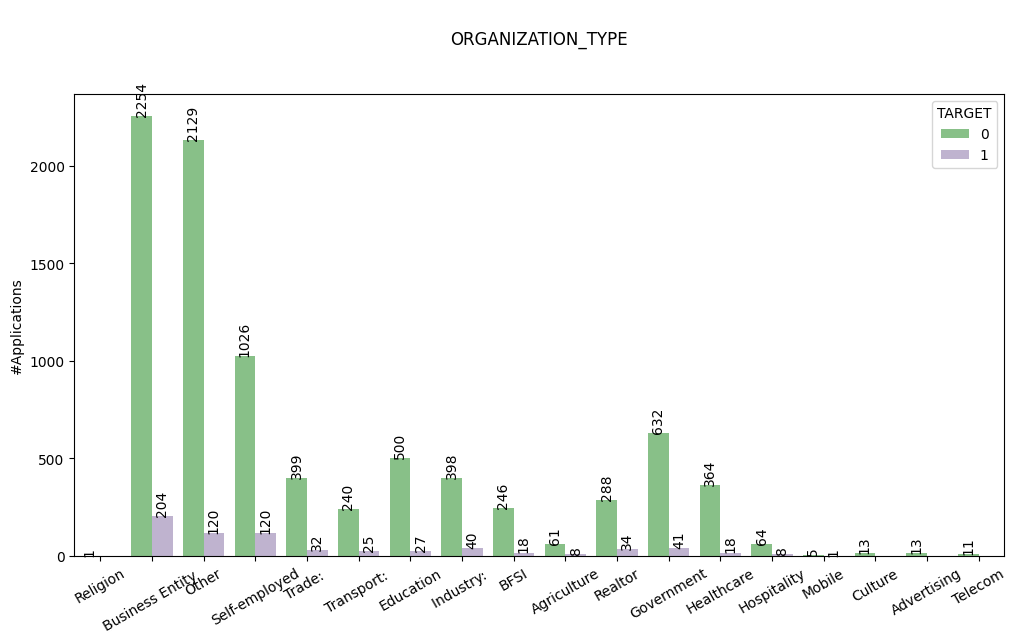

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
20)


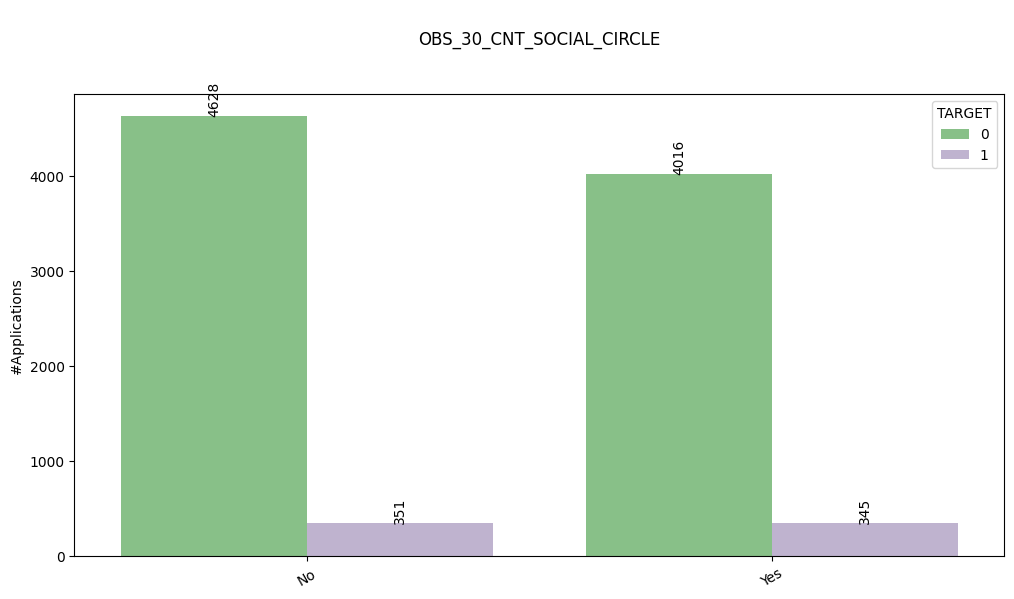

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
21)


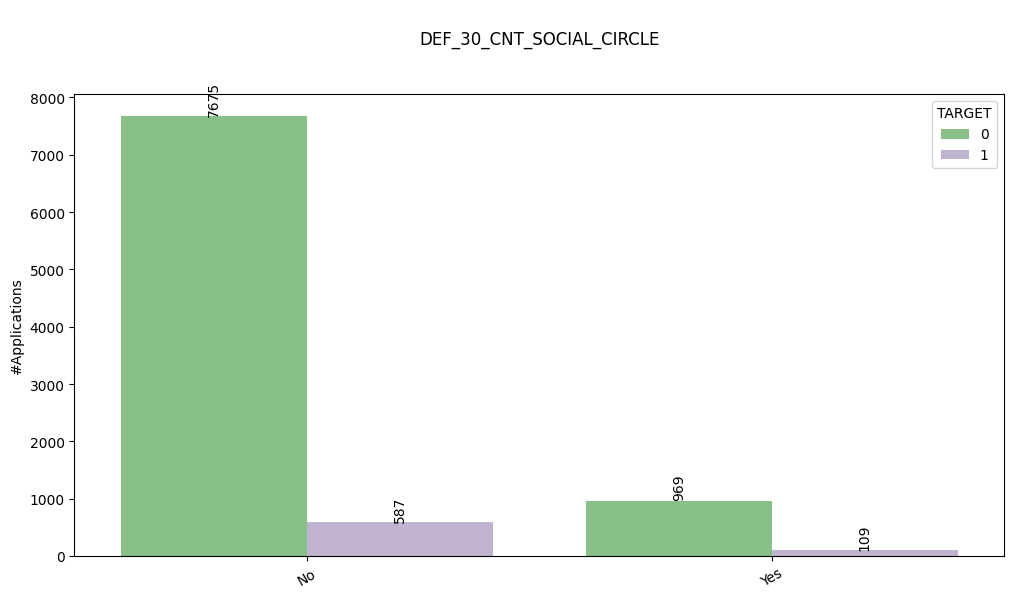

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
22)


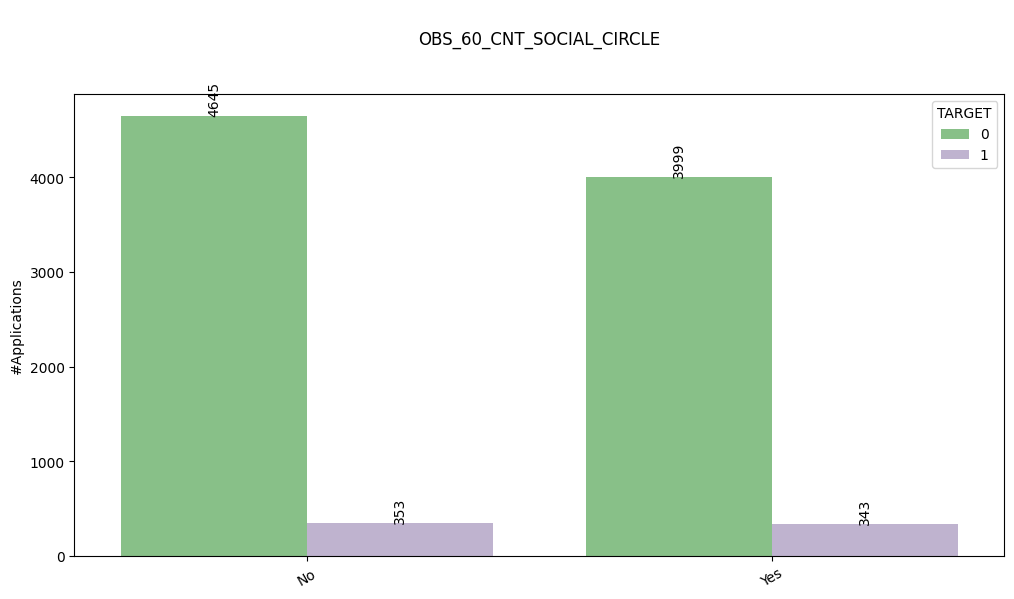

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
23)


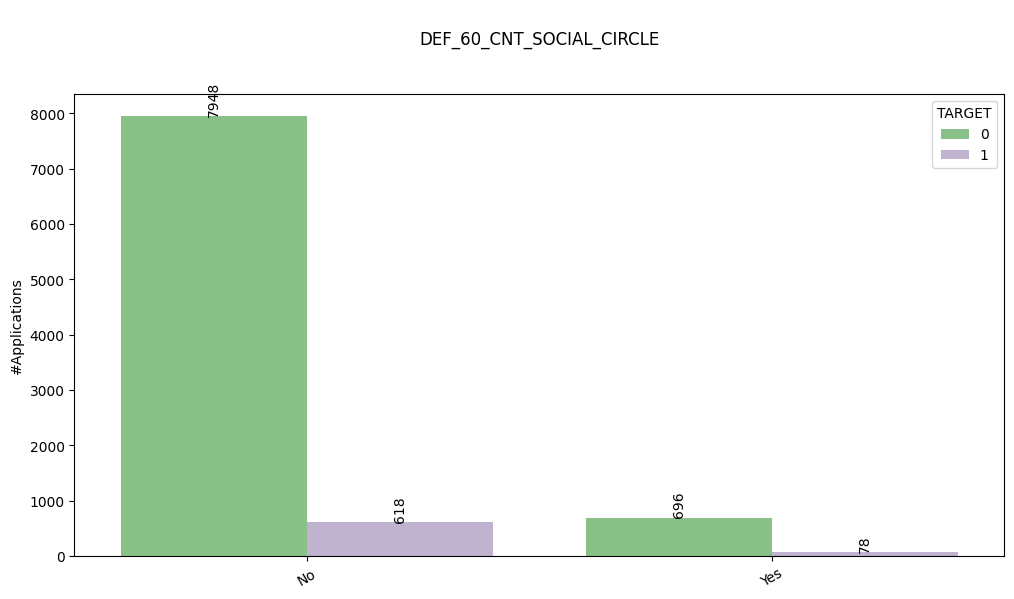

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
24)


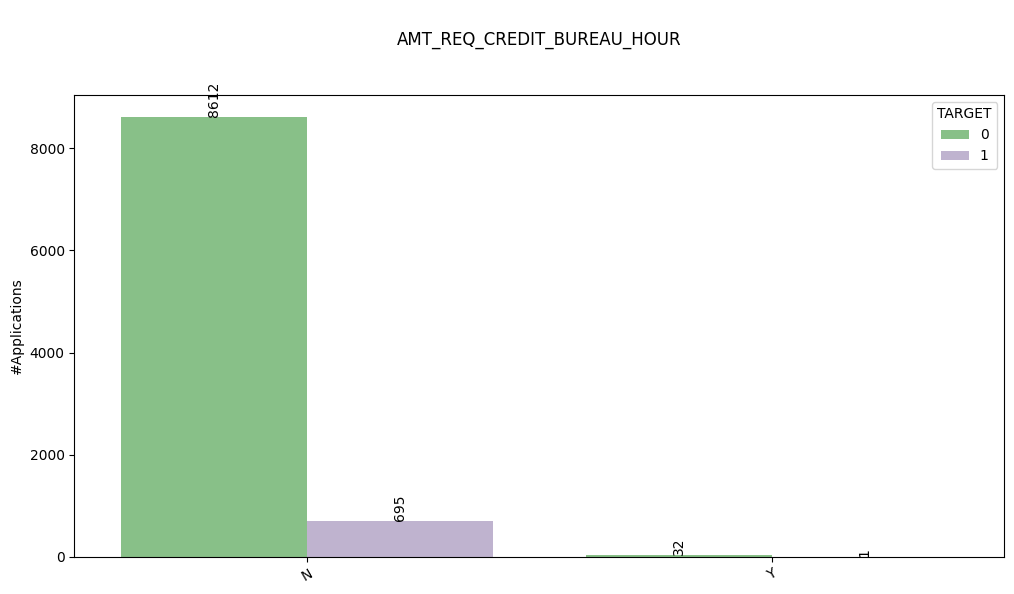

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
25)


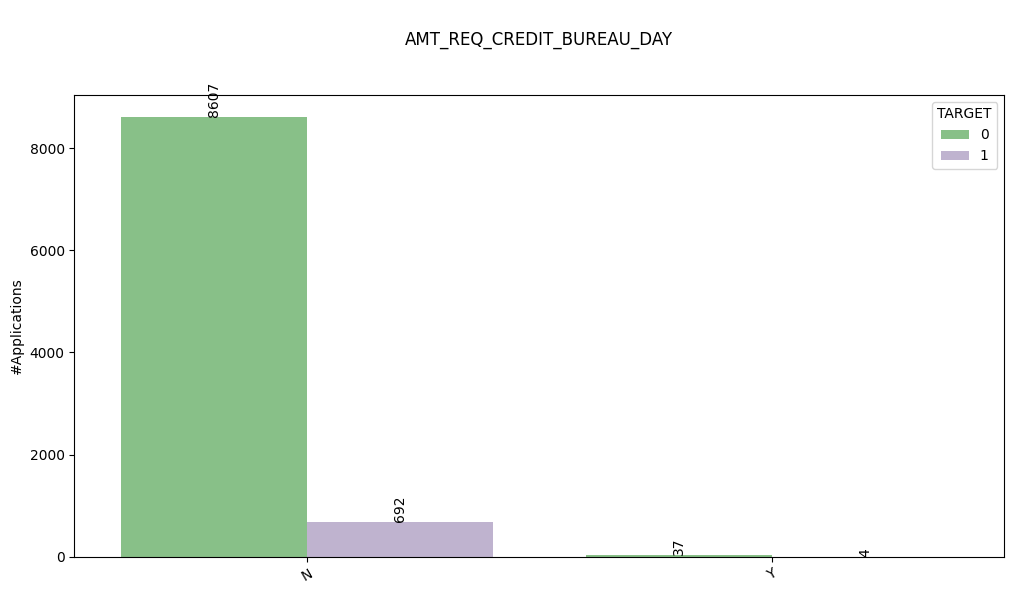

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
26)


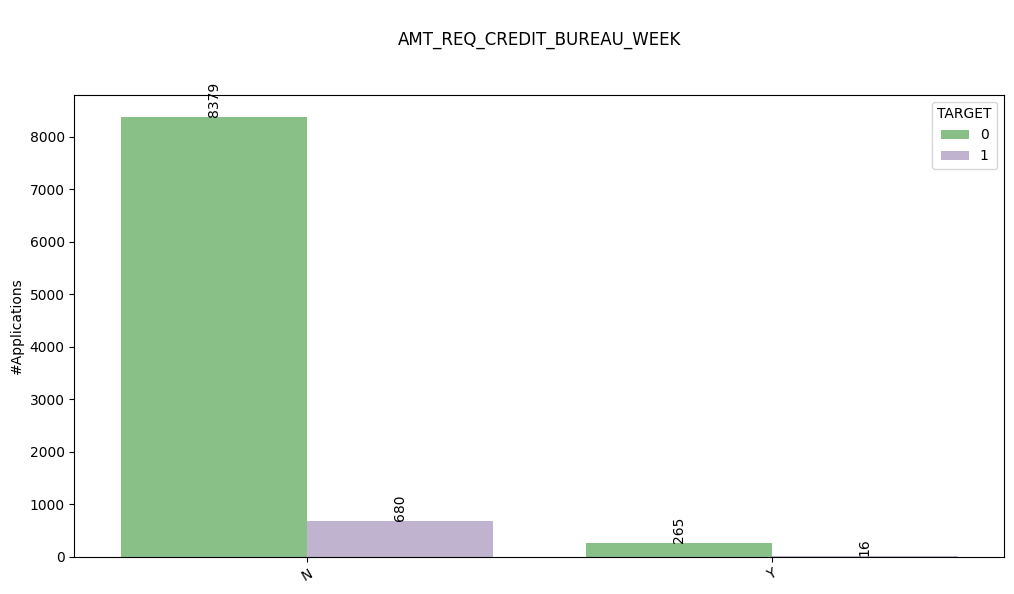

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
27)


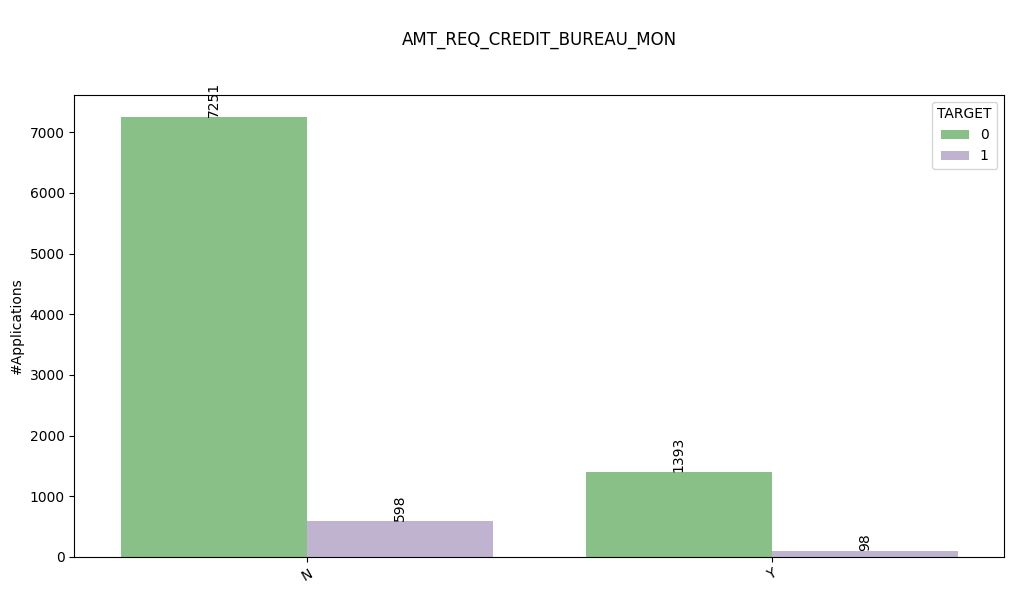

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
28)


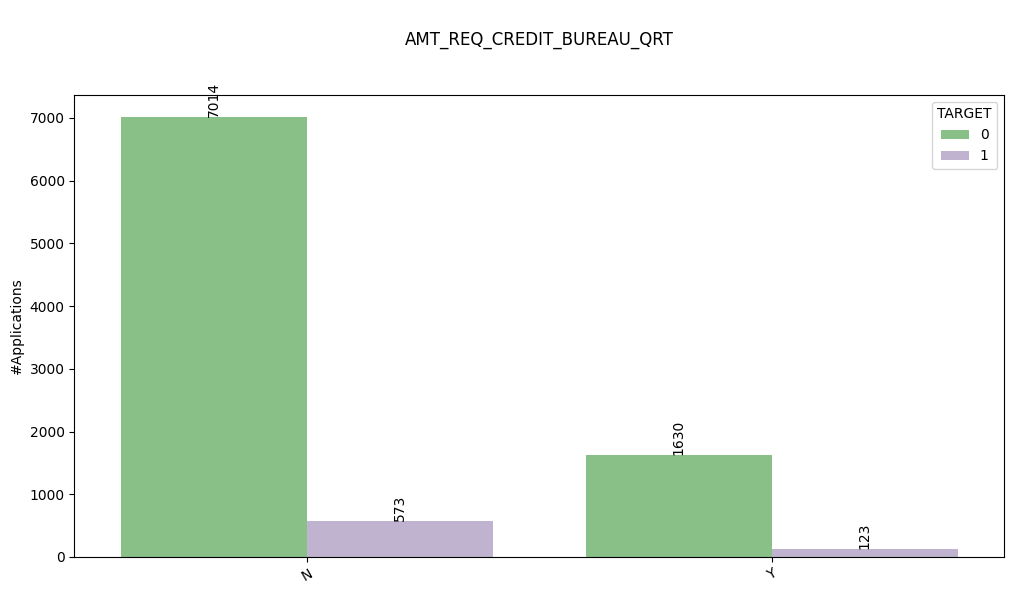

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
29)


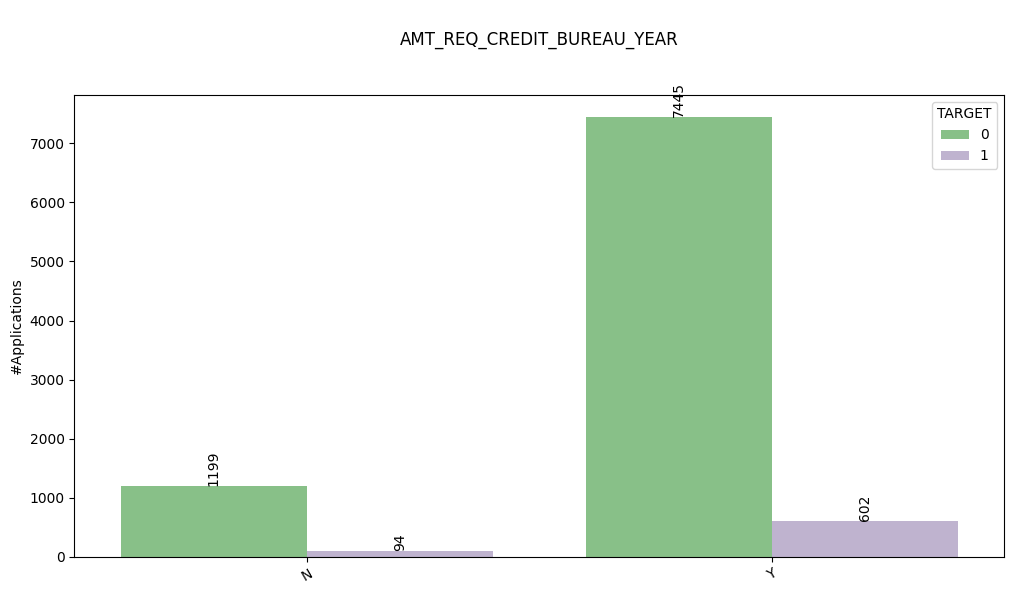

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
30)


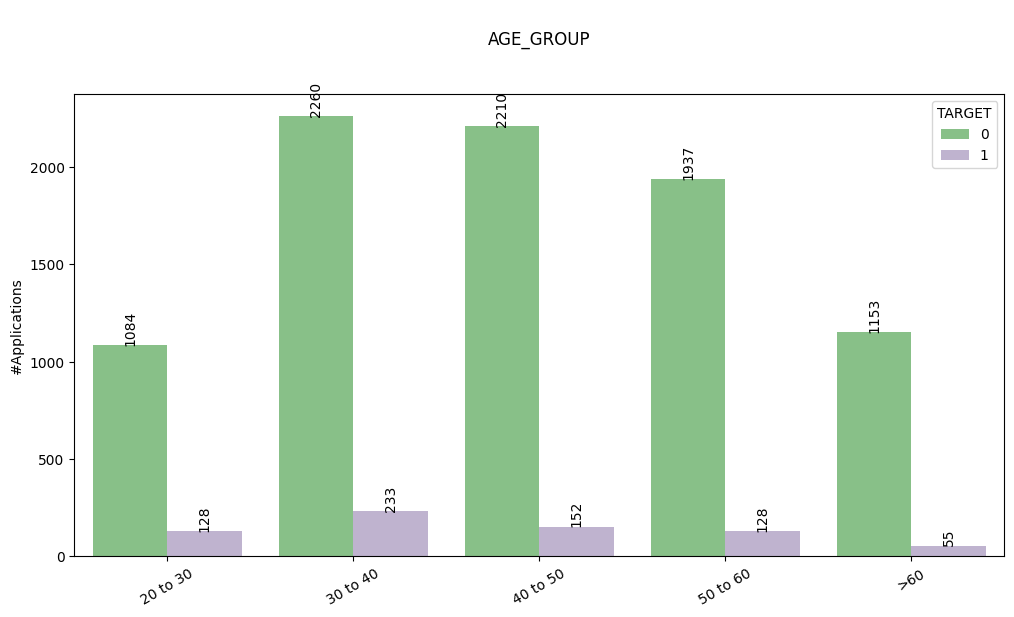

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
31)


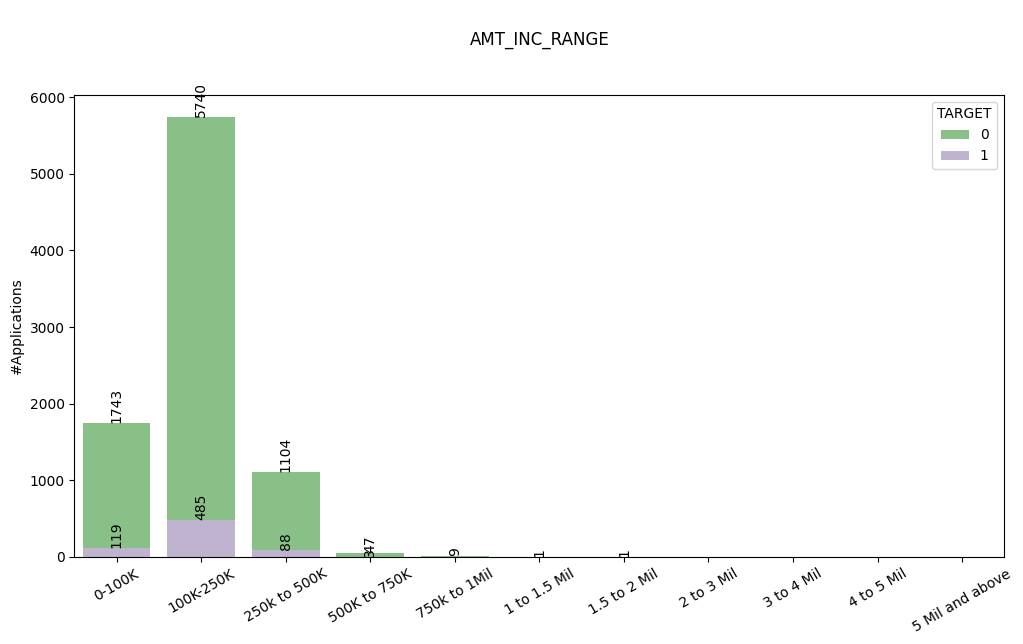

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
32)


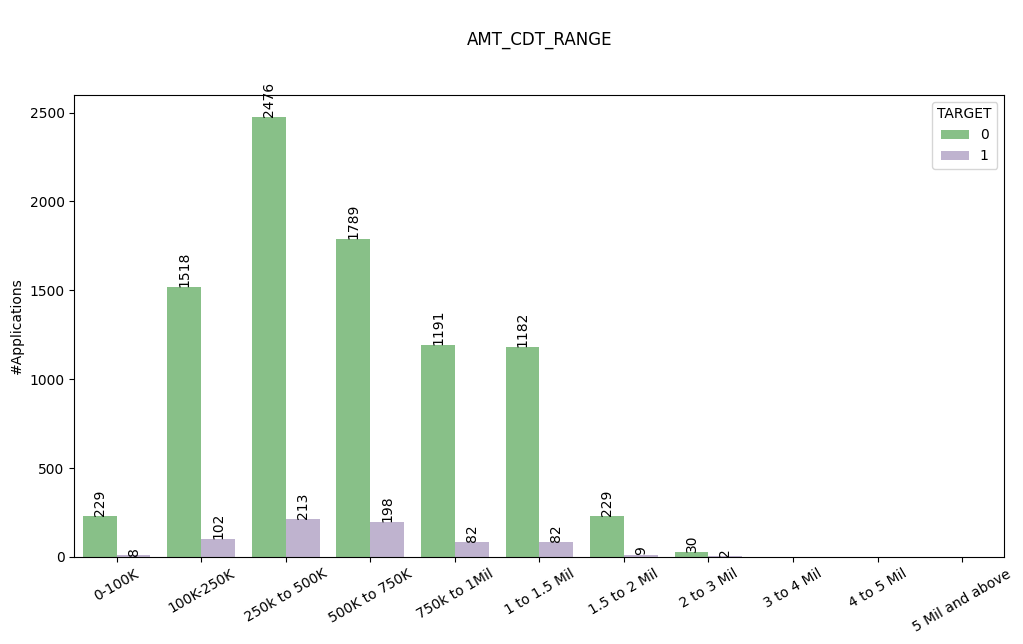

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
33)


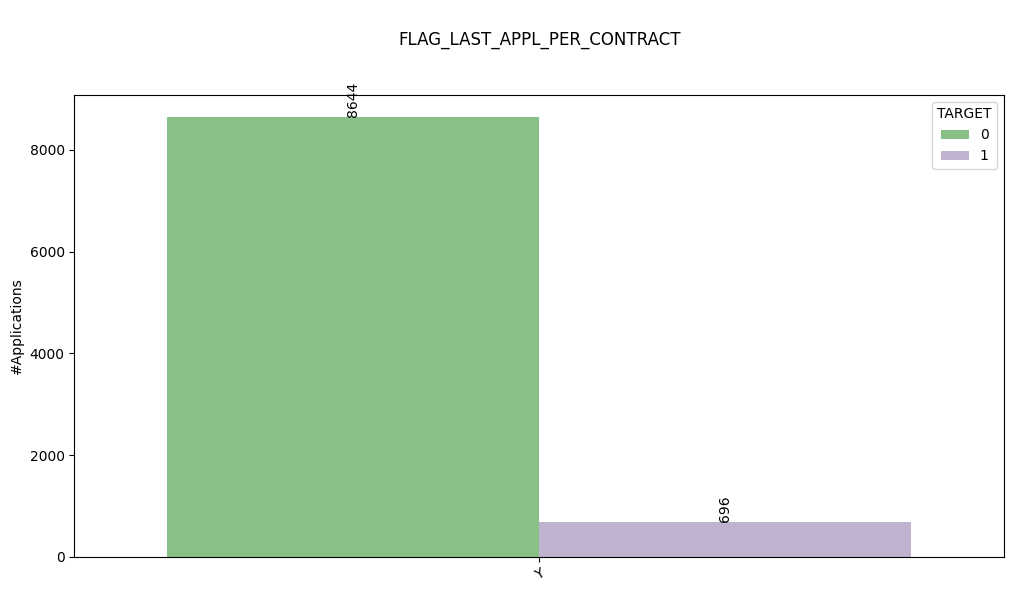

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
34)


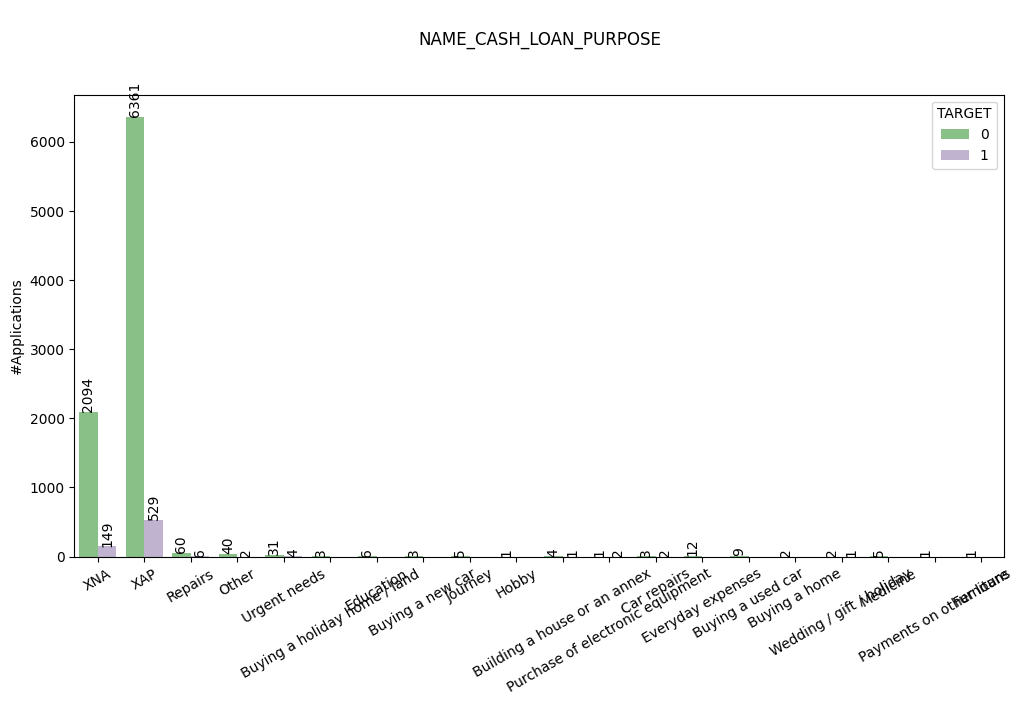

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
35)


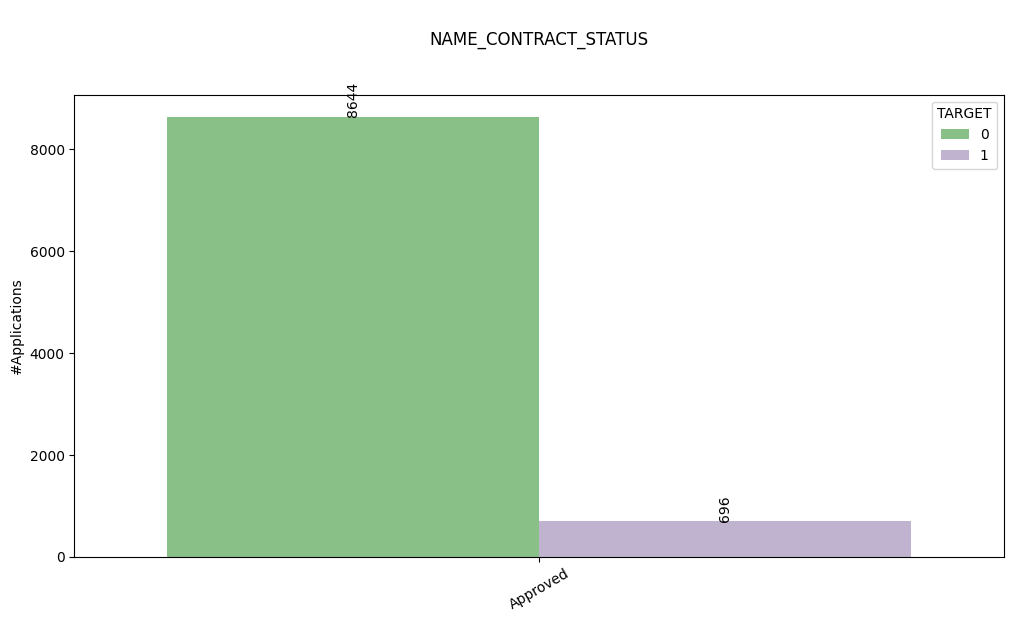

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
36)


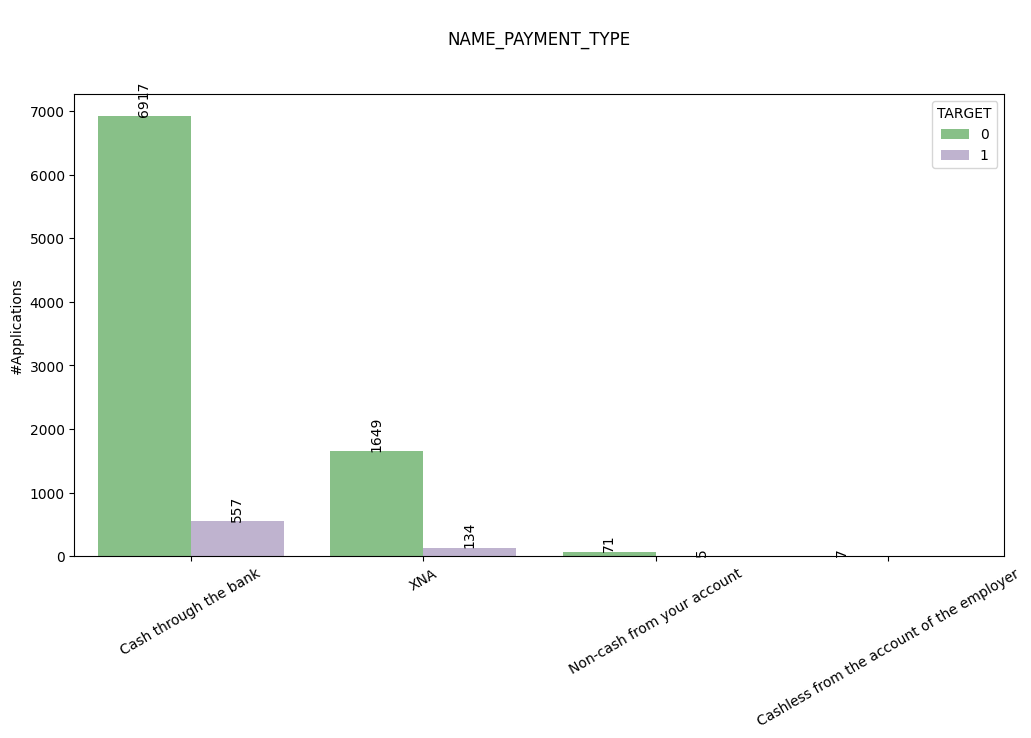

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
37)


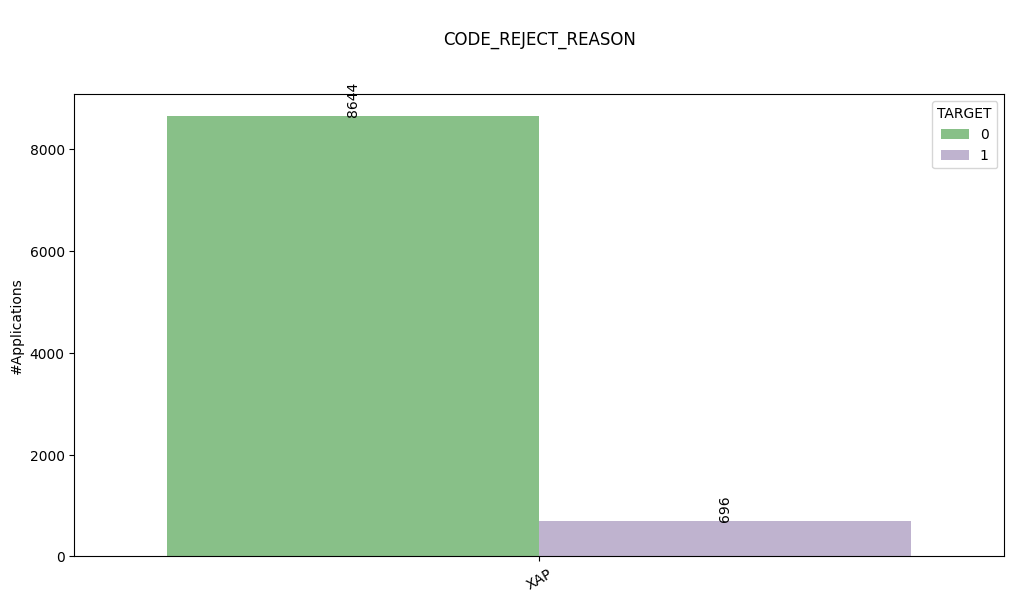

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
38)


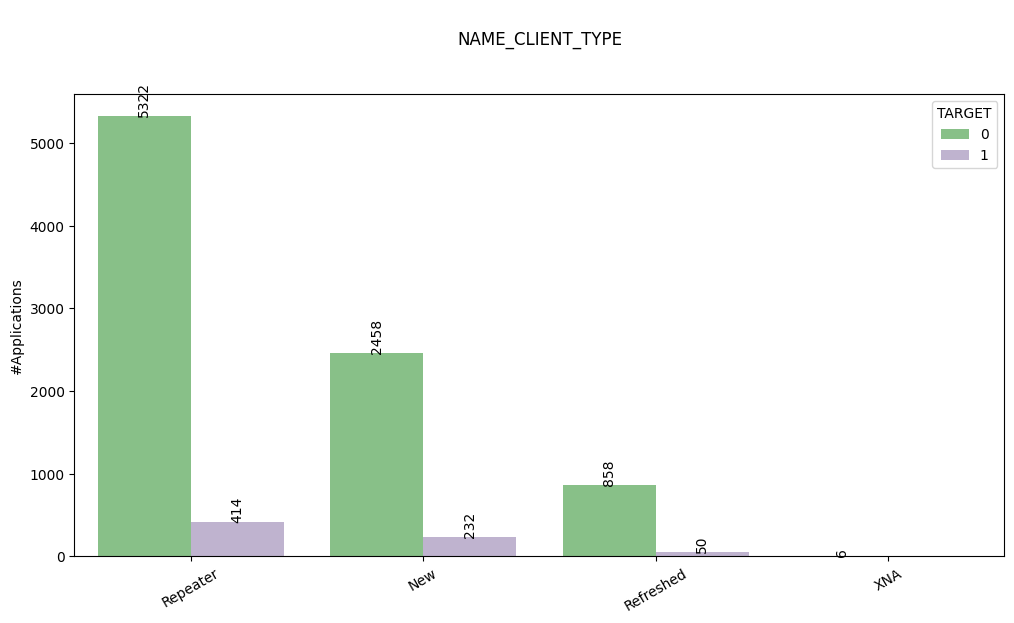

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
39)


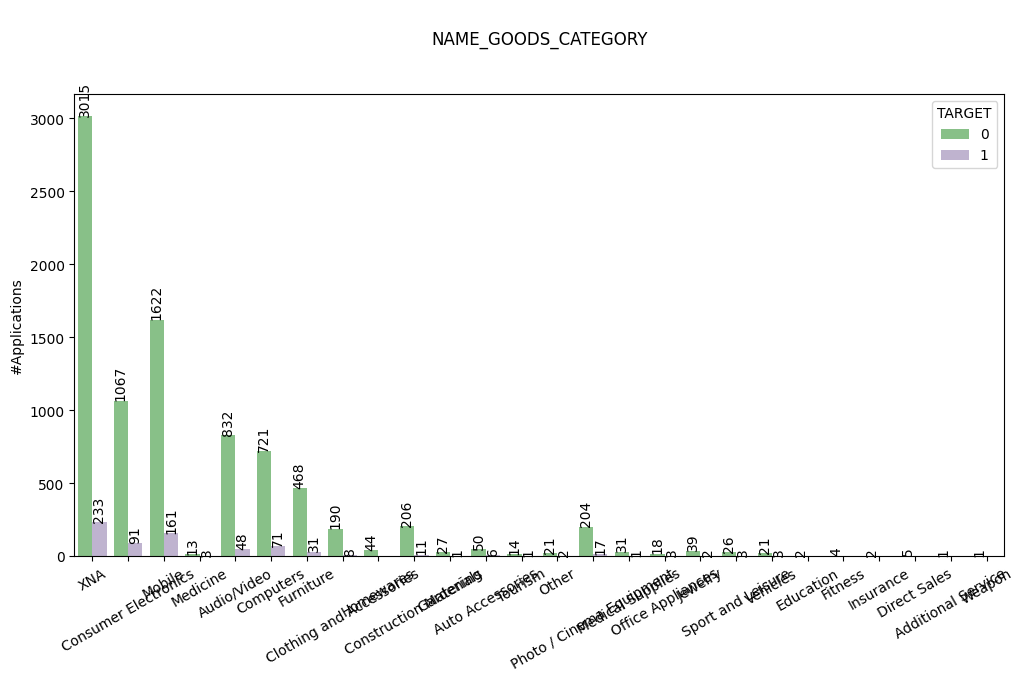

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
40)


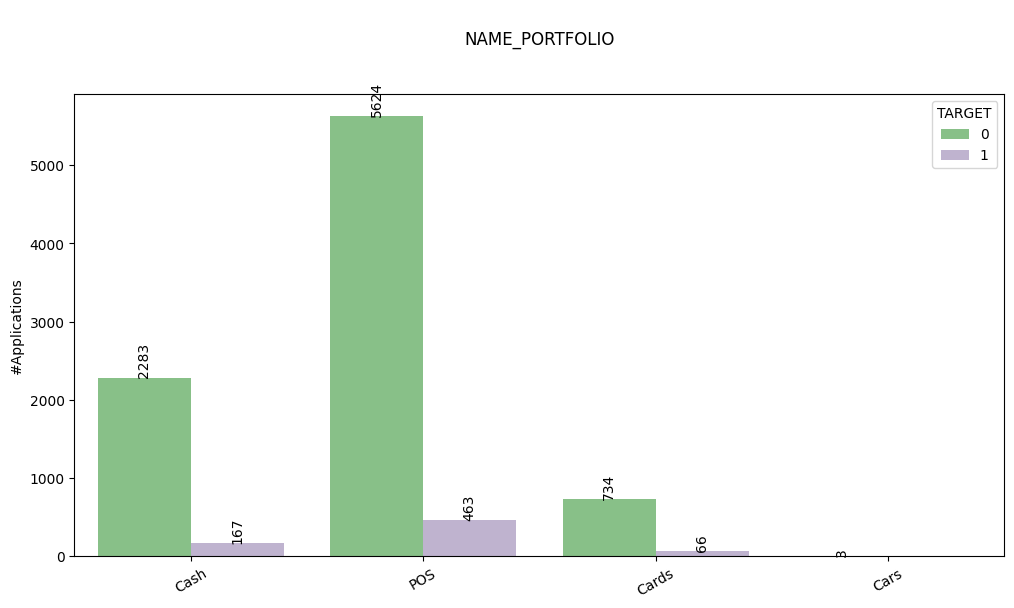

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
41)


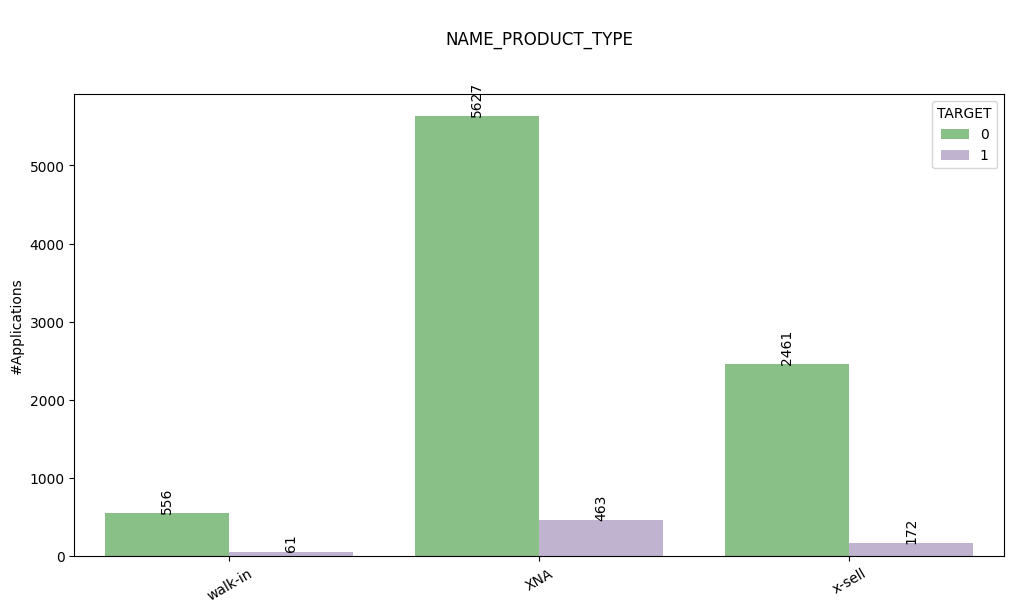

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
42)


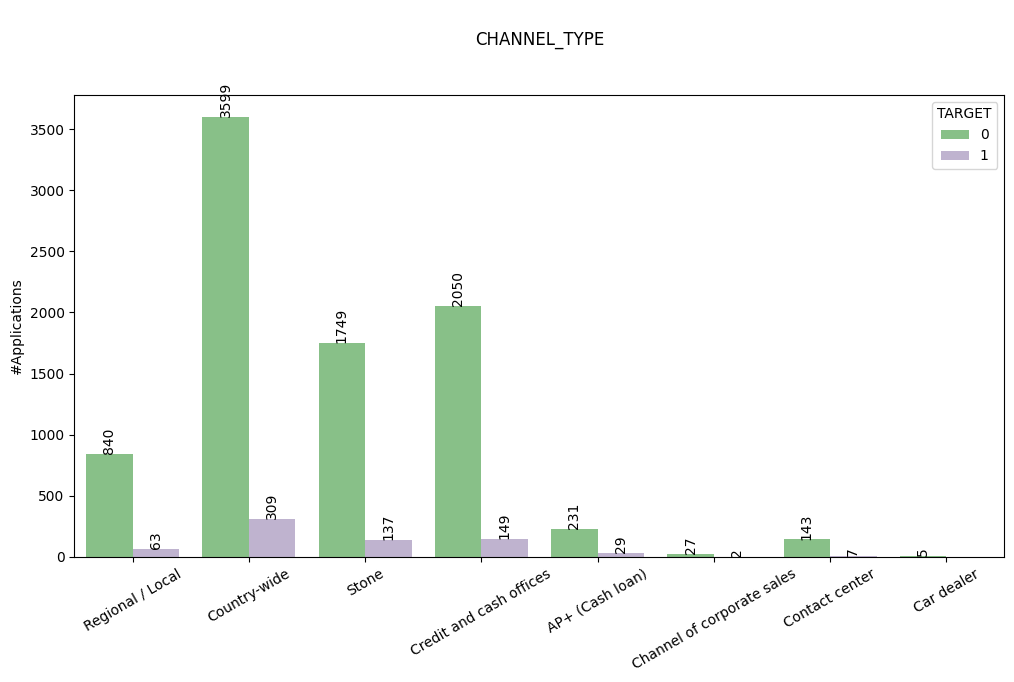

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
43)


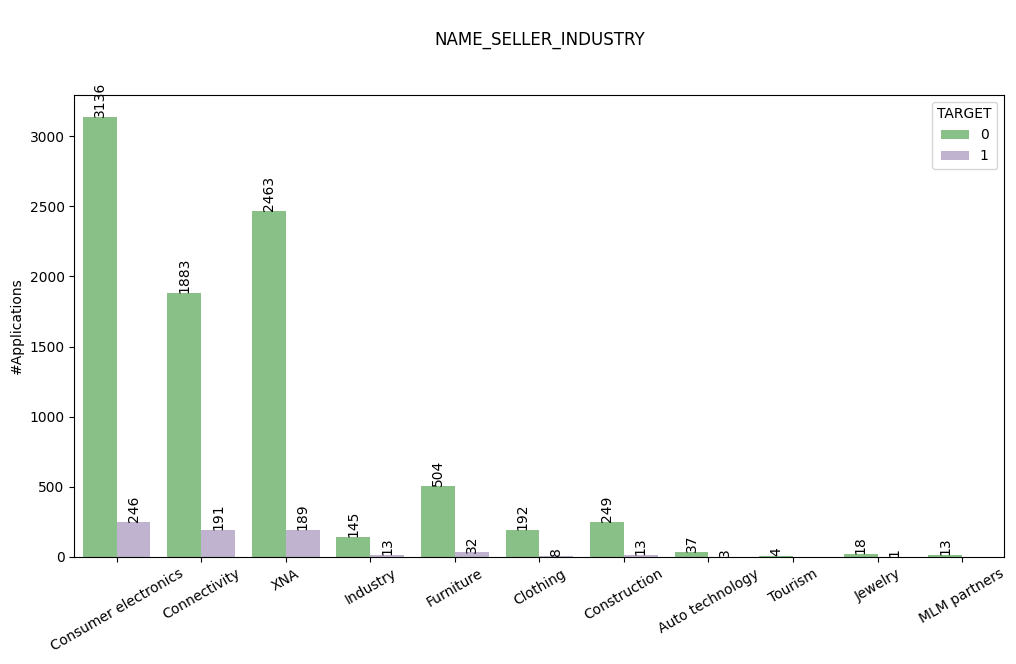

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
44)


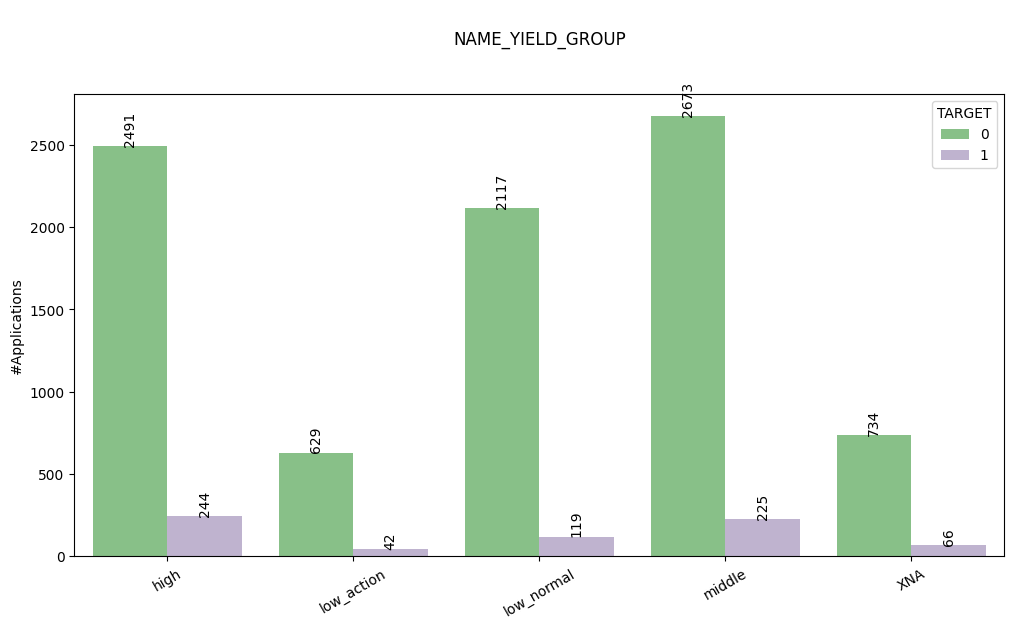

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
45)


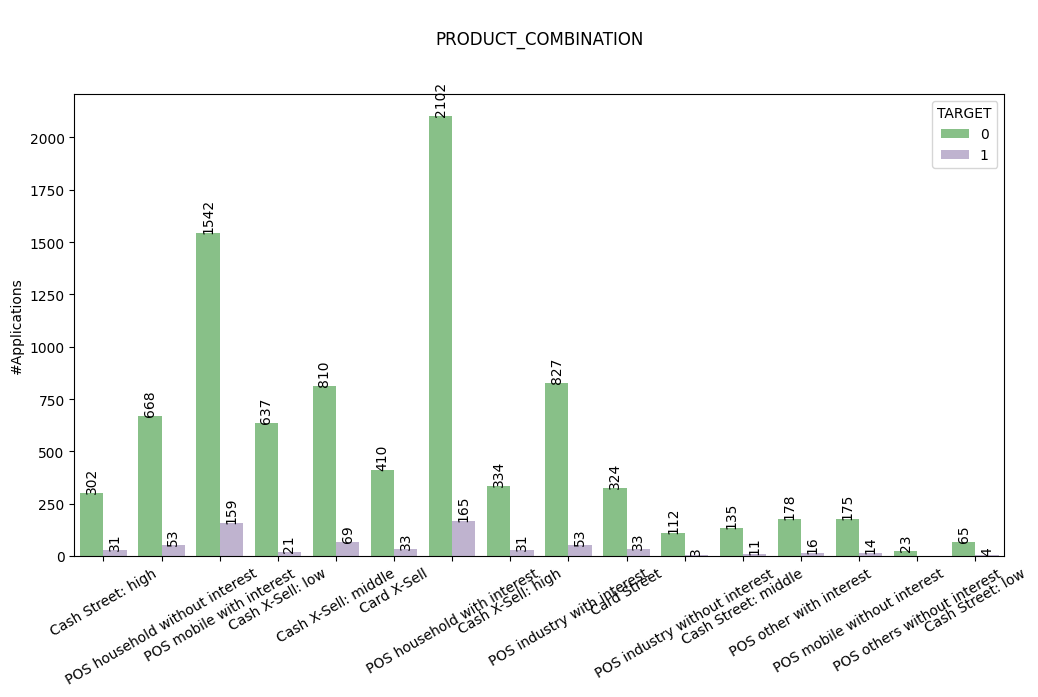

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [109]:
c=1
for i in New_Cat_col_types:
    print(str(c)+")")
    c+=1
    plt.figure(figsize=(12,6))
    ax=sns.countplot(data=new_merged_data,x=i,hue="TARGET",palette='Accent')
    for x in ax.containers:
        ax.bar_label(x,rotation=90)
    plt.xticks(rotation=30)
    plt.xlabel("\n\n")
    plt.ylabel("#Applications")
    plt.title("\n"+i+"\n\n")
    plt.show()
    print("X"*120)